In [9]:
from SALib import ProblemSpec
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn import model_selection, linear_model
import csv

import math


# Notes

https://salib.readthedocs.io/en/latest/user_guide/wrappers.html
* Wrapper
* Subprocess

In [10]:
# === Loan Default example ===
np.random.seed(298)

credit_training_features = []
credit_training_labels = [] # output?, loan default or not
attributes = []

# Get data
with open("south-german-credit-lab9.csv", "r", newline="") as file:
    data = csv.reader(file)
    attributes = next(data, None) # skip headers
    for row in data:
        features = [int(row[i]) for i in range(0,12)]
        features.append(int(row[12]) >= 35)
        [features.append(int(row[i])) for i in range(13, 20)]
        credit_training_features.append(features)
        credit_training_labels.append(int(row[20]))
"""
print("Credit training Features: ", credit_training_features)
print("features type: ", type(credit_training_features))
print("Credit training labels: ", credit_training_labels)
print("Attributes: ", attributes)
"""
# Get the model
x_train, x_test, y_train, y_test = model_selection.train_test_split(credit_training_features, credit_training_labels)
logistic_regression_model = linear_model.LogisticRegression(max_iter=5000).fit(x_train, y_train)
y_test_pred = logistic_regression_model.predict(x_test)
"""
print("credit training freatures: ", len(credit_training_features))
print("x_test rows: ", len(x_test))
print("y_test_pred: ", len(y_test_pred))
"""

# === SALib functions ===
def loan_model(X: np.ndarray, loan_data: list, model=logistic_regression_model):
    # https://waterprogramming.wordpress.com/2014/02/11/extensions-of-salib-for-more-complex-sensitivity-analyses/
    # X: (rows, cols) each val is [0, size of x_test (250)] so each val represents row in x_test, col represents col in x_test
    # x_test: (rows, cols)
    # print("input shape: ", X.shape)

    model_input = np.empty(shape=(X.shape[0], X.shape[1]))
    Y = np.ones(X.shape[0])
    
    # converting sample to south german credit values (x_test)
    for r_i in range(X.shape[0]):
        for c_i in range(X.shape[1]):
            new_row = math.floor(X[r_i][c_i])
            model_input[r_i][c_i] = int(loan_data[new_row][c_i])

    # evaluate model
    # model = logistic_regression_model
    # y_a = model.predict(matrix_a)
    # input: 2D array - [[21 attributes], [21 attributes], ...]
    Y = model.predict(model_input)
    return Y

# Sobol

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/scipy/stats/_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	756 samples
Outputs:
	1 outputs: ['Y']
	756 evaluations
Analysis:
                         ST       ST_conf
CheckingStatus     0.232258  7.258509e-01
LoanDuration       0.000000  0.000000e+00
CreditHistory      0.000000  0.000000e+00
Purpose            0.232258  5.599959e+29
CreditAmount       0.000000  0.000000e+00
SavingStatus       0.232258  5.599959e+29
EmploymentLength   0.000000  0.000000e+00
InstallmentRate    0.000000  0.000000e+00
PersonalStatusSex  0.232258  5.599959e+29
Guarantors         0.000000  0.000000e+00
ResidenceLength    0.000000  0.000000e+00
Property           0.000000  0.000000e+00
Age                0.000000  0.000000e+00
OtherInstall

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/scipy/stats/_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecat

Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	756 samples
Outputs:
	1 outputs: ['Y']
	756 evaluations
Analysis:
                        ST       ST_conf
CheckingStatus     0.84375  2.502977e+31
LoanDuration       0.28125  5.584278e-01
CreditHistory      0.84375  1.251489e+31
Purpose            0.00000  0.000000e+00
CreditAmount       0.00000  0.000000e+00
SavingStatus       0.56250  1.010763e+00
EmploymentLength   0.00000  0.000000e+00
InstallmentRate    0.56250  1.251489e+31
PersonalStatusSex  0.00000  0.000000e+00
Guarantors         0.00000  0.000000e+00
ResidenceLength    0.00000  0.000000e+00
Property           0.00000  0.000000e+00
Age                0.00000  0.000000e+00
OtherInstallment   0.28125

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


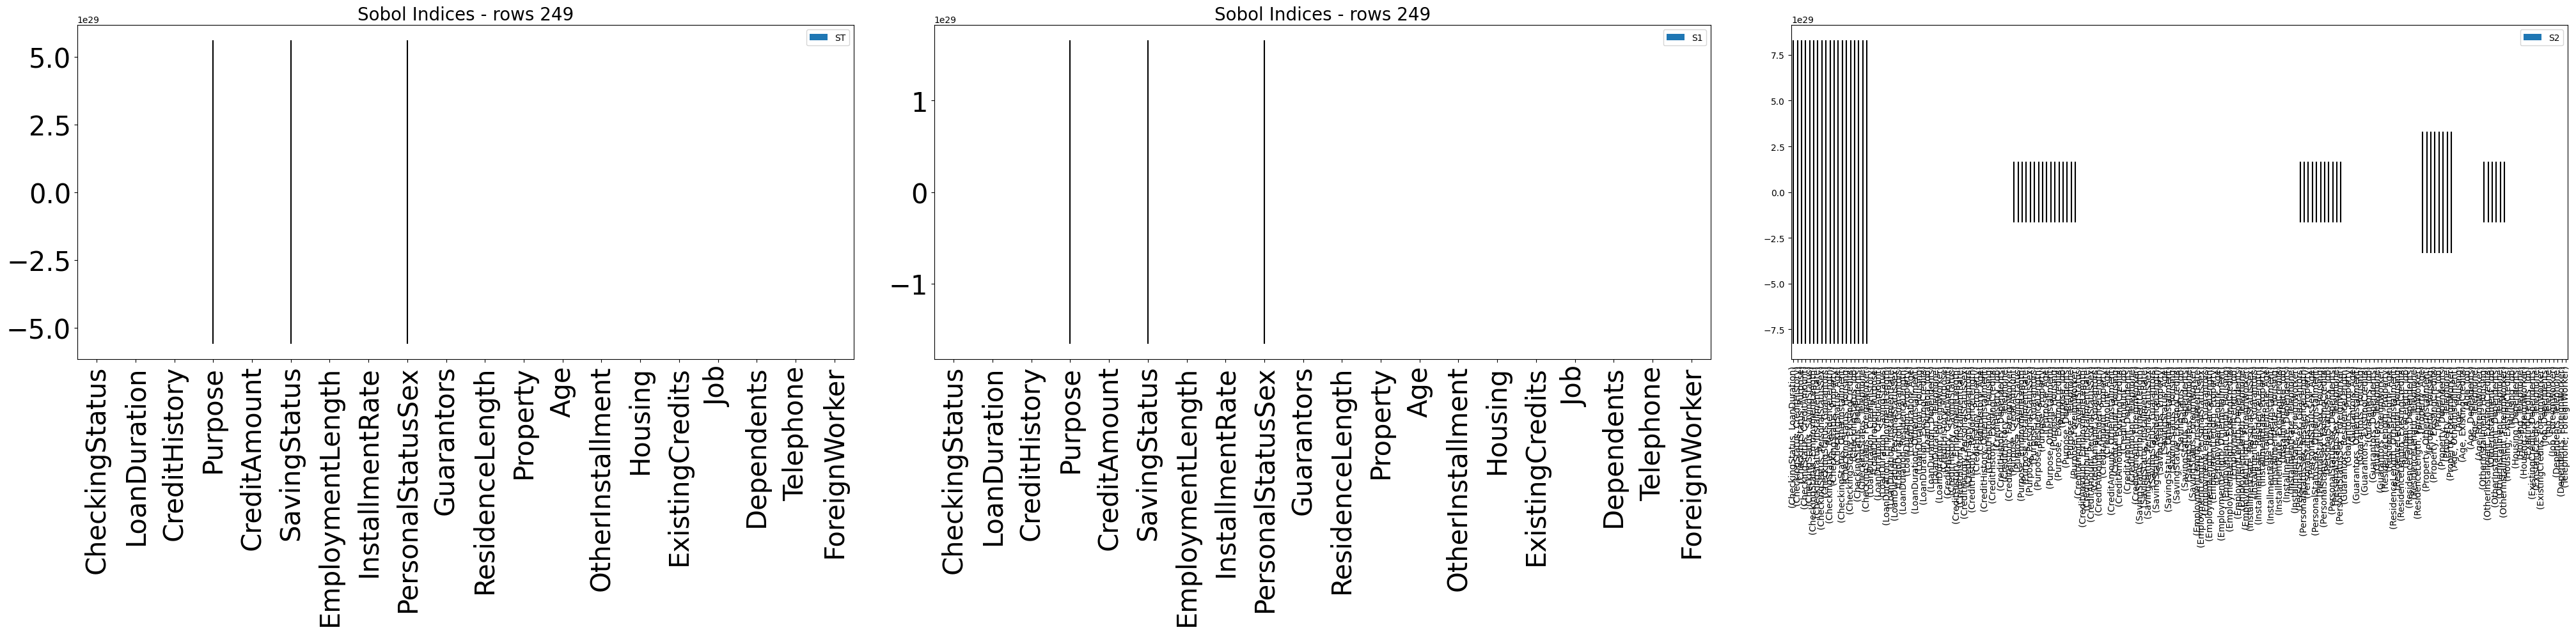

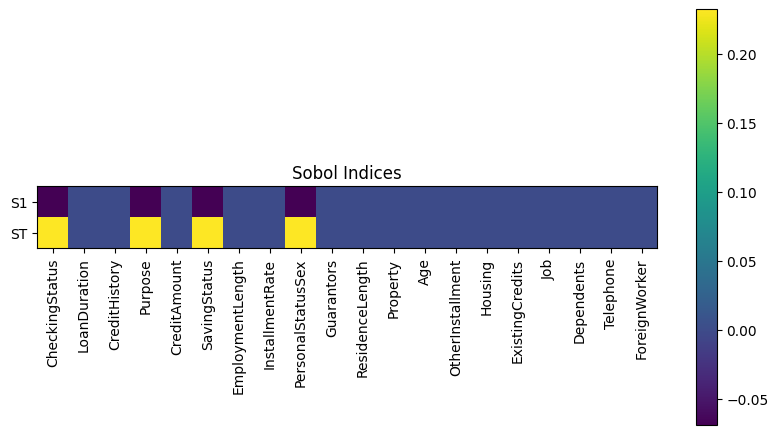

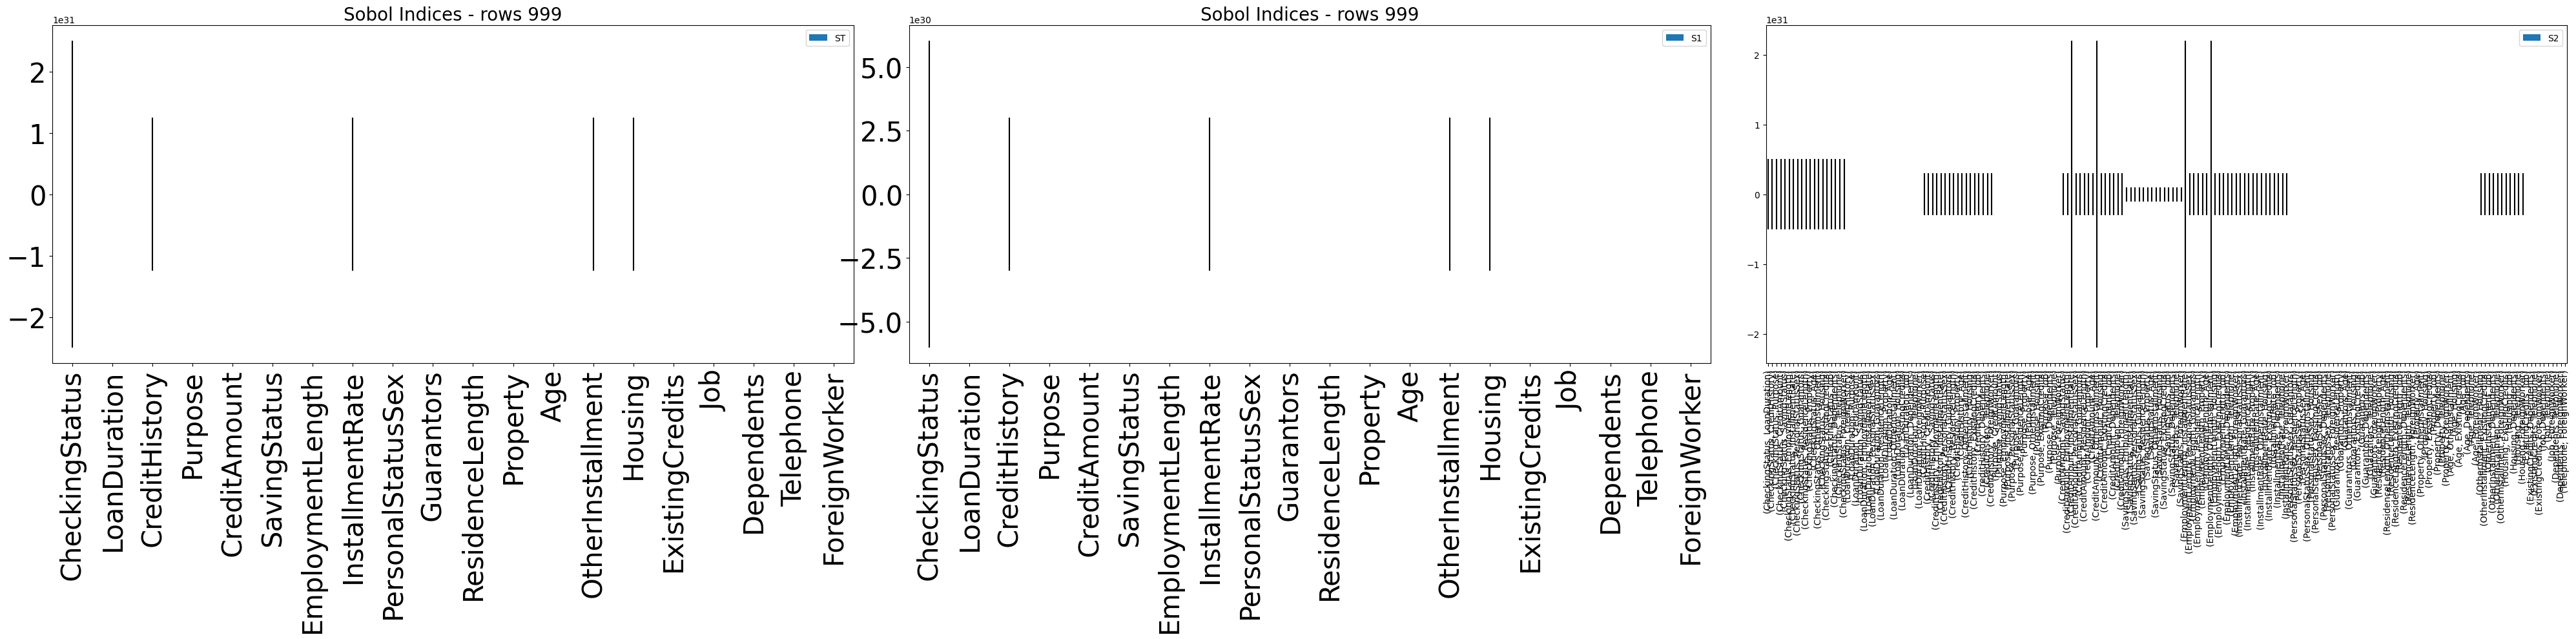

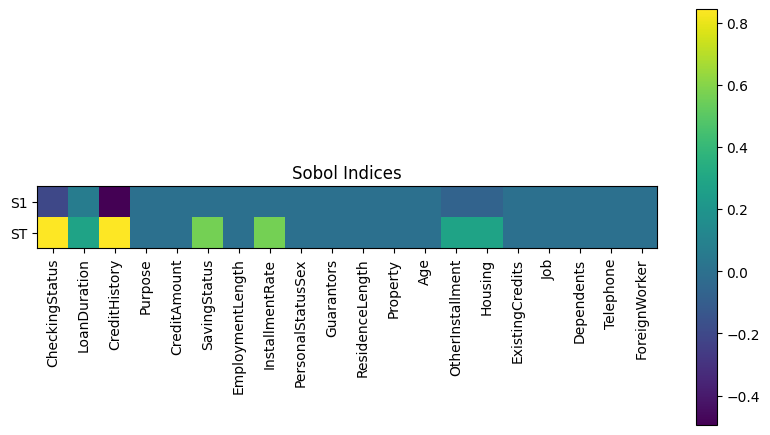

In [24]:
def loan_sobol(loan_data: list):
    loan_rows = len(loan_data) - 1
    sp = ProblemSpec({
        'names': attributes[0:20],
        'bounds': [[0, loan_rows]]*len(attributes[0:20]),
    })

    (sp.sample_sobol(18).evaluate(loan_model, loan_data).analyze_sobol())
    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    axes = axes[:-1]
    for axis in axes:
        axis.set_title(label=f"Sobol Indices - rows {loan_rows}", size=20)
        axis.tick_params(axis='y', labelsize=30)
        axis.tick_params(axis='x', labelsize=30)
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 10)
    plt.tight_layout() 

    sp.heatmap(title="Sobol Indices")

loan_sobol(x_test)
loan_sobol(credit_training_features)


In [28]:
# %%timeit
# loan_sobol(credit_training_features)

# PAWN

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


input shape:  (1024, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.006893  0.049940  0.039216  0.149969  0.736949
LoanDuration       0.000531  0.022855  0.027420  0.042126  0.680080
CreditHistory      0.006893  0.039252  0.032450  0.081342  0.663894
Purpose            0.009178  0.042852  0.044118  0.075521  0.563768
CreditAmount       0.000531  0.048553  0.044118  0.136453  0.813989
SavingStatus       0.000531  0.038027  0.030459  0.095129  0.761176
EmploymentLength   0.006893  0.039205  0.034314  0.087910  0.579287
InstallmentRate    0.006893  

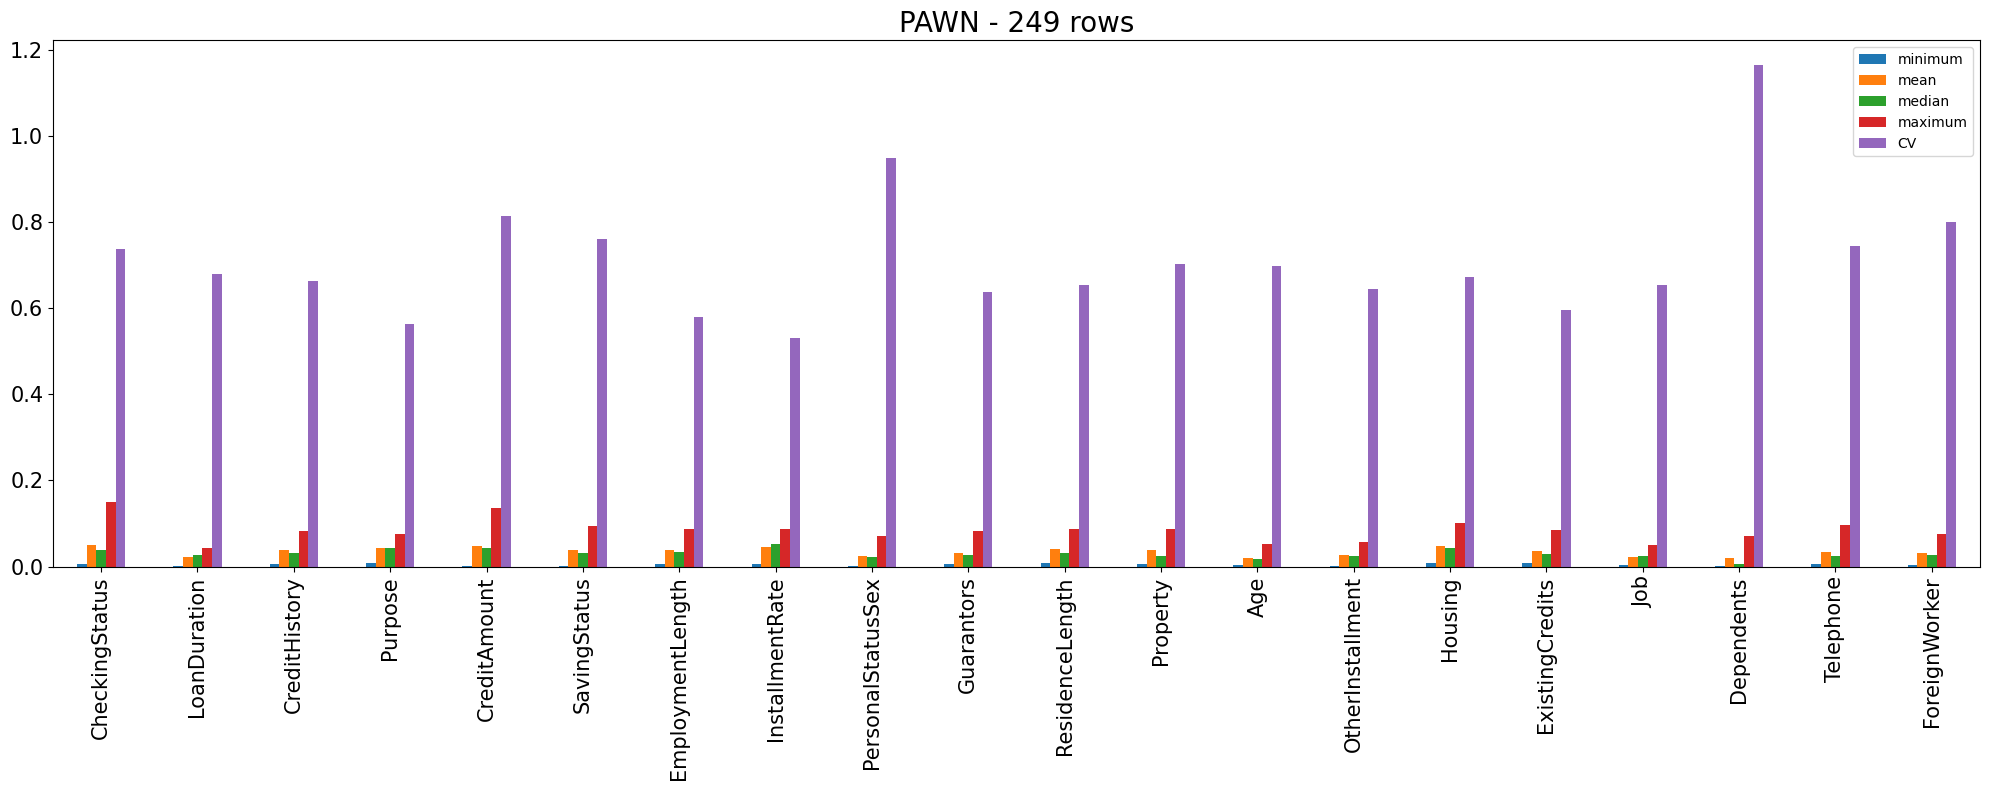

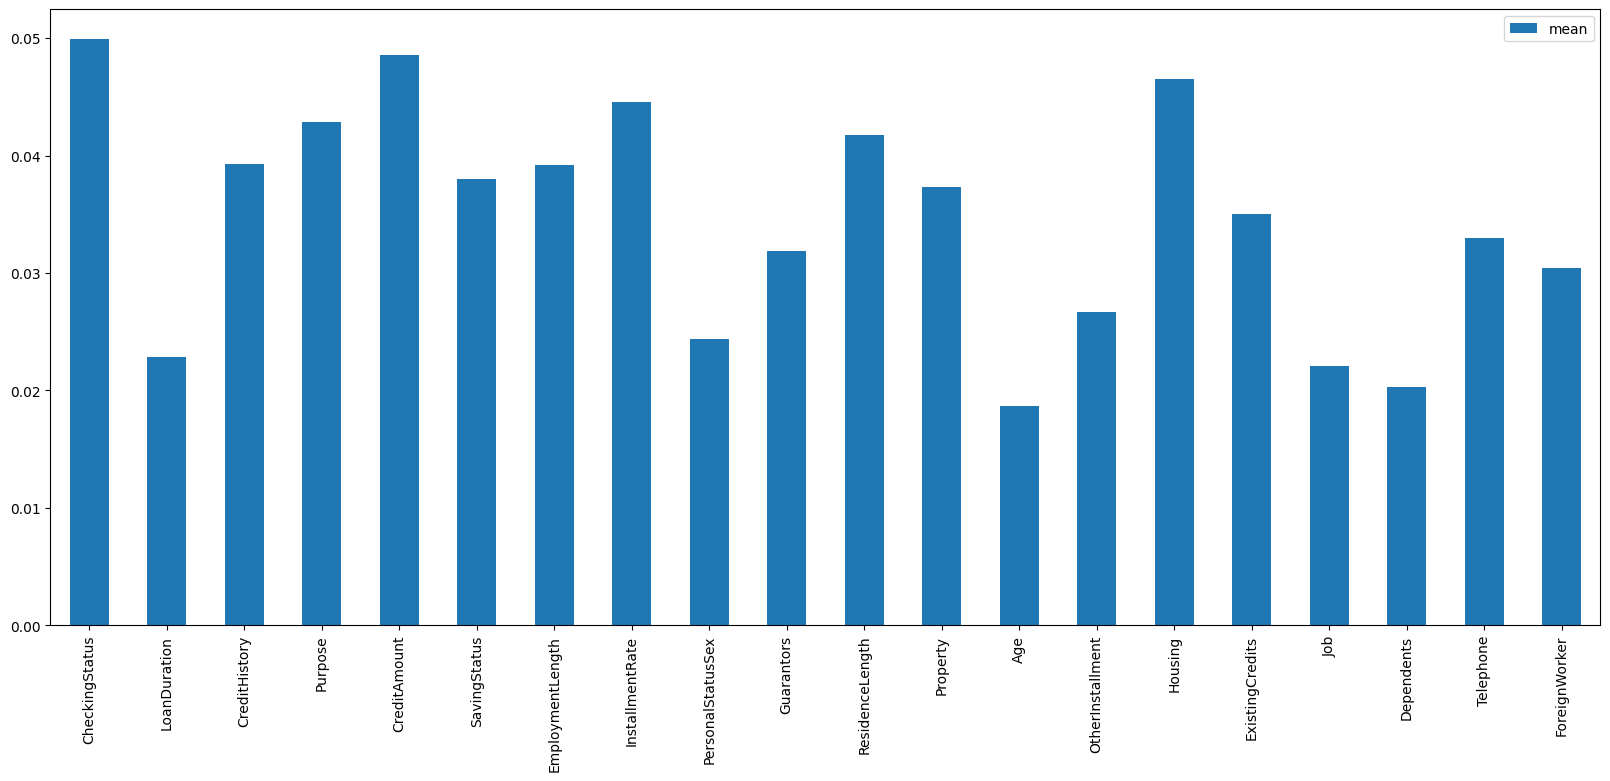

In [38]:
# === SALib PAWN Attempt ===
def loan_pawn(loan_data: list):
    loan_rows = len(loan_data) - 1
    sp = ProblemSpec({
        'names': attributes[0:20],
        'bounds': [[0, loan_rows]]*len(attributes[0:20]),
    })

    (sp.sample_latin(1024).evaluate(loan_model, loan_data).analyze_pawn())
    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    plt.title(label=f"PAWN - {loan_rows} rows", size=20)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    fig = plt.gcf() # get current figure
    fig.set_size_inches(20, 8)
    plt.tight_layout() 

    # sp.heatmap(title="PAWN")

    # only plot mean
    df = sp.to_df()
    df.plot.bar(y="mean", figsize=(20, 8))

loan_pawn(x_test)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


input shape:  (1024, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.000172  0.049130  0.043689  0.097867  0.509258
LoanDuration       0.000172  0.037327  0.035343  0.075499  0.711979
CreditHistory      0.009632  0.032435  0.024682  0.094916  0.797497
Purpose            0.000172  0.021356  0.015658  0.049192  0.932707
CreditAmount       0.002171  0.038007  0.024510  0.107671  0.899208
SavingStatus       0.000172  0.022294  0.019608  0.056081  0.872872
EmploymentLength   0.007538  0.026223  0.019780  0.068455  0.679094
InstallmentRate    0.002171  

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


input shape:  (1024, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.001149  0.022561  0.012856  0.077282  1.021588
LoanDuration       0.001149  0.017601  0.009804  0.040365  0.905057
CreditHistory      0.003148  0.031688  0.026563  0.093940  0.819999
Purpose            0.020757  0.041492  0.038067  0.087086  0.439409
CreditAmount       0.001149  0.031937  0.026563  0.096890  0.783161
SavingStatus       0.001149  0.037016  0.038067  0.100235  0.780512
EmploymentLength   0.008655  0.032659  0.025414  0.074522  0.694406
InstallmentRate    0.003148  

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


input shape:  (1024, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.001072  0.032720  0.030484  0.096967  0.834107
LoanDuration       0.010876  0.029107  0.025462  0.079504  0.689883
CreditHistory      0.001072  0.026342  0.014563  0.093826  1.013315
Purpose            0.003262  0.029826  0.016825  0.089308  0.890450
CreditAmount       0.001072  0.034299  0.025865  0.108915  0.869644
SavingStatus       0.001072  0.021050  0.020680  0.040288  0.622310
EmploymentLength   0.001072  0.018004  0.019608  0.042096  0.763023
InstallmentRate    0.008732  

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


input shape:  (1024, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.006147  0.032288  0.024510  0.075821  0.759960
LoanDuration       0.001849  0.031317  0.025754  0.079519  0.845644
CreditHistory      0.003657  0.019140  0.016760  0.042873  0.640025
Purpose            0.006147  0.019084  0.015515  0.056404  0.735727
CreditAmount       0.015951  0.029773  0.029412  0.045362  0.363271
SavingStatus       0.003657  0.020693  0.014706  0.055166  0.873198
EmploymentLength   0.003657  0.020693  0.015951  0.052677  0.686999
InstallmentRate    0.003657  

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


input shape:  (1024, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.004710  0.036960  0.020512  0.083525  0.770428
LoanDuration       0.006997  0.031087  0.028126  0.063917  0.564900
CreditHistory      0.002712  0.022263  0.009804  0.054113  0.923889
Purpose            0.004710  0.018789  0.014897  0.041547  0.634094
CreditAmount       0.014897  0.051656  0.054113  0.092946  0.419884
SavingStatus       0.004710  0.033009  0.034314  0.073721  0.600477
EmploymentLength   0.005093  0.028203  0.020512  0.063534  0.709015
InstallmentRate    0.004710  

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


input shape:  (1024, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.000104  0.024653  0.019417  0.076727  0.902306
LoanDuration       0.001704  0.026907  0.021312  0.057119  0.617804
CreditHistory      0.011508  0.033076  0.029412  0.066923  0.528176
Purpose            0.008100  0.025633  0.020417  0.086531  0.886964
CreditAmount       0.001704  0.025833  0.022806  0.077566  0.835550
SavingStatus       0.000104  0.025005  0.024510  0.060528  0.778329
EmploymentLength   0.000104  0.016840  0.010661  0.060528  1.047453
InstallmentRate    0.001704  

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


input shape:  (1024, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.003688  0.021730  0.014706  0.062940  0.881291
LoanDuration       0.006021  0.036779  0.030268  0.082548  0.633652
CreditHistory      0.005687  0.033205  0.030268  0.072744  0.585676
Purpose            0.005687  0.039872  0.029412  0.091067  0.673913
CreditAmount       0.013397  0.034861  0.029483  0.103726  0.723623
SavingStatus       0.003688  0.030116  0.034314  0.062940  0.642873
EmploymentLength   0.004117  0.029293  0.025295  0.092352  0.788123
InstallmentRate    0.004117  

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


input shape:  (1024, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.005132  0.026195  0.019838  0.053692  0.608046
LoanDuration       0.004672  0.035055  0.030451  0.092907  0.695868
CreditHistory      0.004672  0.021093  0.020464  0.034544  0.421000
Purpose            0.004672  0.037767  0.034314  0.092907  0.728958
CreditAmount       0.004672  0.023253  0.020694  0.063955  0.813511
SavingStatus       0.002769  0.019370  0.014706  0.053692  0.747902
EmploymentLength   0.004672  0.033744  0.035028  0.063955  0.706448
InstallmentRate    0.002769  

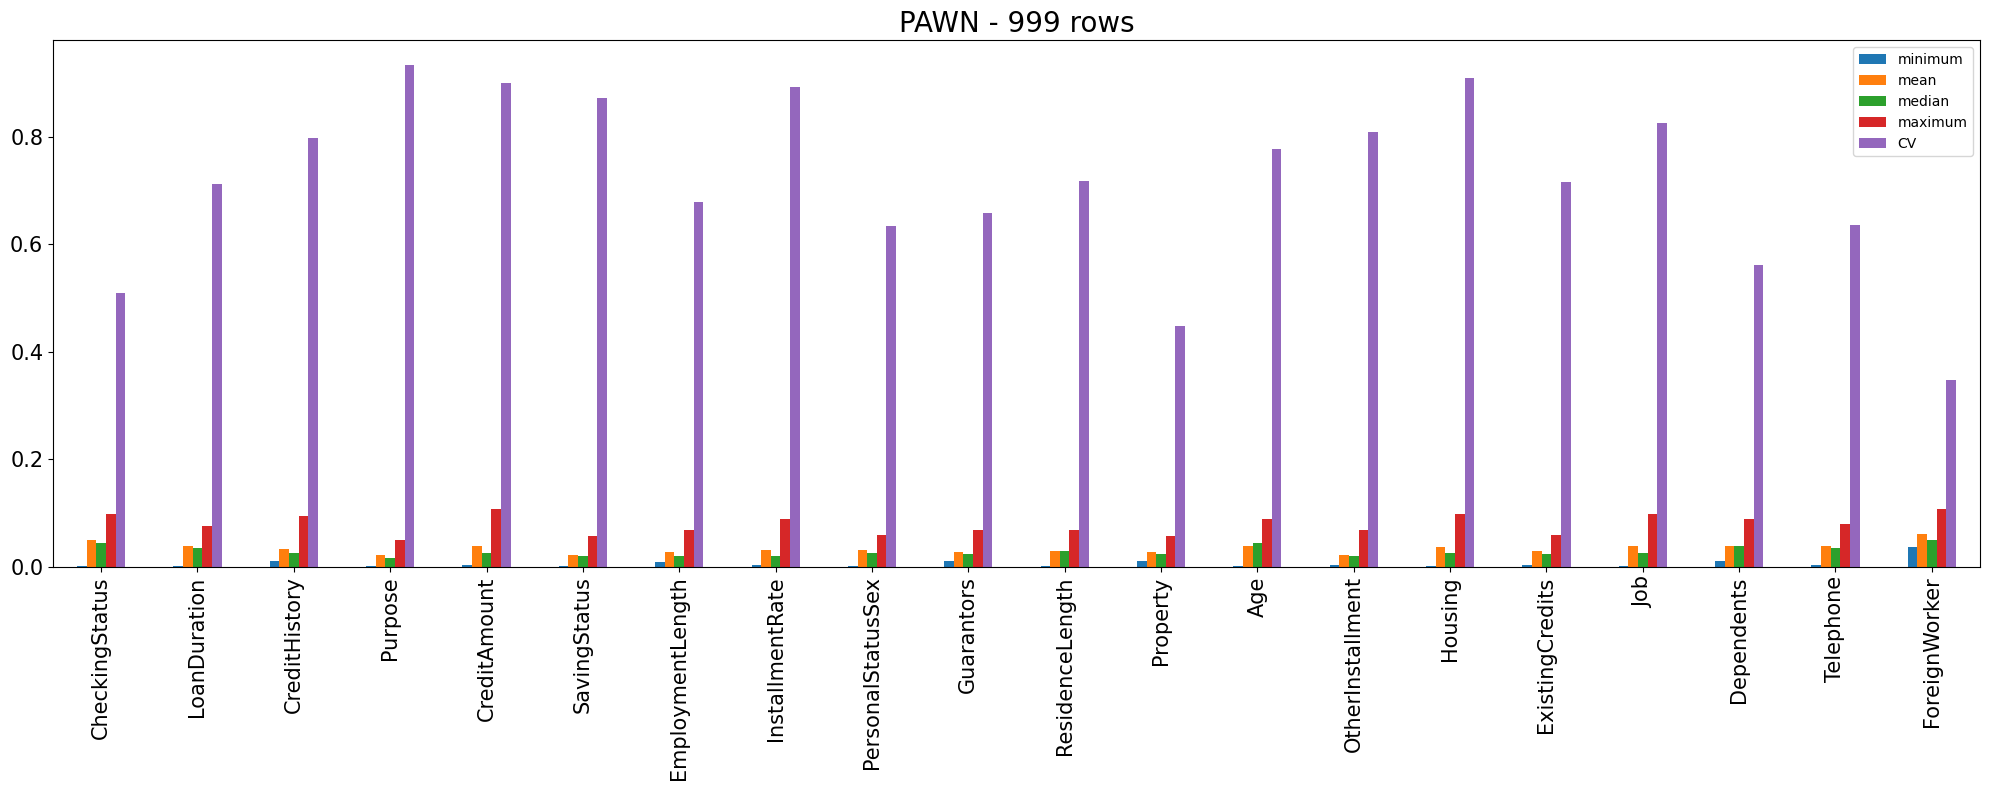

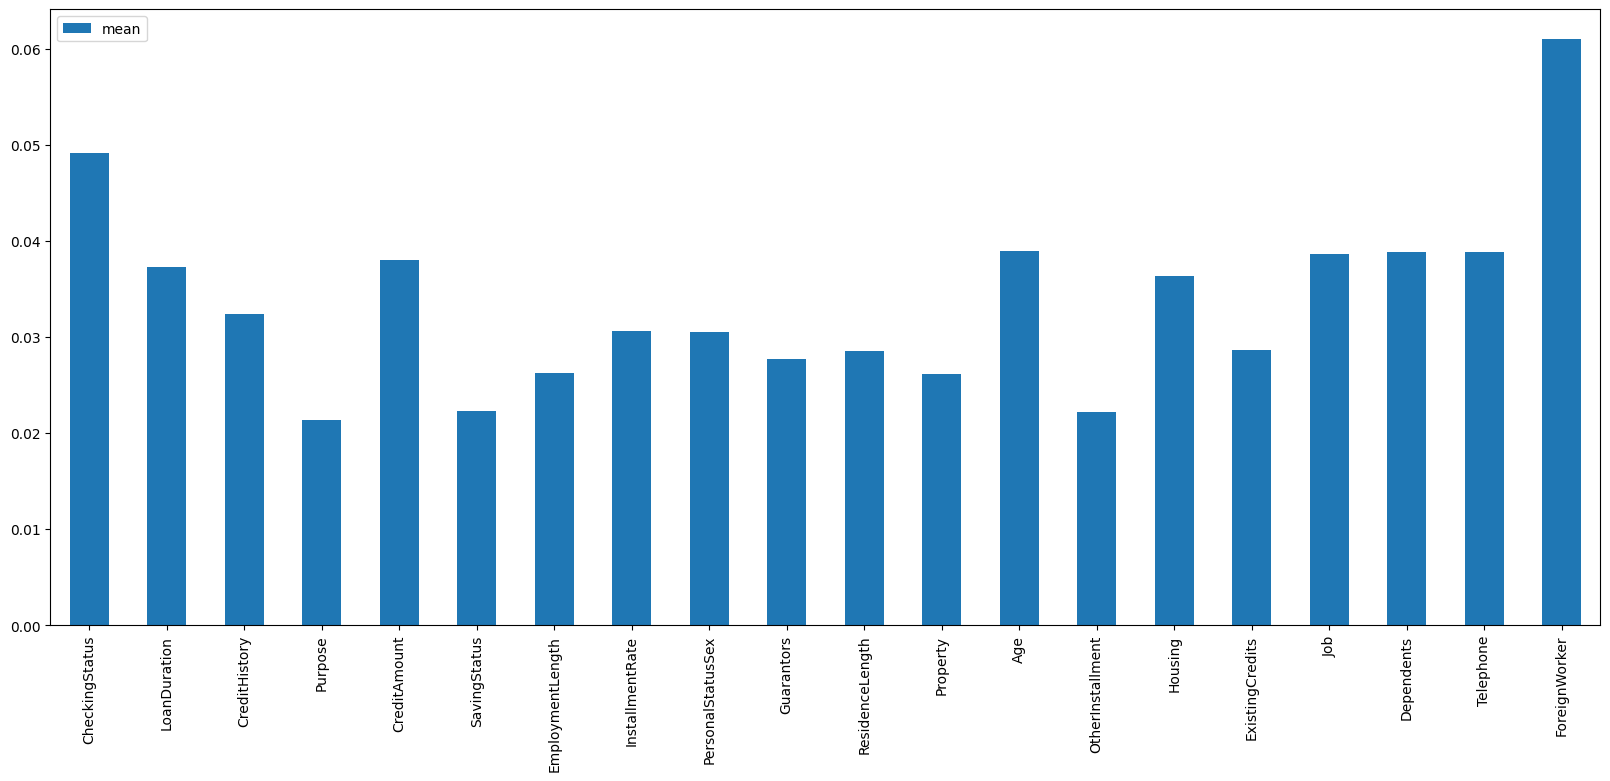

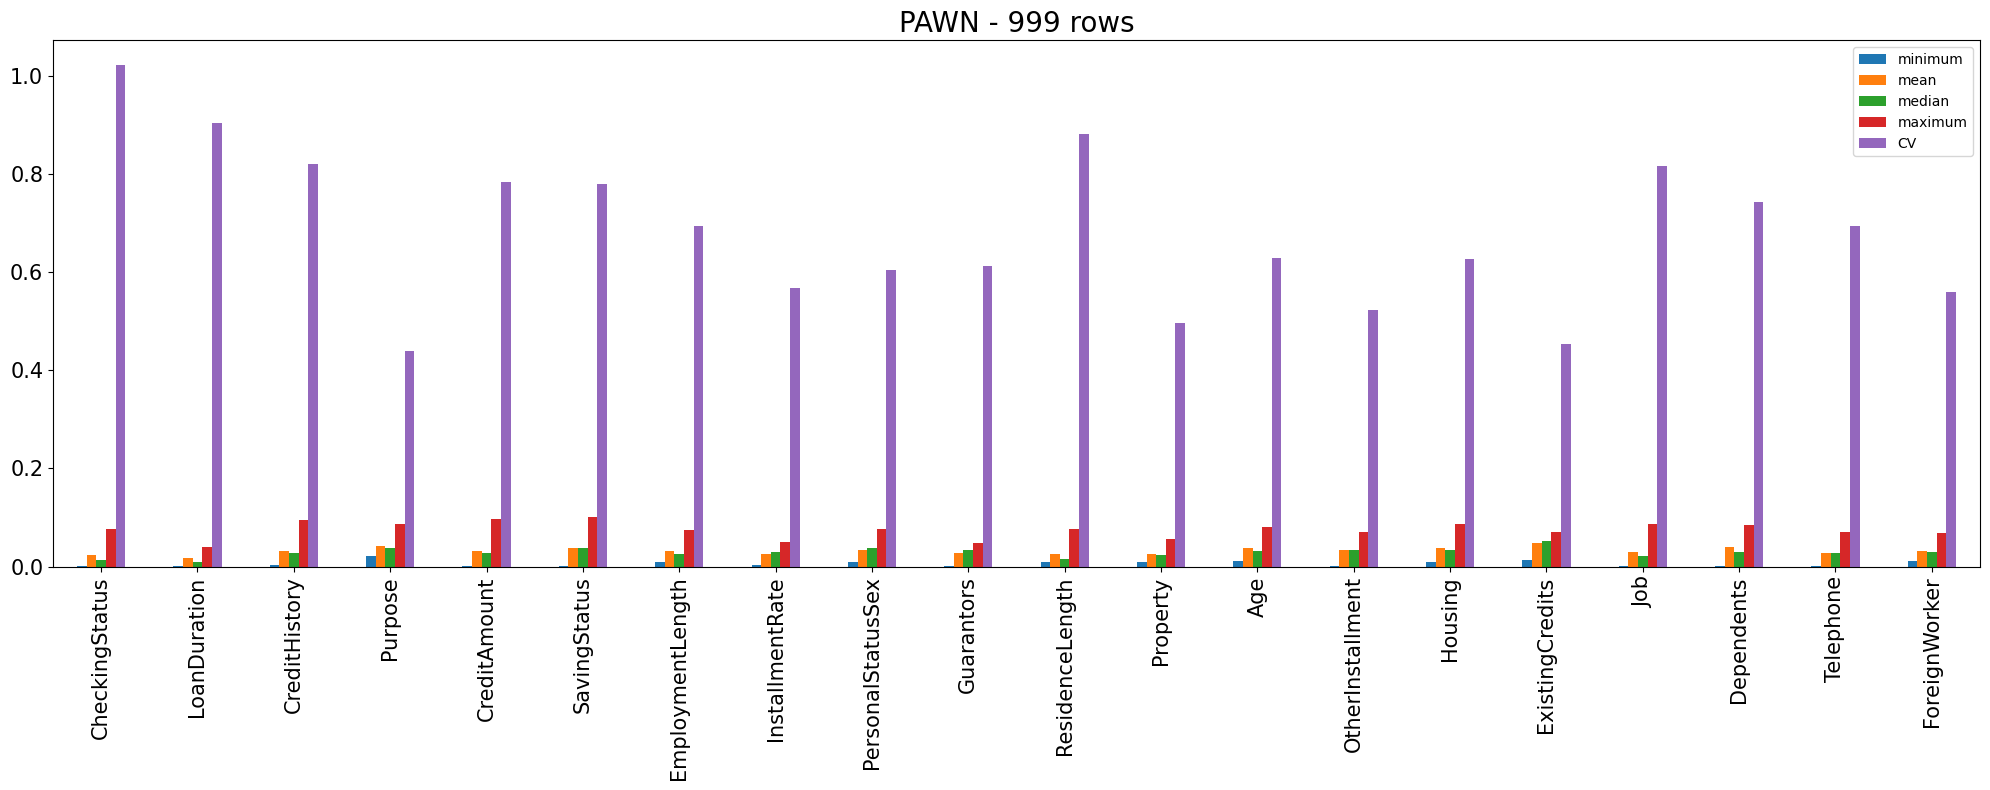

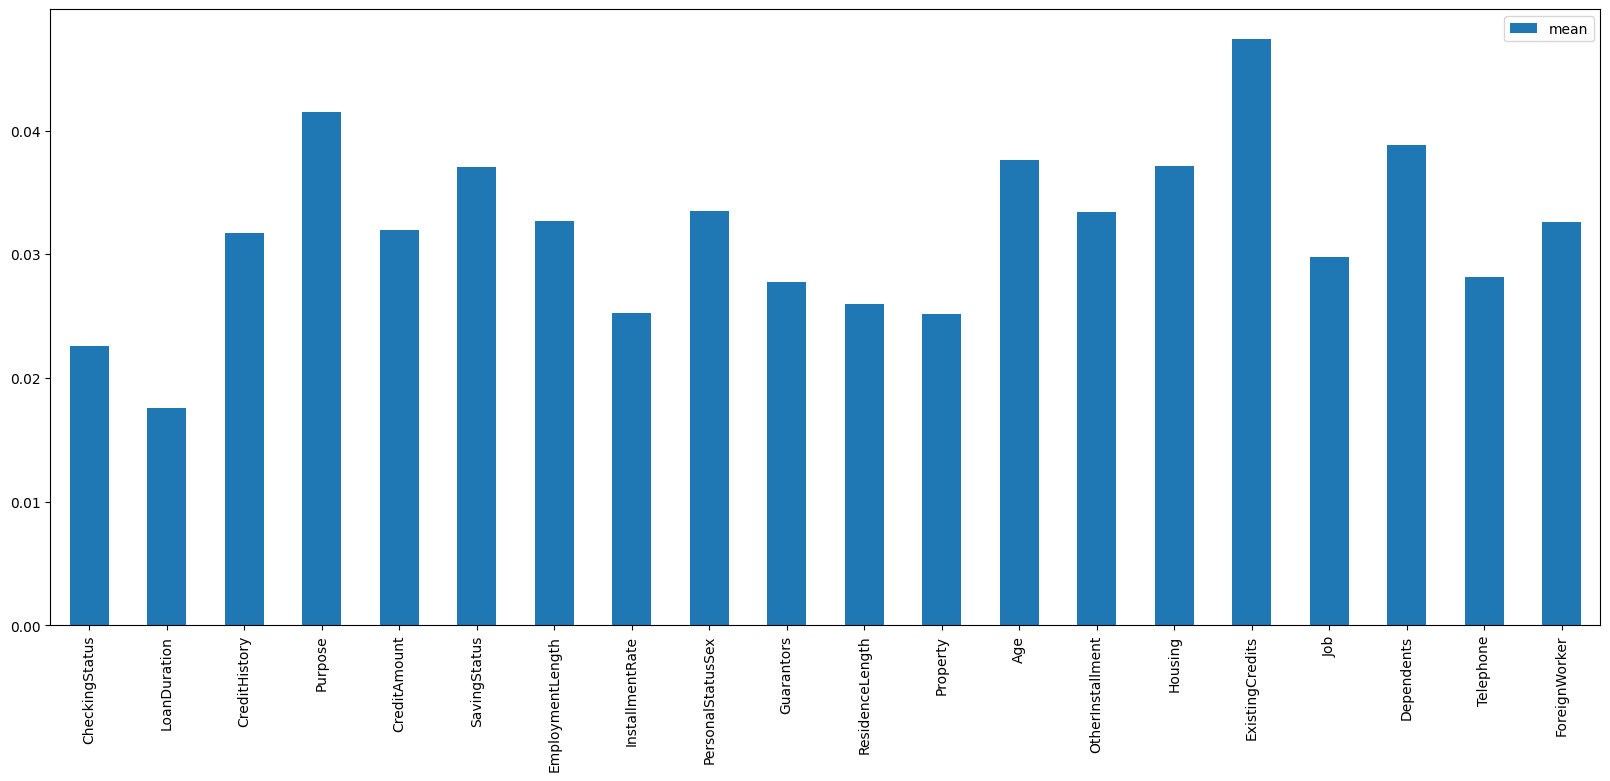

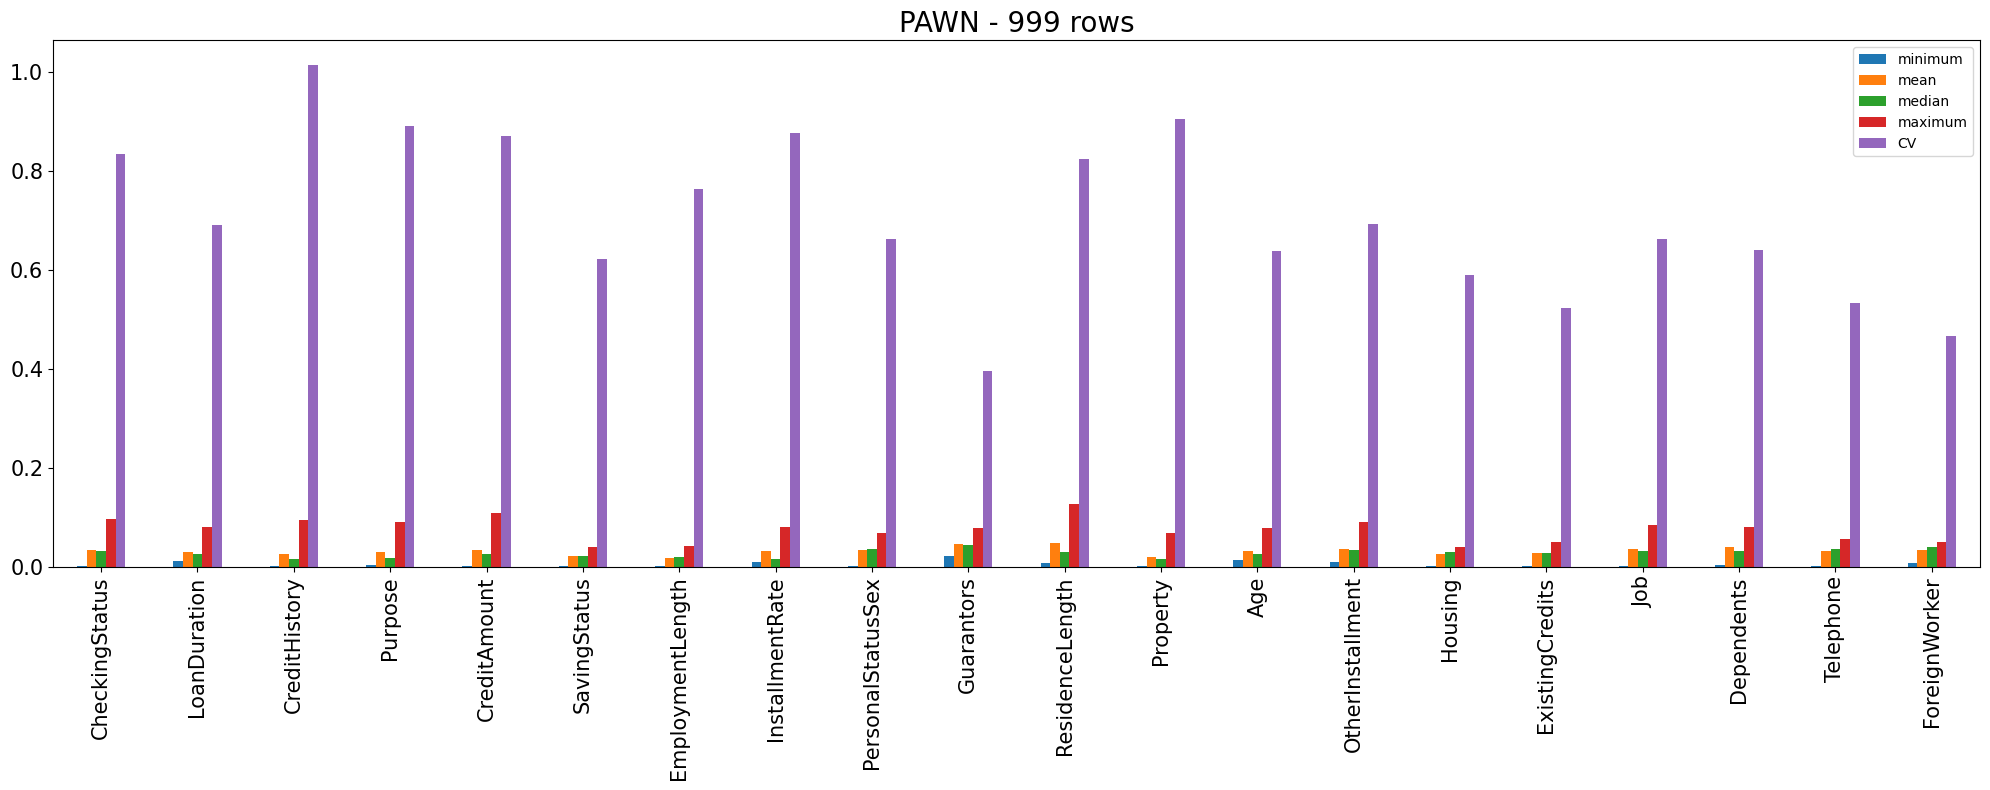

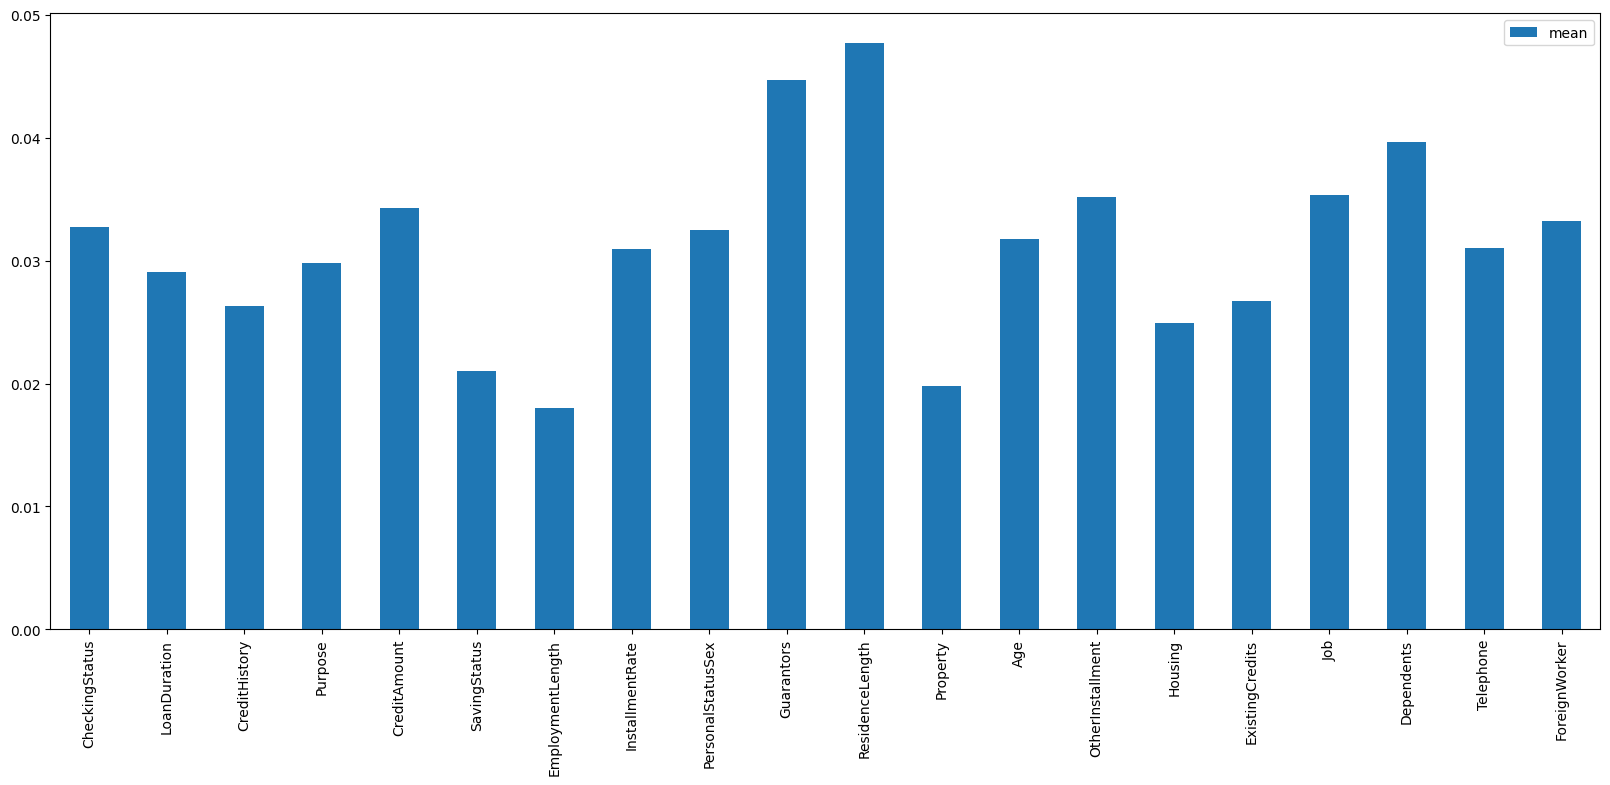

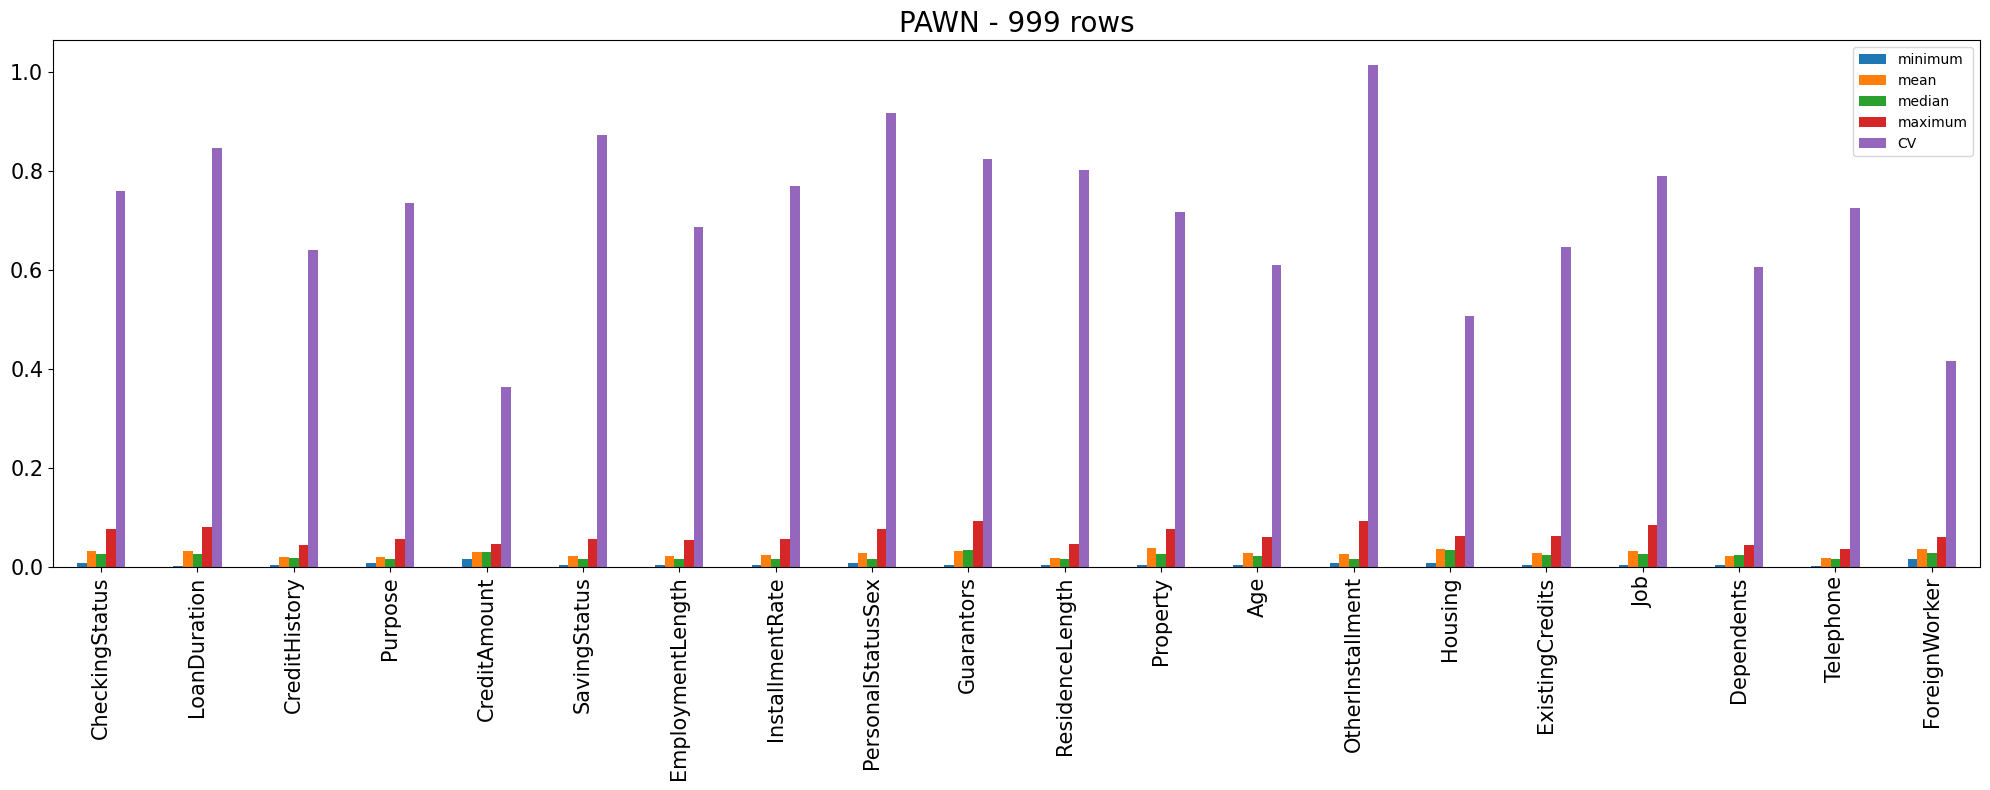

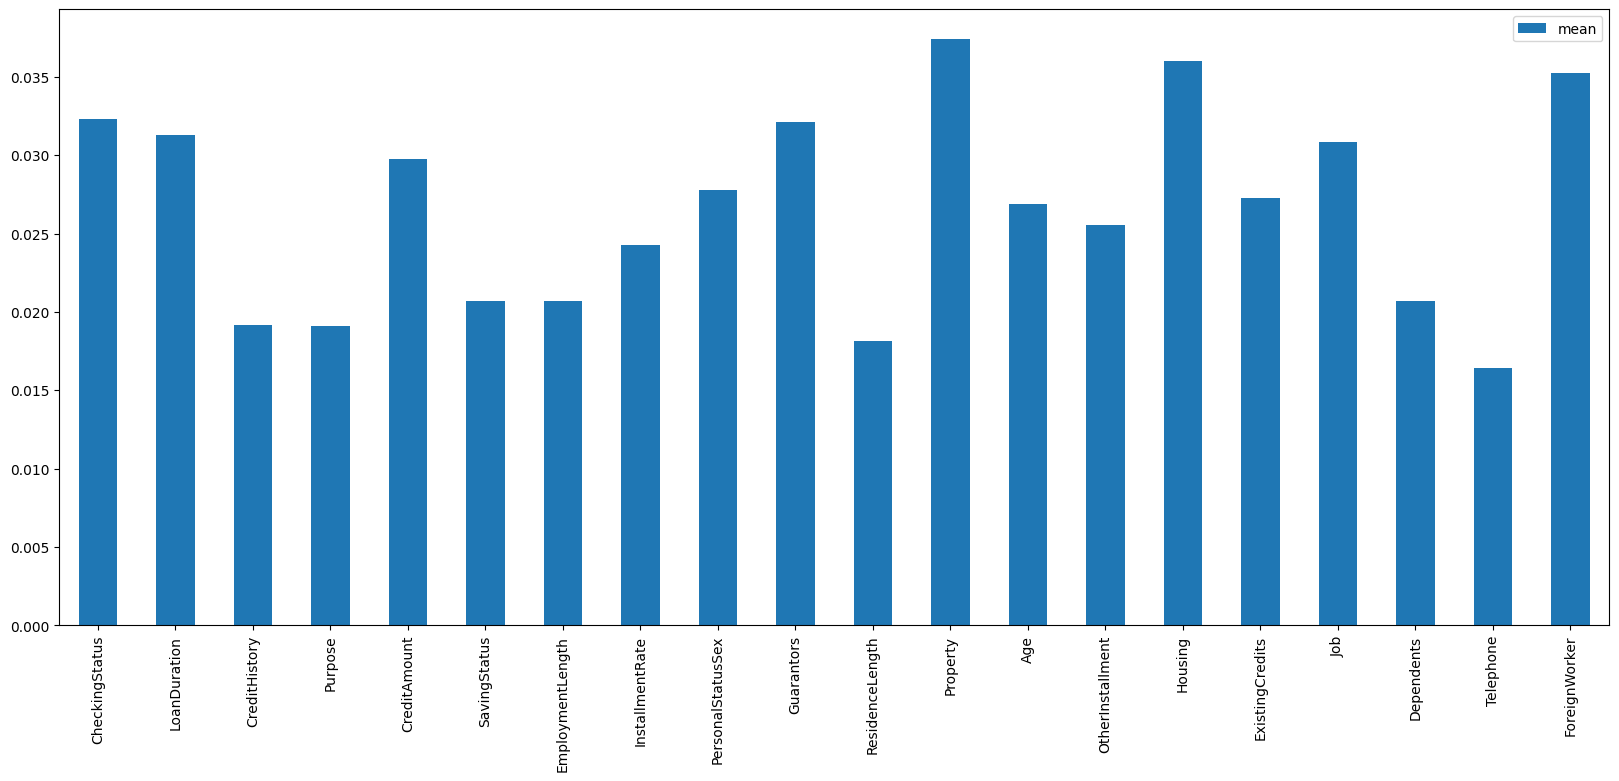

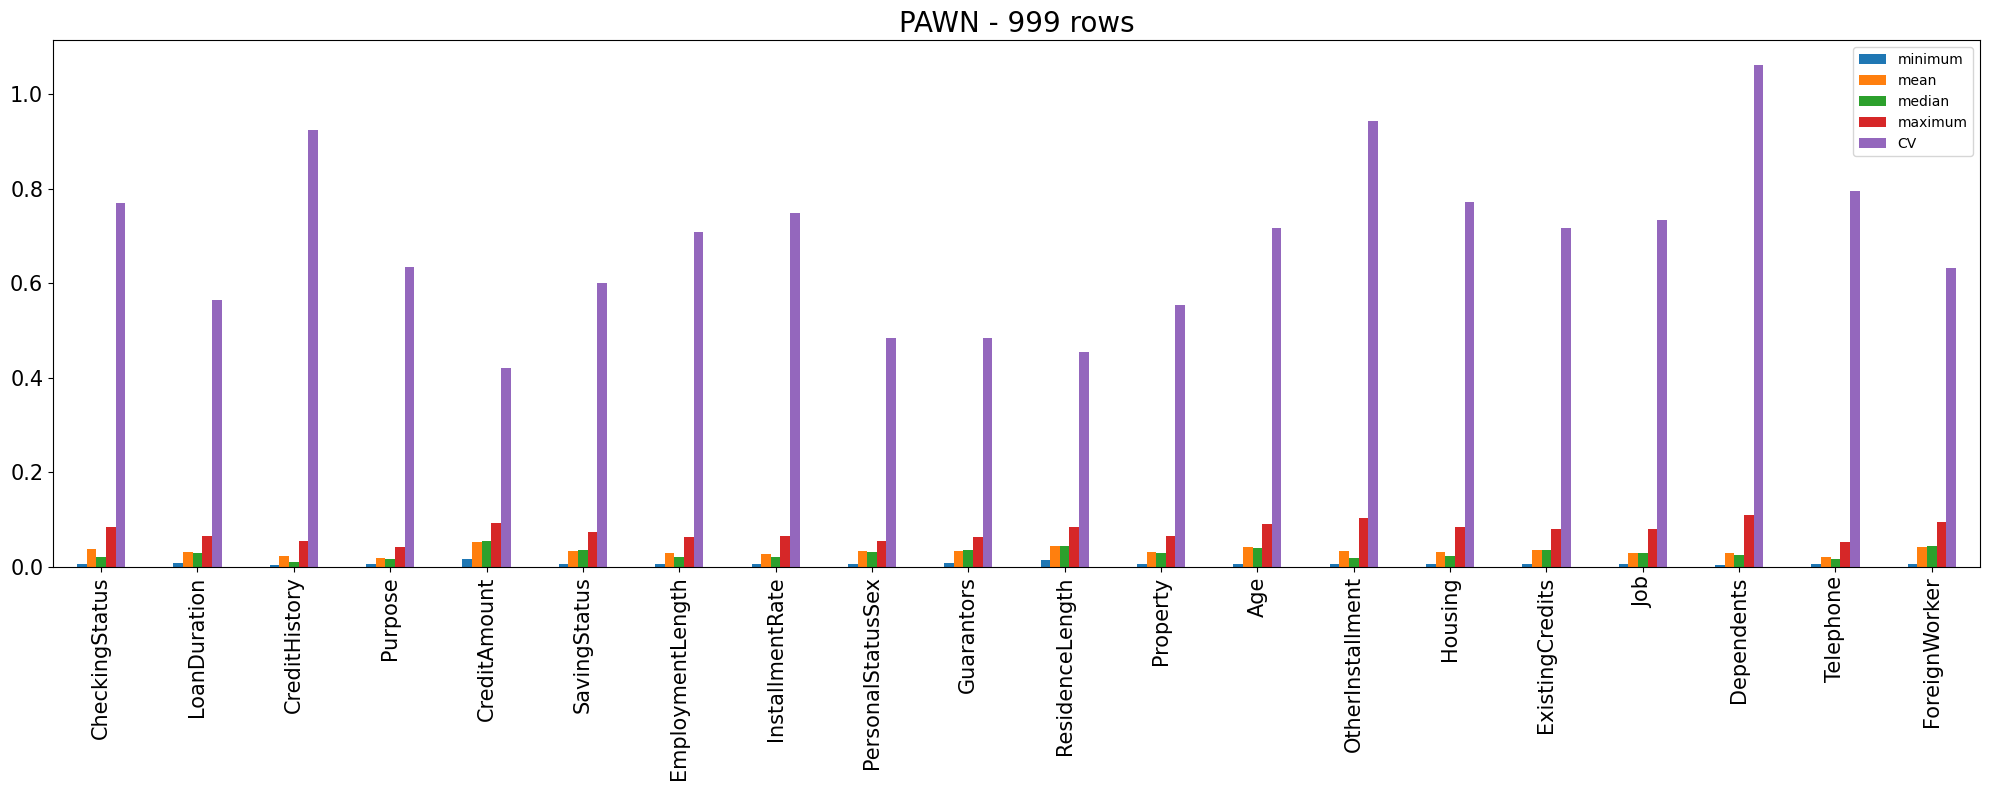

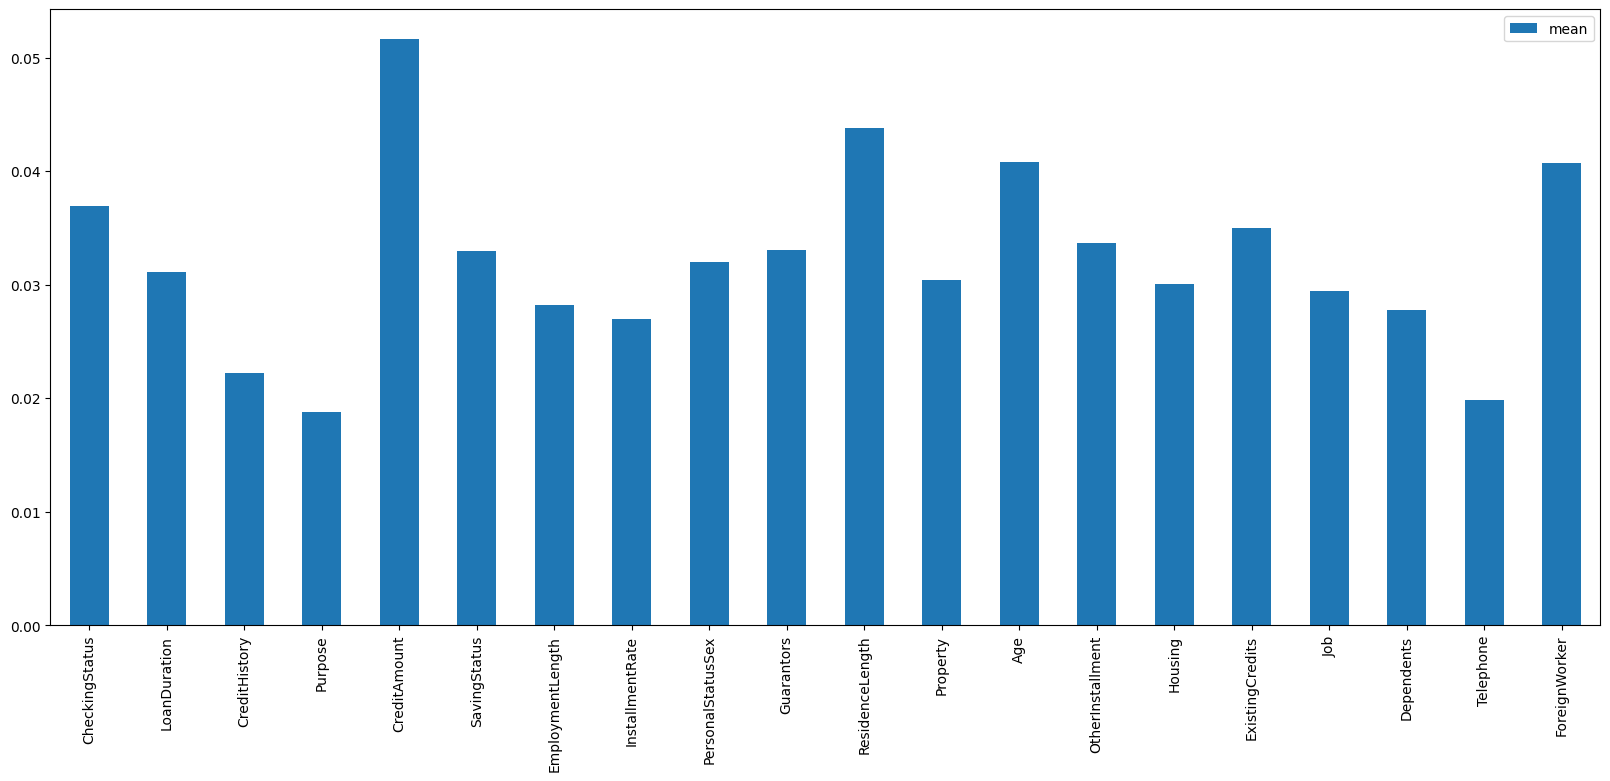

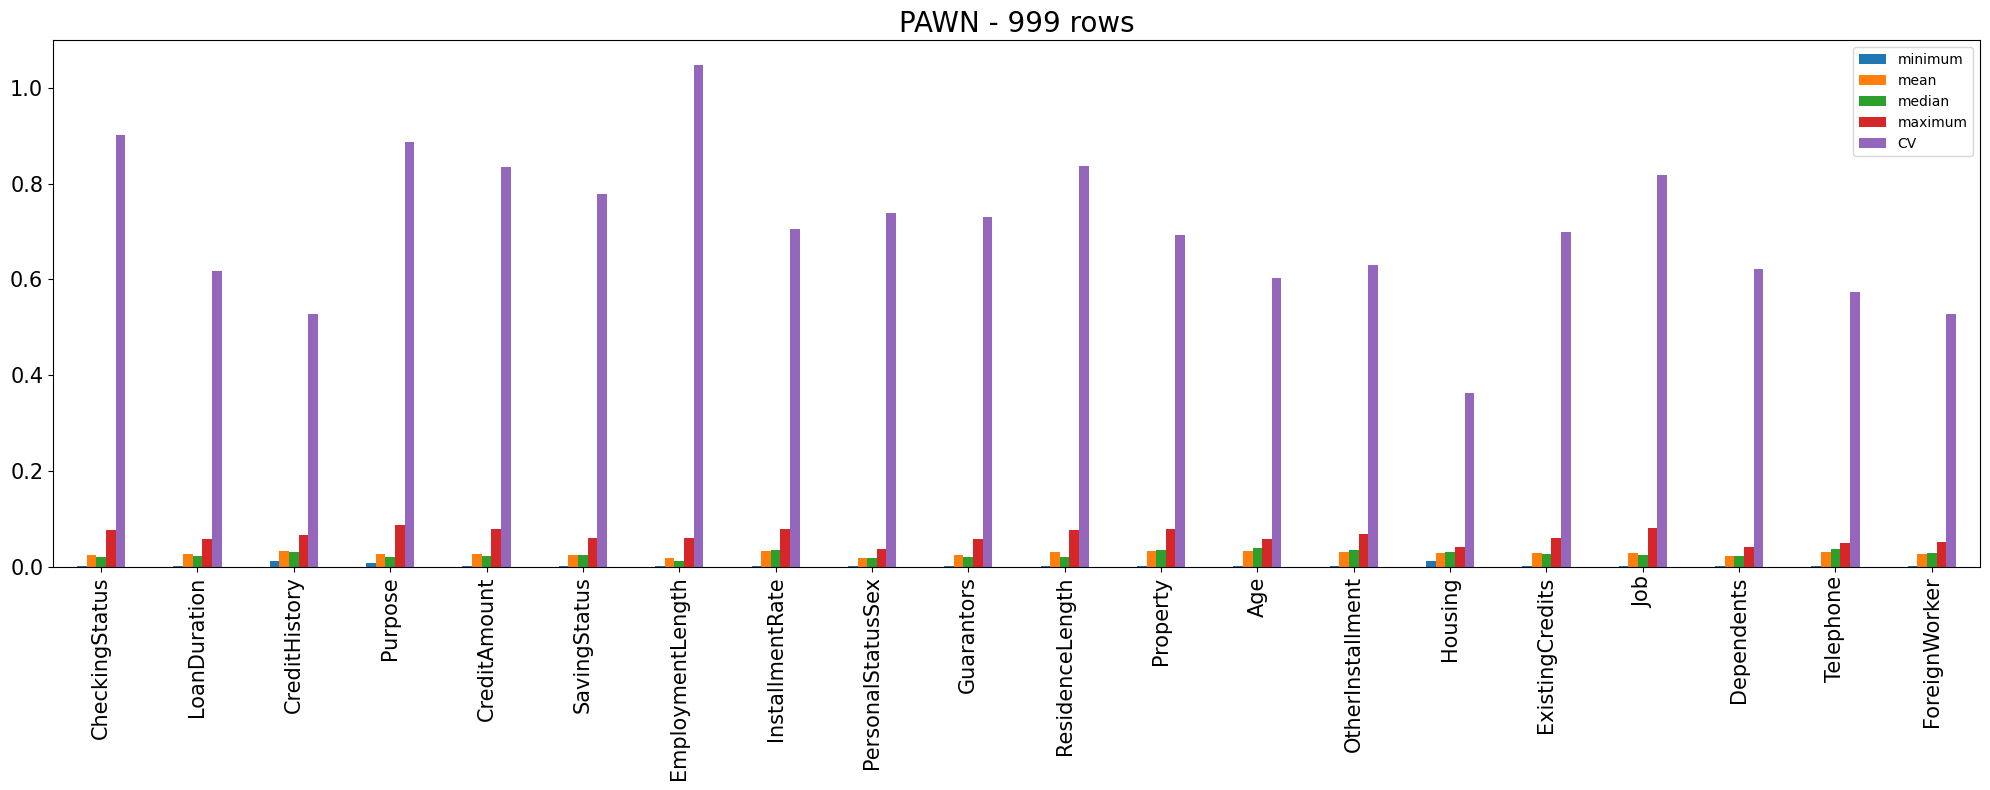

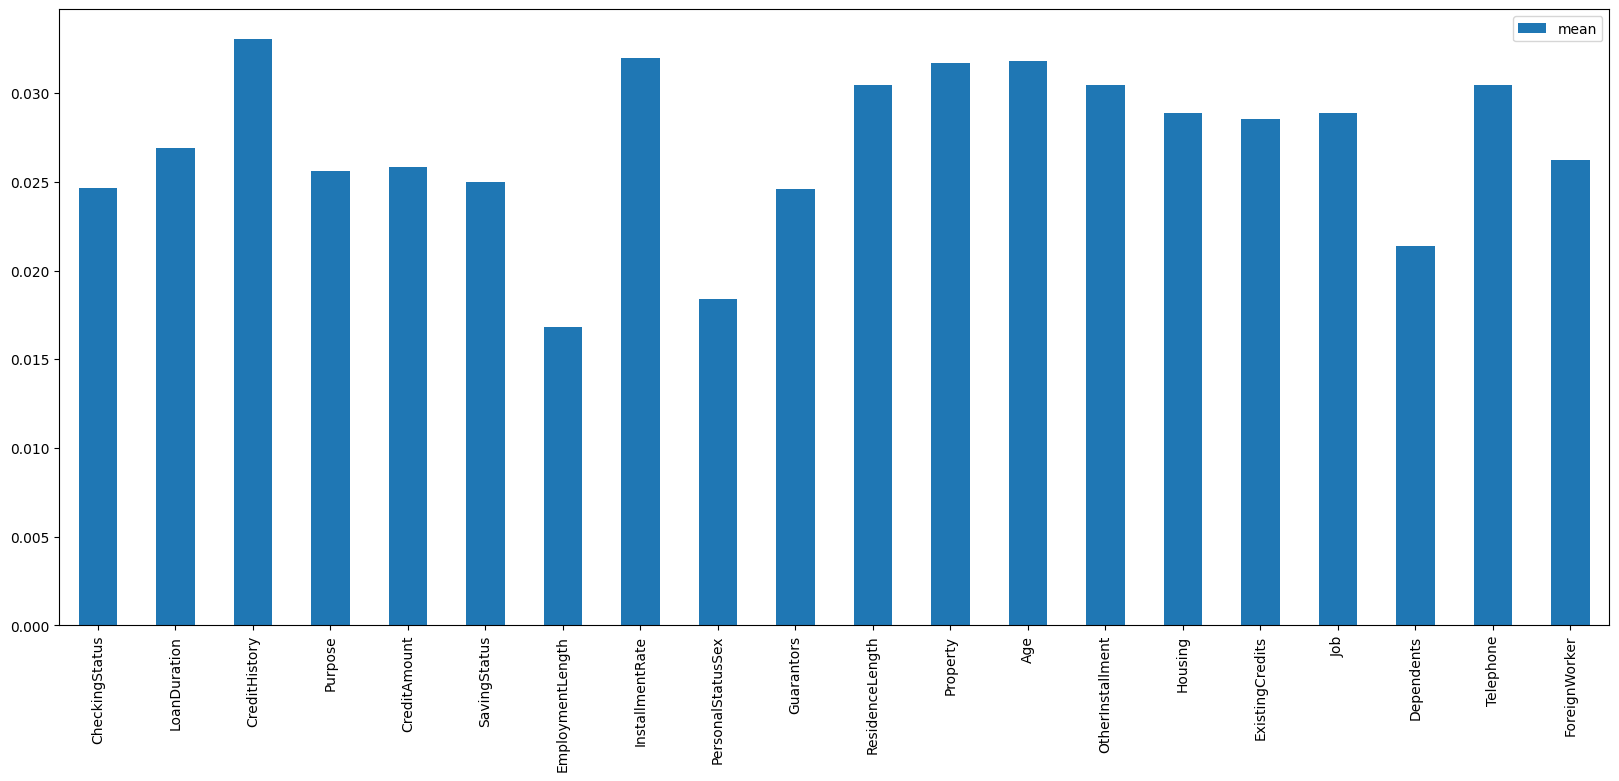

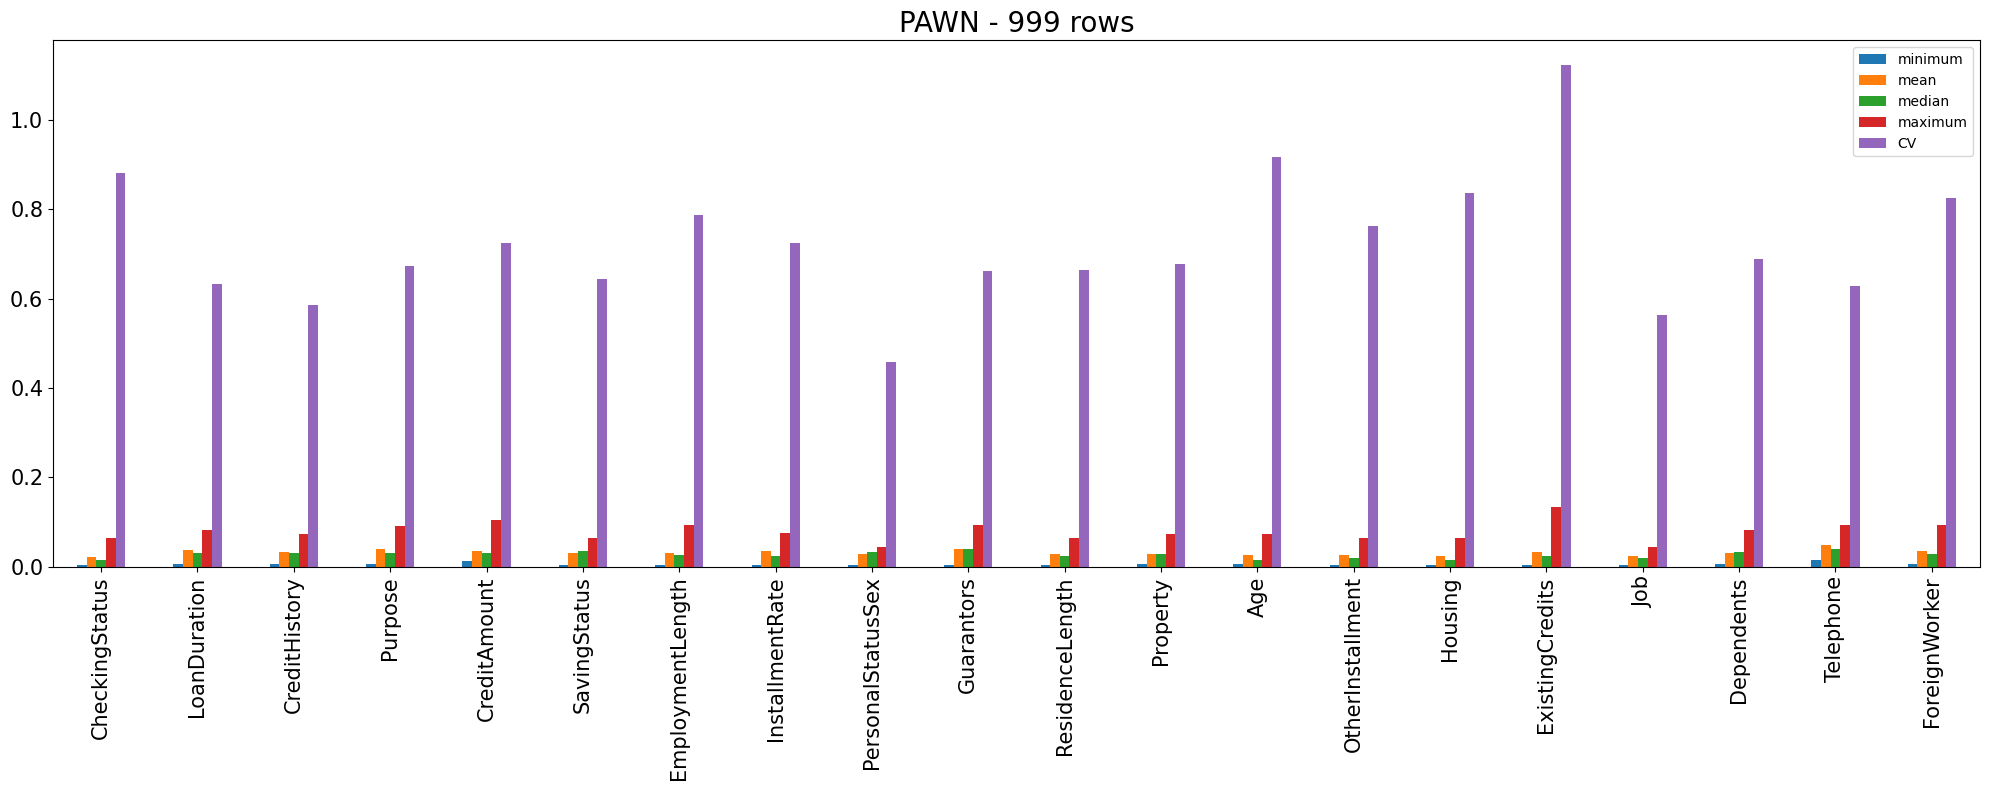

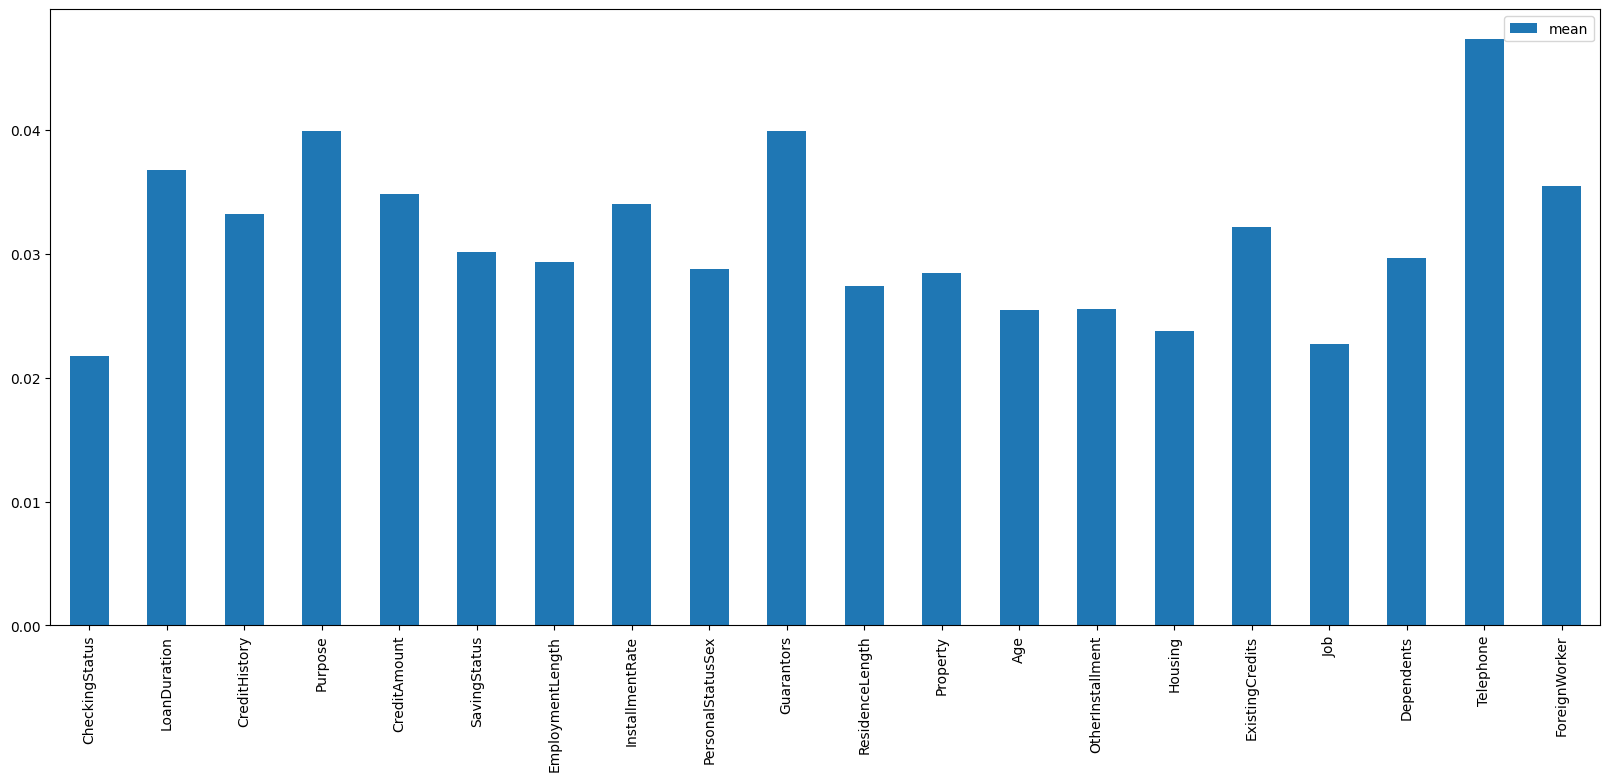

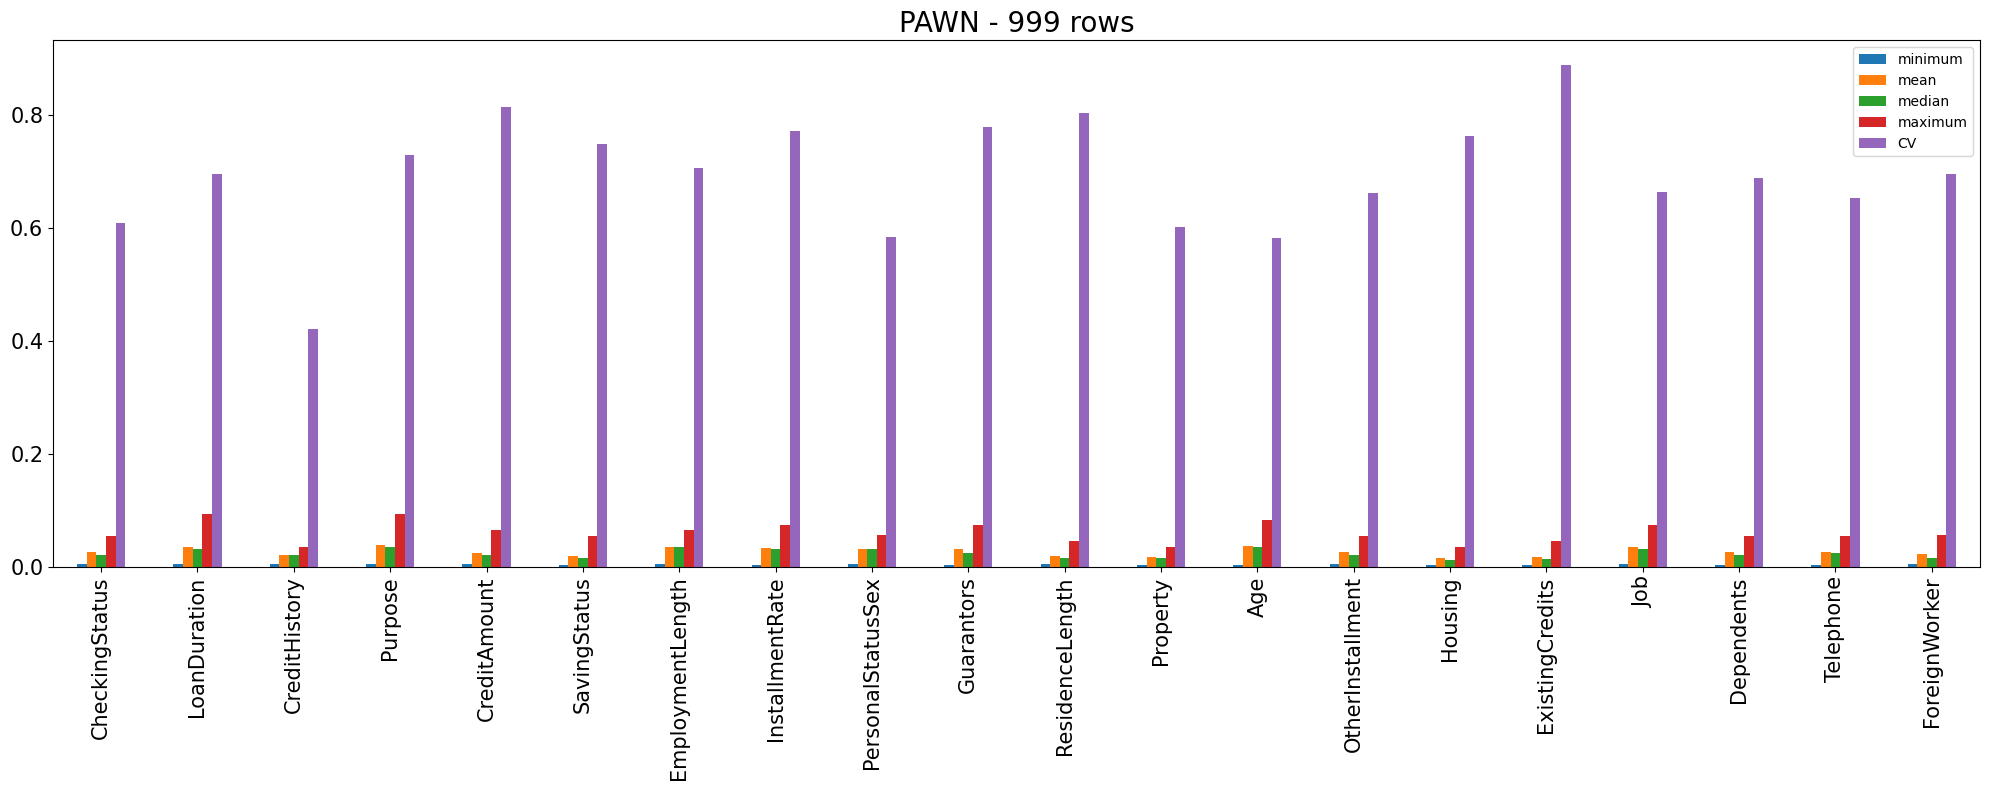

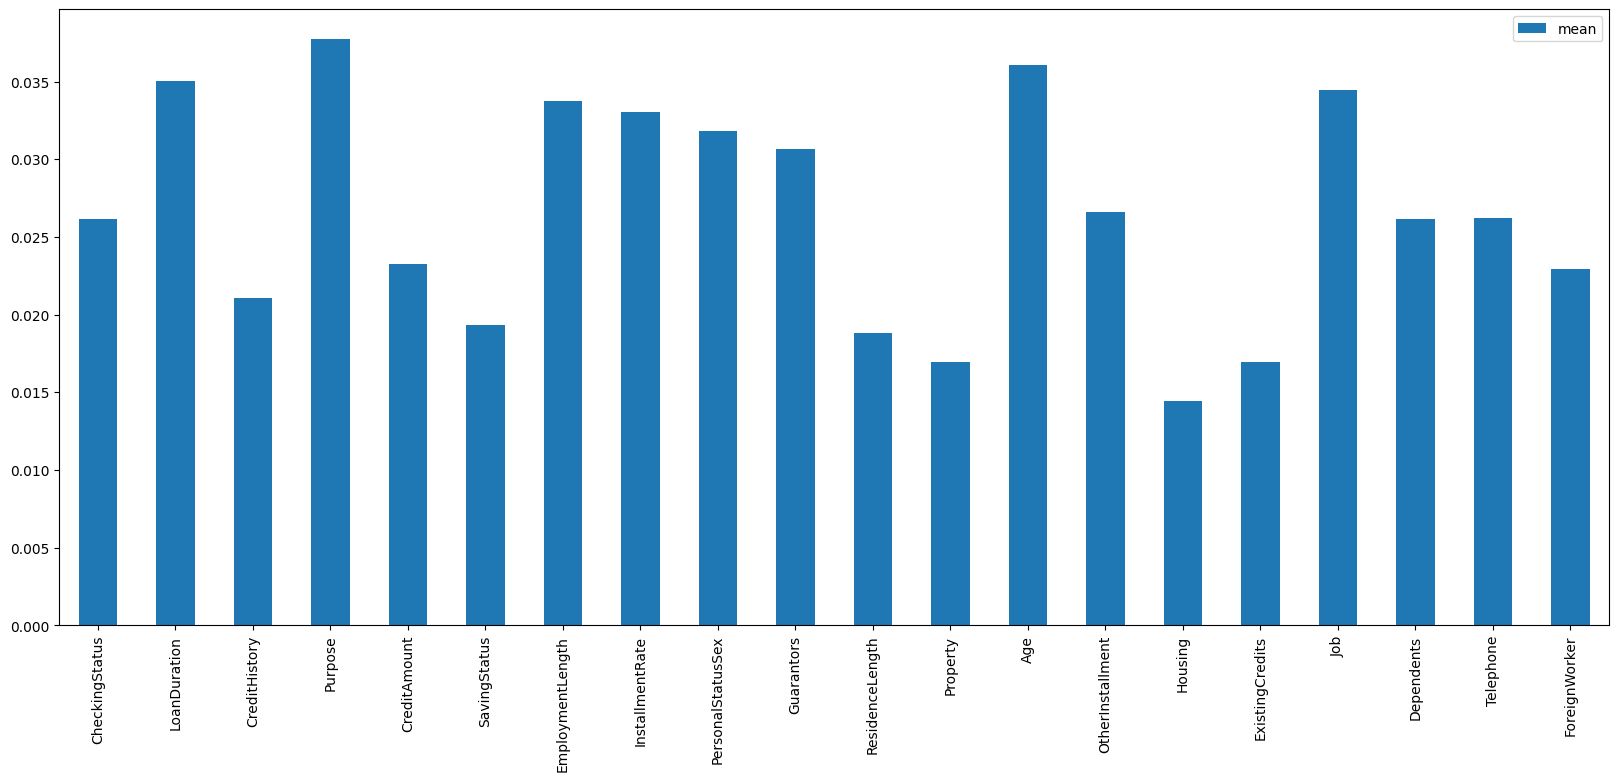

In [39]:
%%timeit
loan_pawn(credit_training_features)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


input shape:  (1024, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.002598  0.032090  0.010966  0.093022  1.012617
LoanDuration       0.002598  0.048696  0.045089  0.112860  0.702154
CreditHistory      0.005017  0.025675  0.015820  0.063840  0.793127
Purpose            0.002598  0.036931  0.034429  0.080268  0.520213
CreditAmount       0.004787  0.029516  0.028174  0.075072  0.717107
SavingStatus       0.007111  0.031963  0.039101  0.054036  0.568281
EmploymentLength   0.007111  0.041839  0.039216  0.103056  0.613570
InstallmentRate    0.002598  

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


input shape:  (1024, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.002049  0.025624  0.024272  0.076383  0.770670
LoanDuration       0.015179  0.033181  0.026126  0.070676  0.581064
CreditHistory      0.007755  0.029973  0.029412  0.052782  0.528742
Purpose            0.002049  0.026947  0.019608  0.063723  0.747406
CreditAmount       0.004238  0.040367  0.037883  0.090284  0.671308
SavingStatus       0.002049  0.015858  0.005471  0.056775  1.251076
EmploymentLength   0.002049  0.029117  0.028174  0.066579  0.684483
InstallmentRate    0.002049  

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


input shape:  (1024, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.000096  0.051161  0.054017  0.097943  0.608438
LoanDuration       0.002285  0.038369  0.049115  0.068532  0.584688
CreditHistory      0.000096  0.039368  0.029412  0.094802  0.914954
Purpose            0.009708  0.029478  0.024510  0.075385  0.707761
CreditAmount       0.000096  0.024672  0.019417  0.058919  0.816287
SavingStatus       0.002285  0.038854  0.035266  0.078336  0.599166
EmploymentLength   0.007424  0.024215  0.019704  0.058919  0.757300
InstallmentRate    0.011994  

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


input shape:  (1024, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.016213  0.057228  0.036329  0.175360  0.821881
LoanDuration       0.001111  0.031487  0.039216  0.051748  0.551438
CreditHistory      0.008693  0.052037  0.041183  0.116536  0.565304
Purpose            0.010915  0.027156  0.027111  0.047909  0.399619
CreditAmount       0.001111  0.034311  0.028301  0.116536  1.016558
SavingStatus       0.001111  0.034203  0.039216  0.055048  0.481288
EmploymentLength   0.006504  0.026991  0.020607  0.077321  0.825776
InstallmentRate    0.001111  

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


input shape:  (1024, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.007424  0.061964  0.062202  0.098135  0.481694
LoanDuration       0.000096  0.032068  0.018418  0.088140  0.922257
CreditHistory      0.009708  0.031972  0.015849  0.088140  0.924781
Purpose            0.000096  0.034419  0.034409  0.060537  0.592792
CreditAmount       0.000096  0.021826  0.024510  0.046259  0.602113
SavingStatus       0.000096  0.039806  0.052493  0.068723  0.639958
EmploymentLength   0.000096  0.024681  0.019704  0.058728  0.741449
InstallmentRate    0.000096  

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


input shape:  (1024, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.007054  0.026642  0.029259  0.044271  0.478679
LoanDuration       0.007054  0.037419  0.034314  0.083180  0.653469
CreditHistory      0.004749  0.027137  0.024663  0.045889  0.428524
Purpose            0.002655  0.020700  0.015811  0.045889  0.633158
CreditAmount       0.005055  0.028567  0.019608  0.073376  0.792755
SavingStatus       0.004749  0.035951  0.024663  0.112898  0.919928
EmploymentLength   0.014553  0.038902  0.039216  0.063879  0.417402
InstallmentRate    0.002655  

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


input shape:  (1024, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.019512  0.043794  0.036550  0.127355  0.675963
LoanDuration       0.009900  0.037855  0.039311  0.065676  0.508994
CreditHistory      0.009708  0.040320  0.039216  0.068723  0.542674
Purpose            0.000096  0.018390  0.017133  0.058919  0.954234
CreditAmount       0.000096  0.022254  0.019417  0.049115  0.673727
SavingStatus       0.000096  0.032401  0.032981  0.070246  0.737058
EmploymentLength   0.000096  0.025747  0.023272  0.088331  0.922646
InstallmentRate    0.011994  

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


input shape:  (1024, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.013283  0.065334  0.067152  0.123411  0.537464
LoanDuration       0.023648  0.049837  0.044969  0.120079  0.530407
CreditHistory      0.004040  0.038435  0.037931  0.092276  0.800981
Purpose            0.003574  0.022218  0.024182  0.062864  0.759136
CreditAmount       0.015568  0.039455  0.035175  0.083804  0.494259
SavingStatus       0.003574  0.028098  0.029412  0.061827  0.718523
EmploymentLength   0.003574  0.023547  0.019746  0.054783  0.665053
InstallmentRate    0.003574  

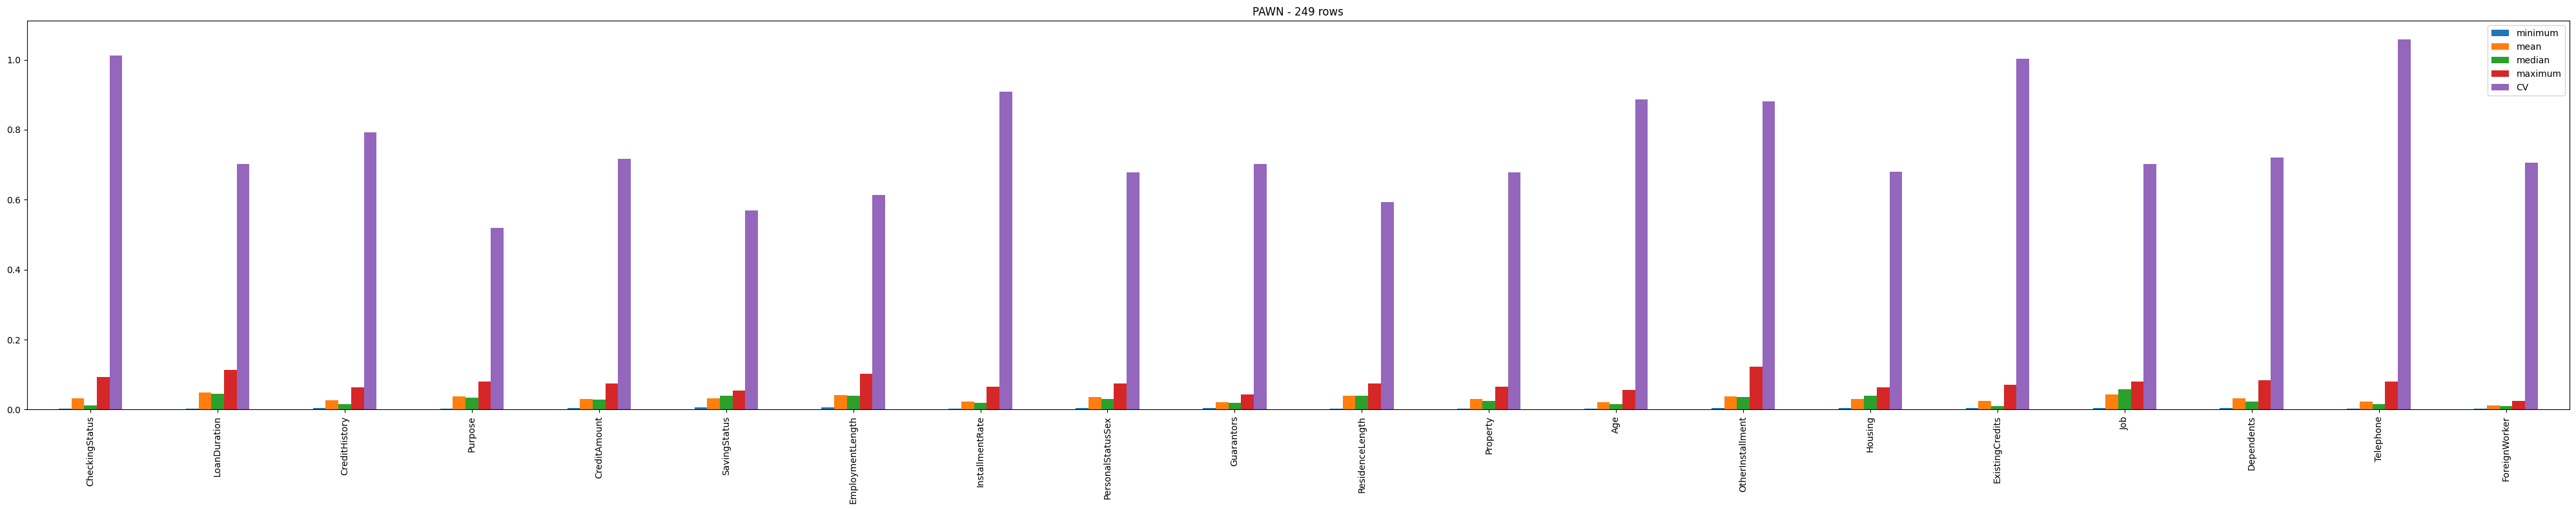

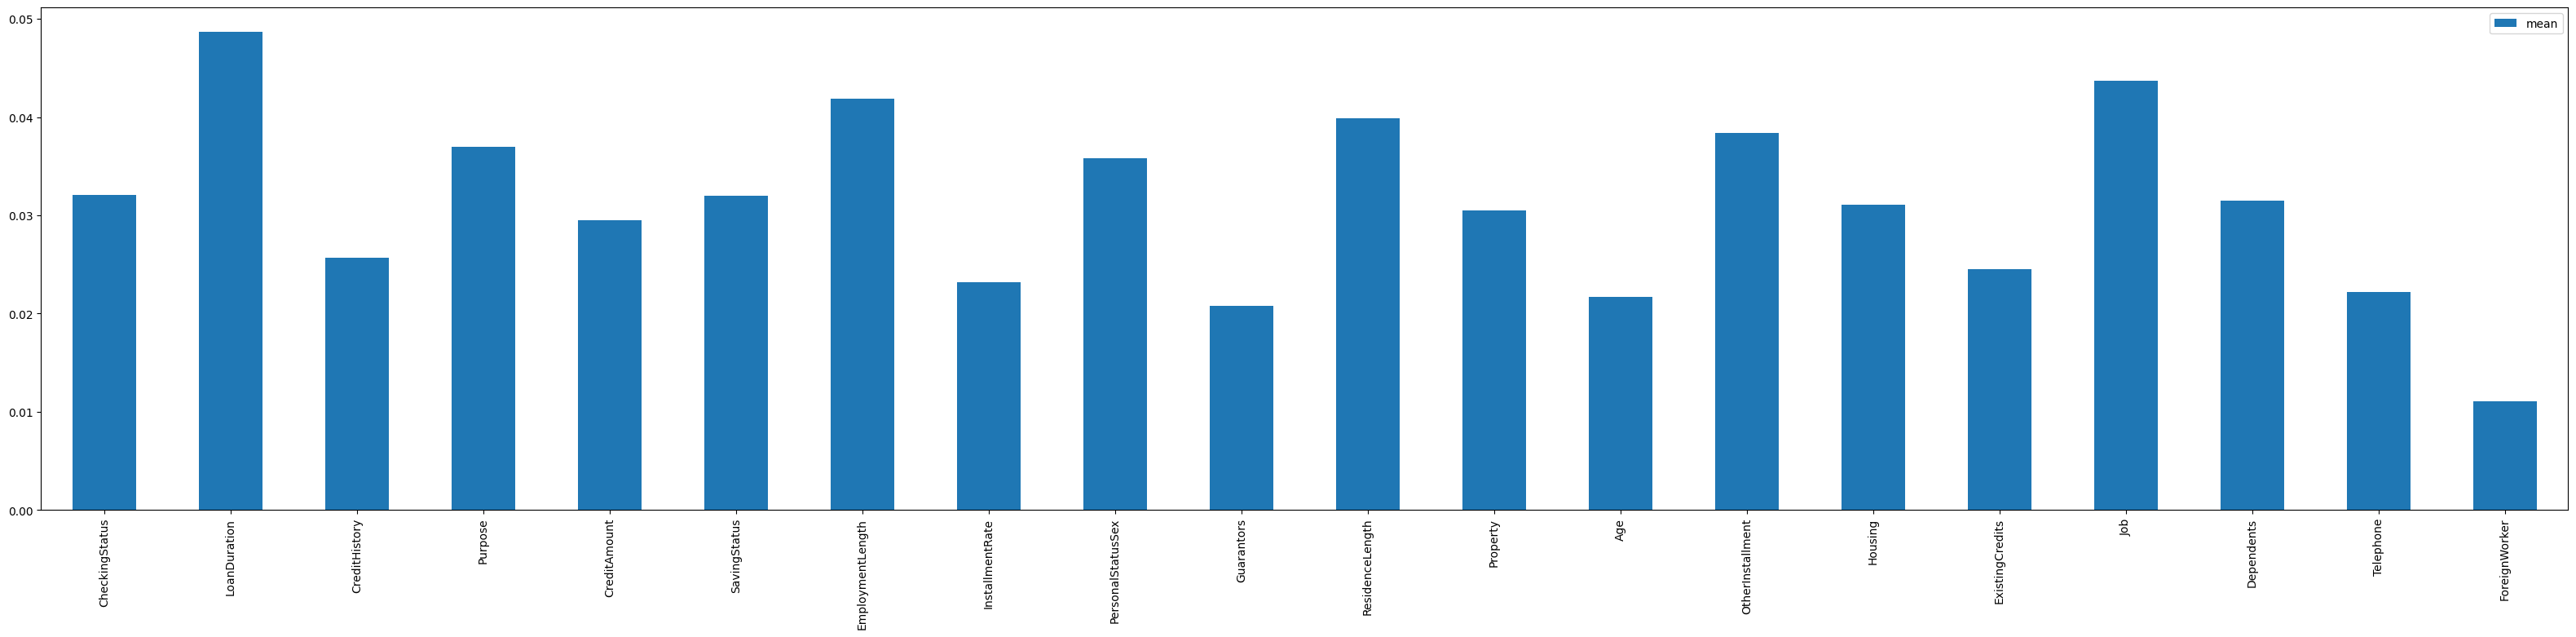

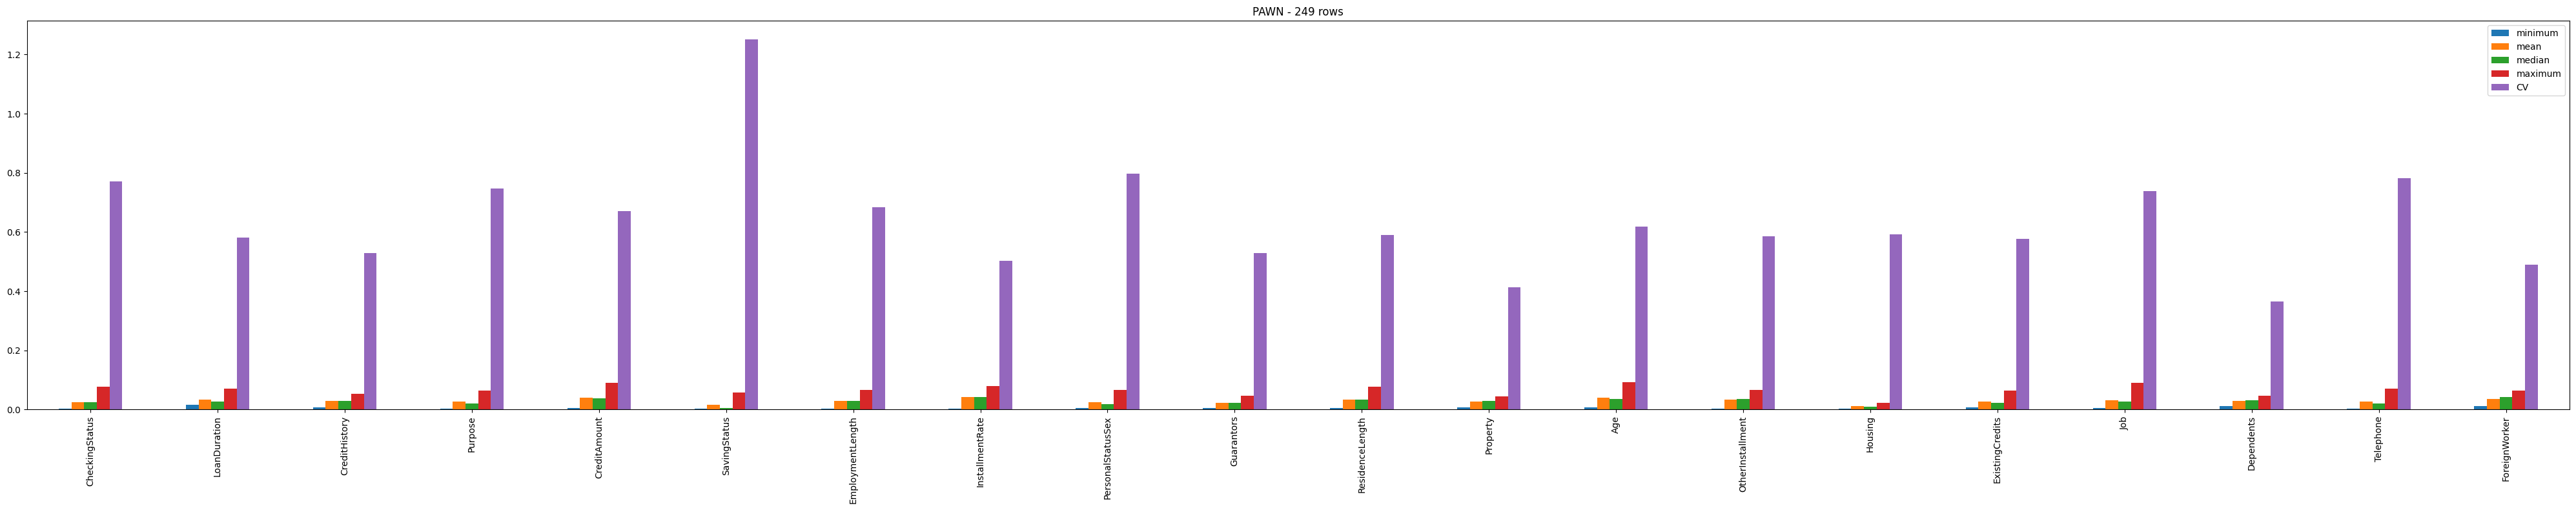

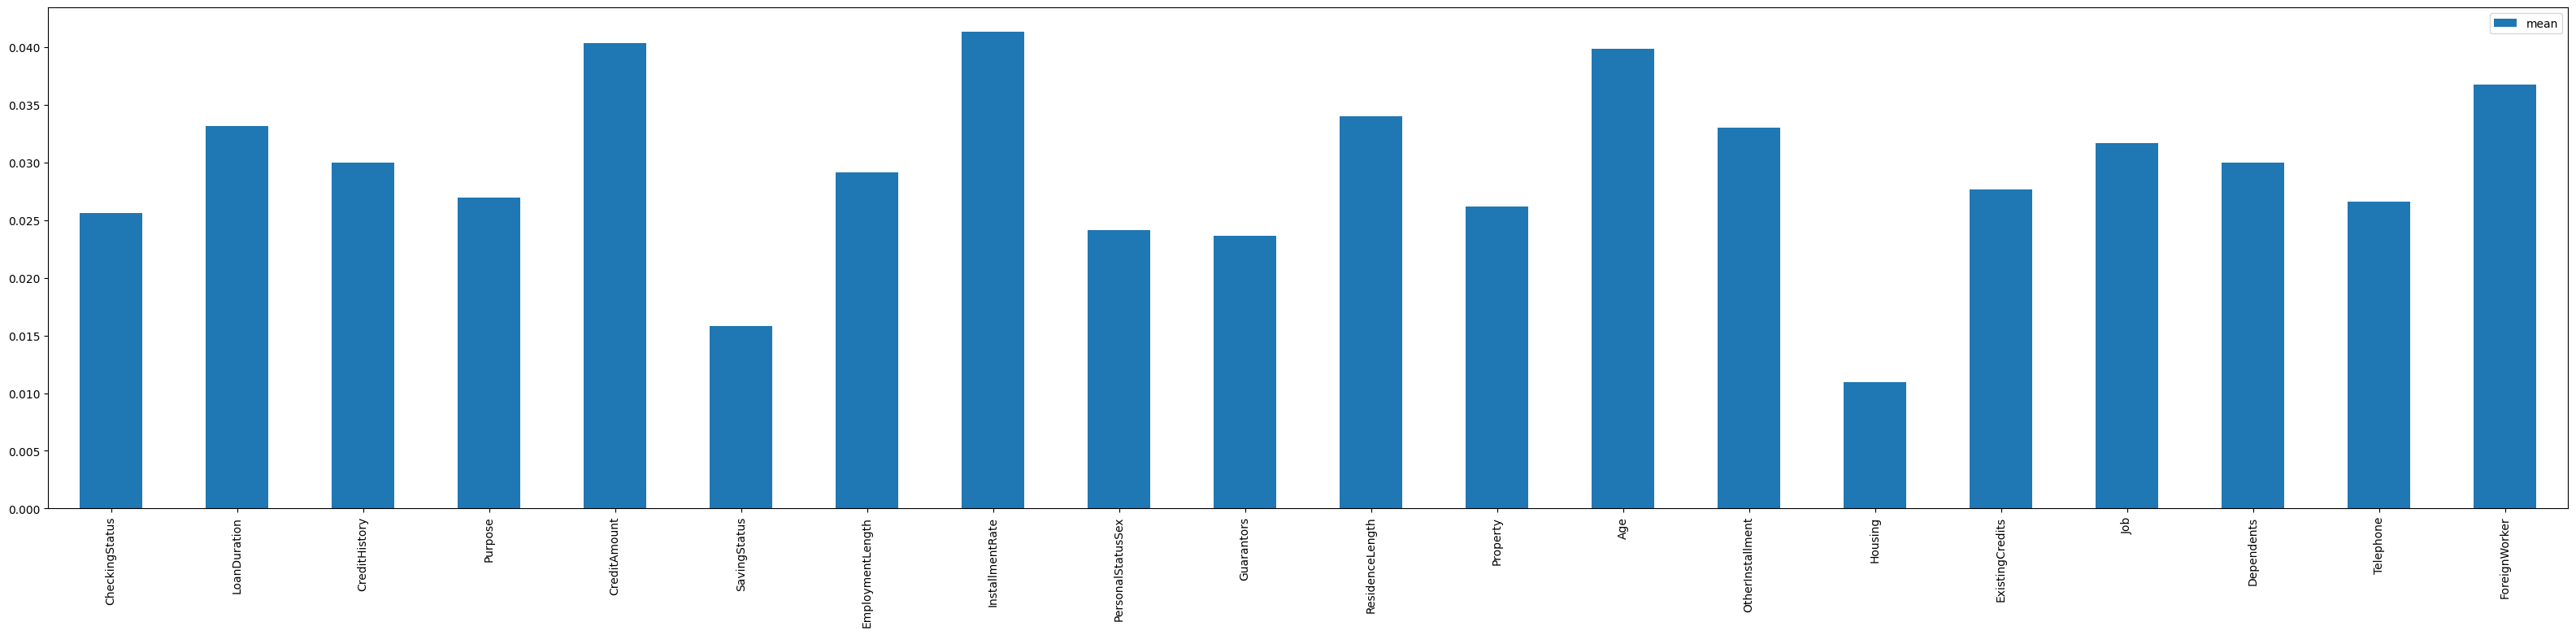

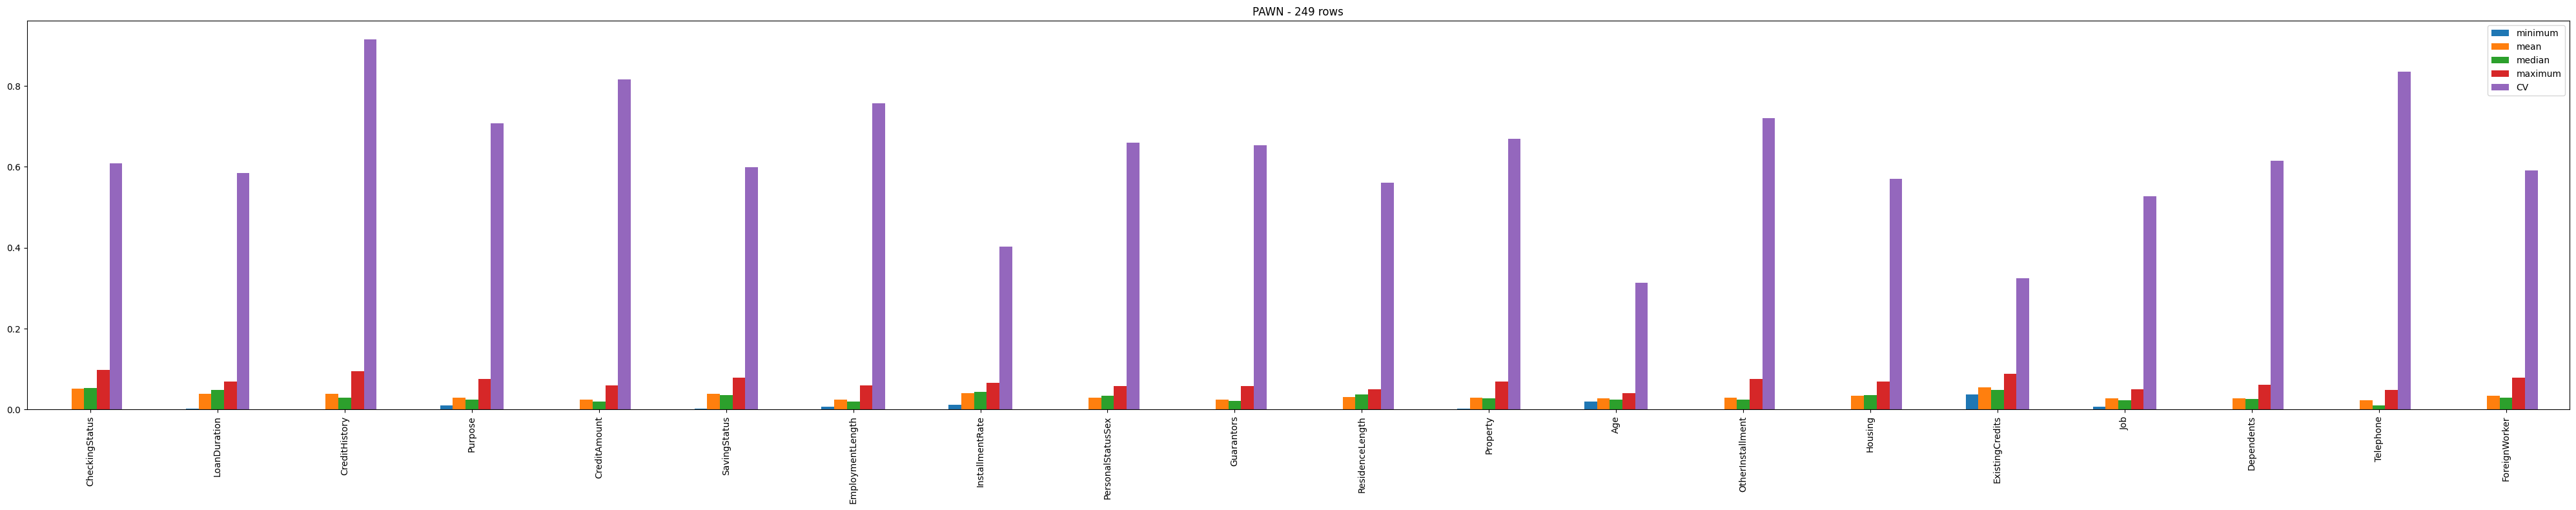

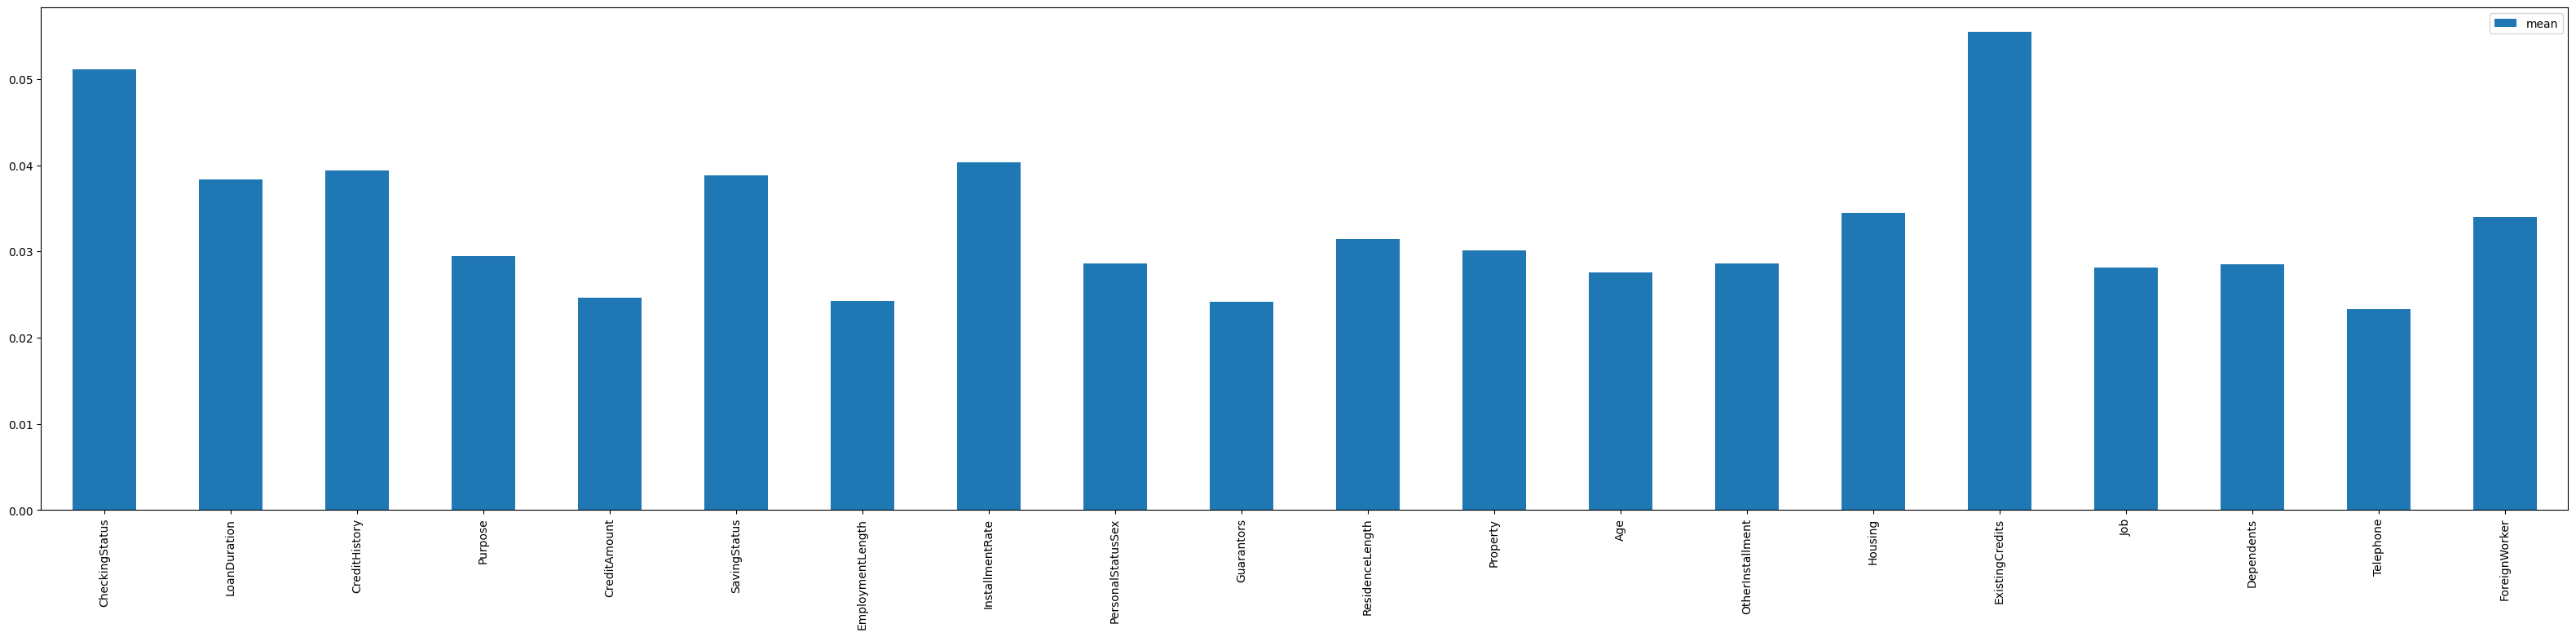

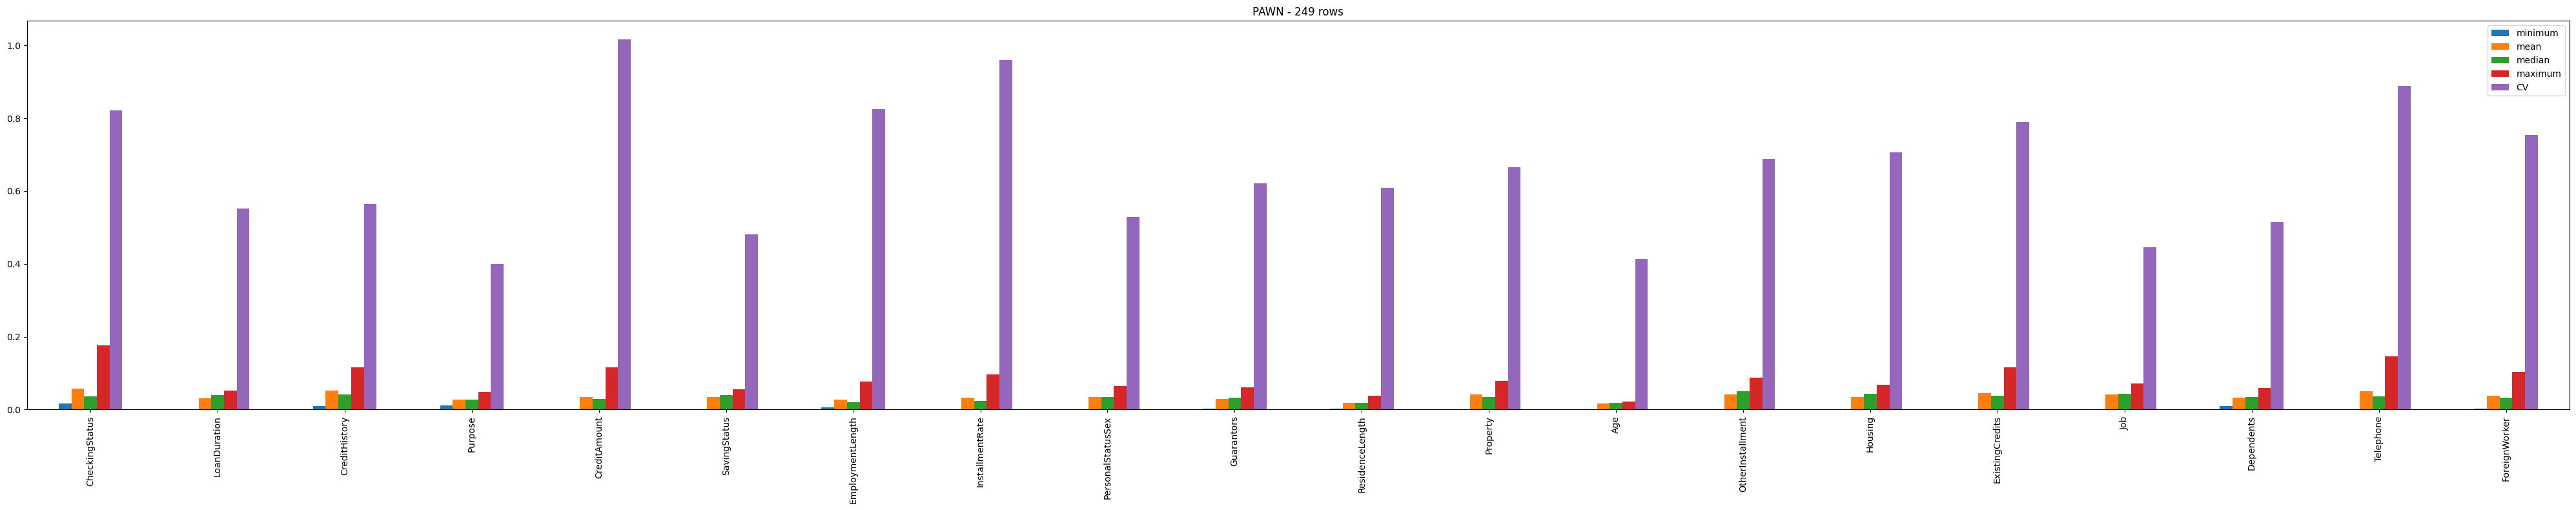

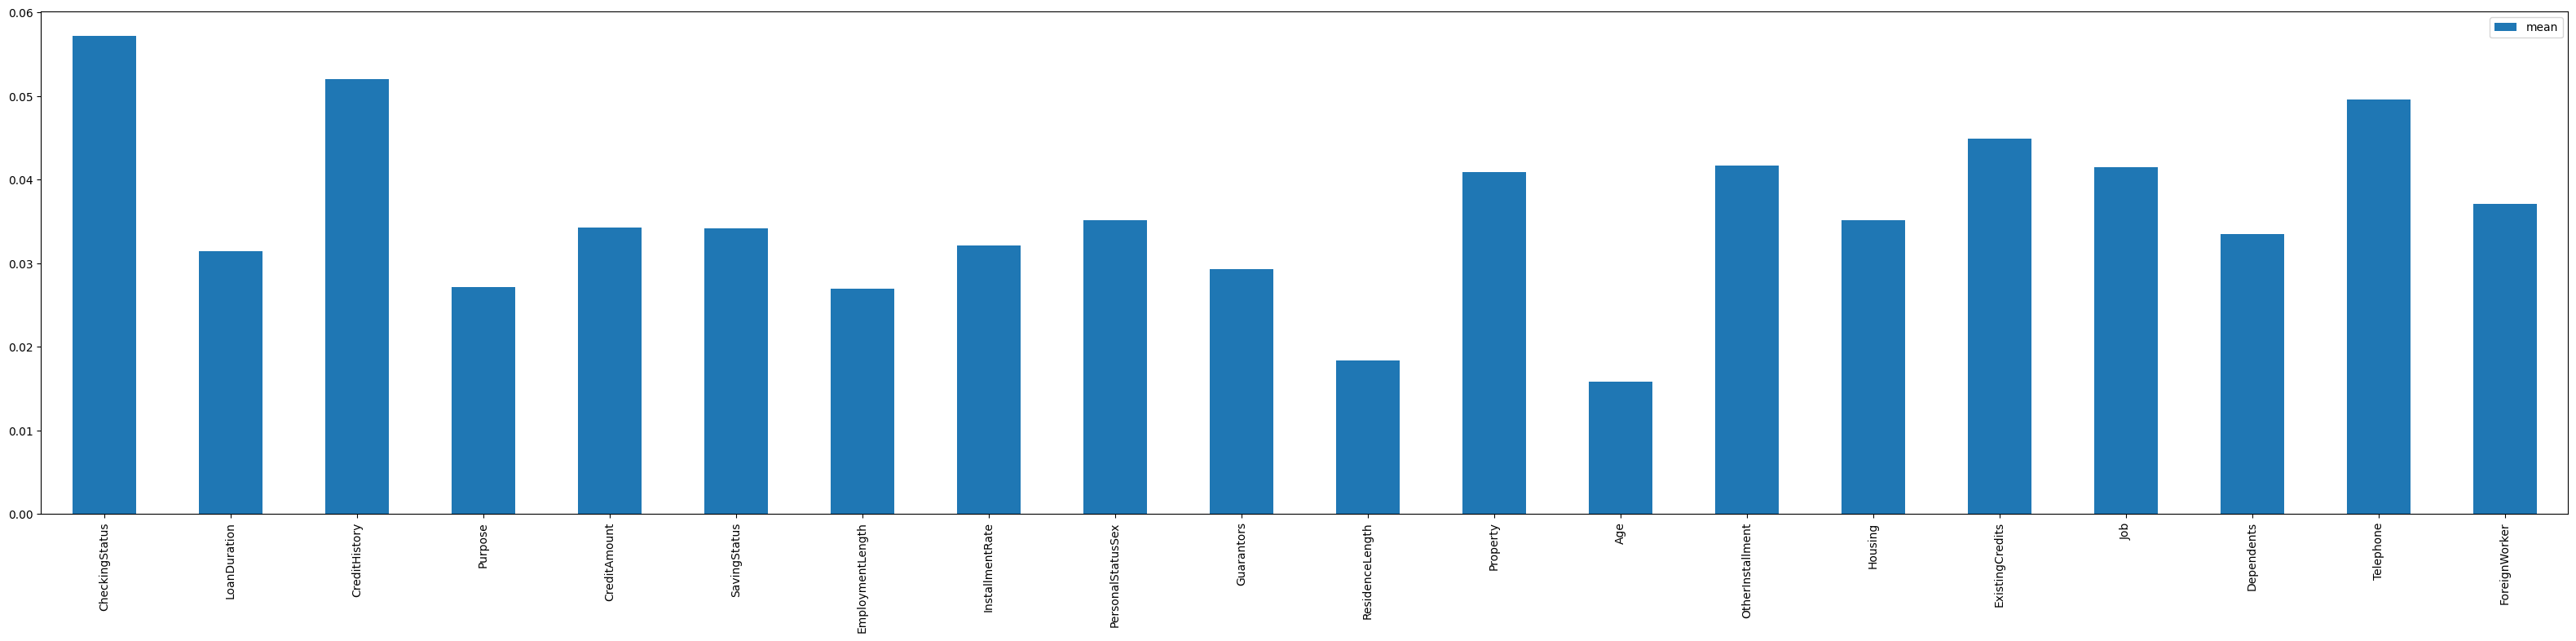

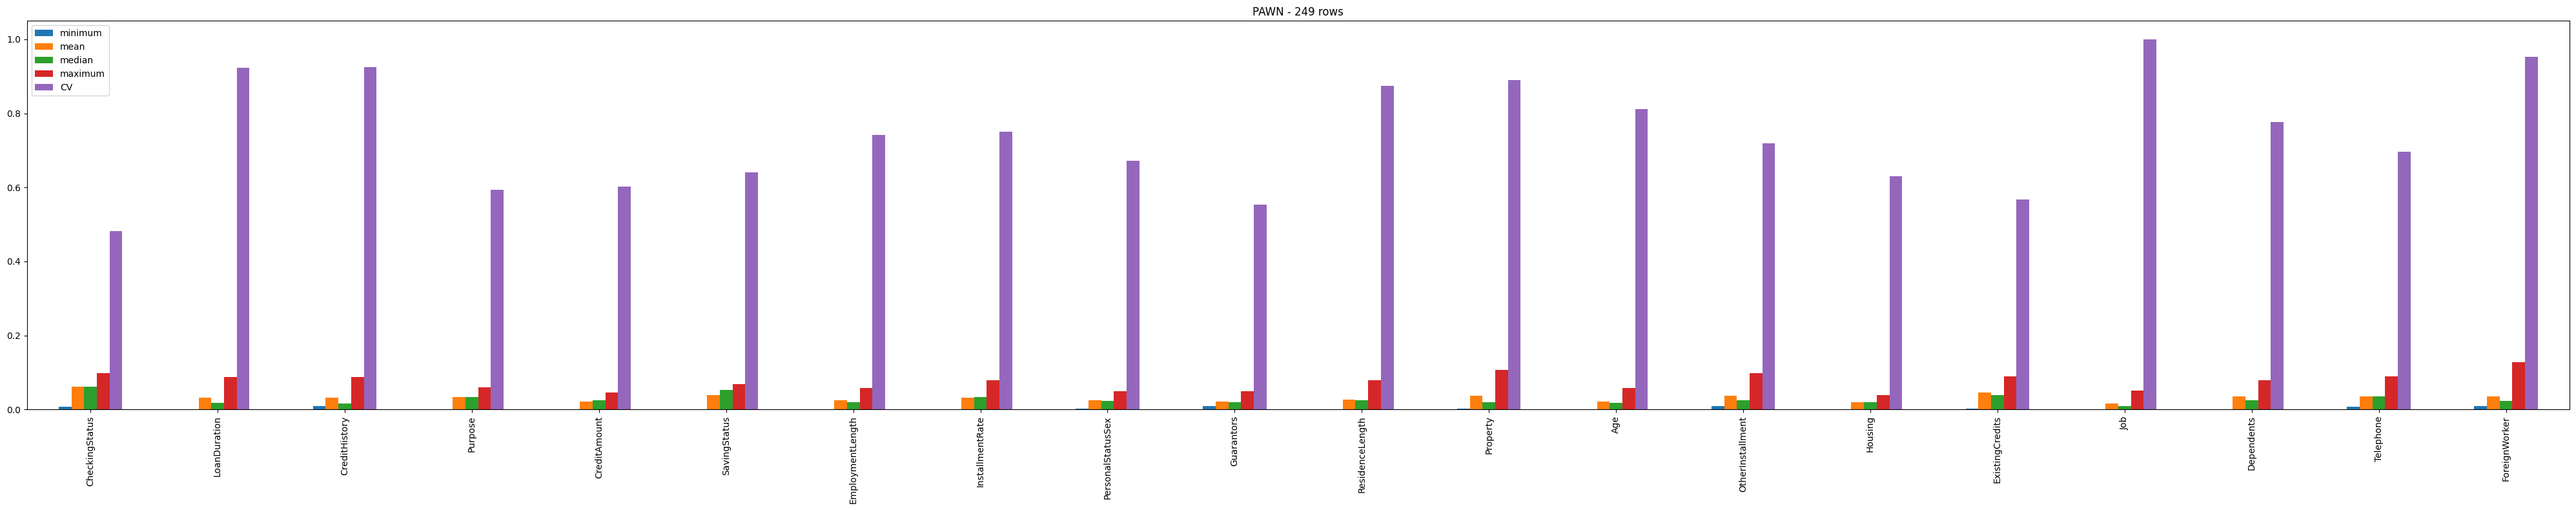

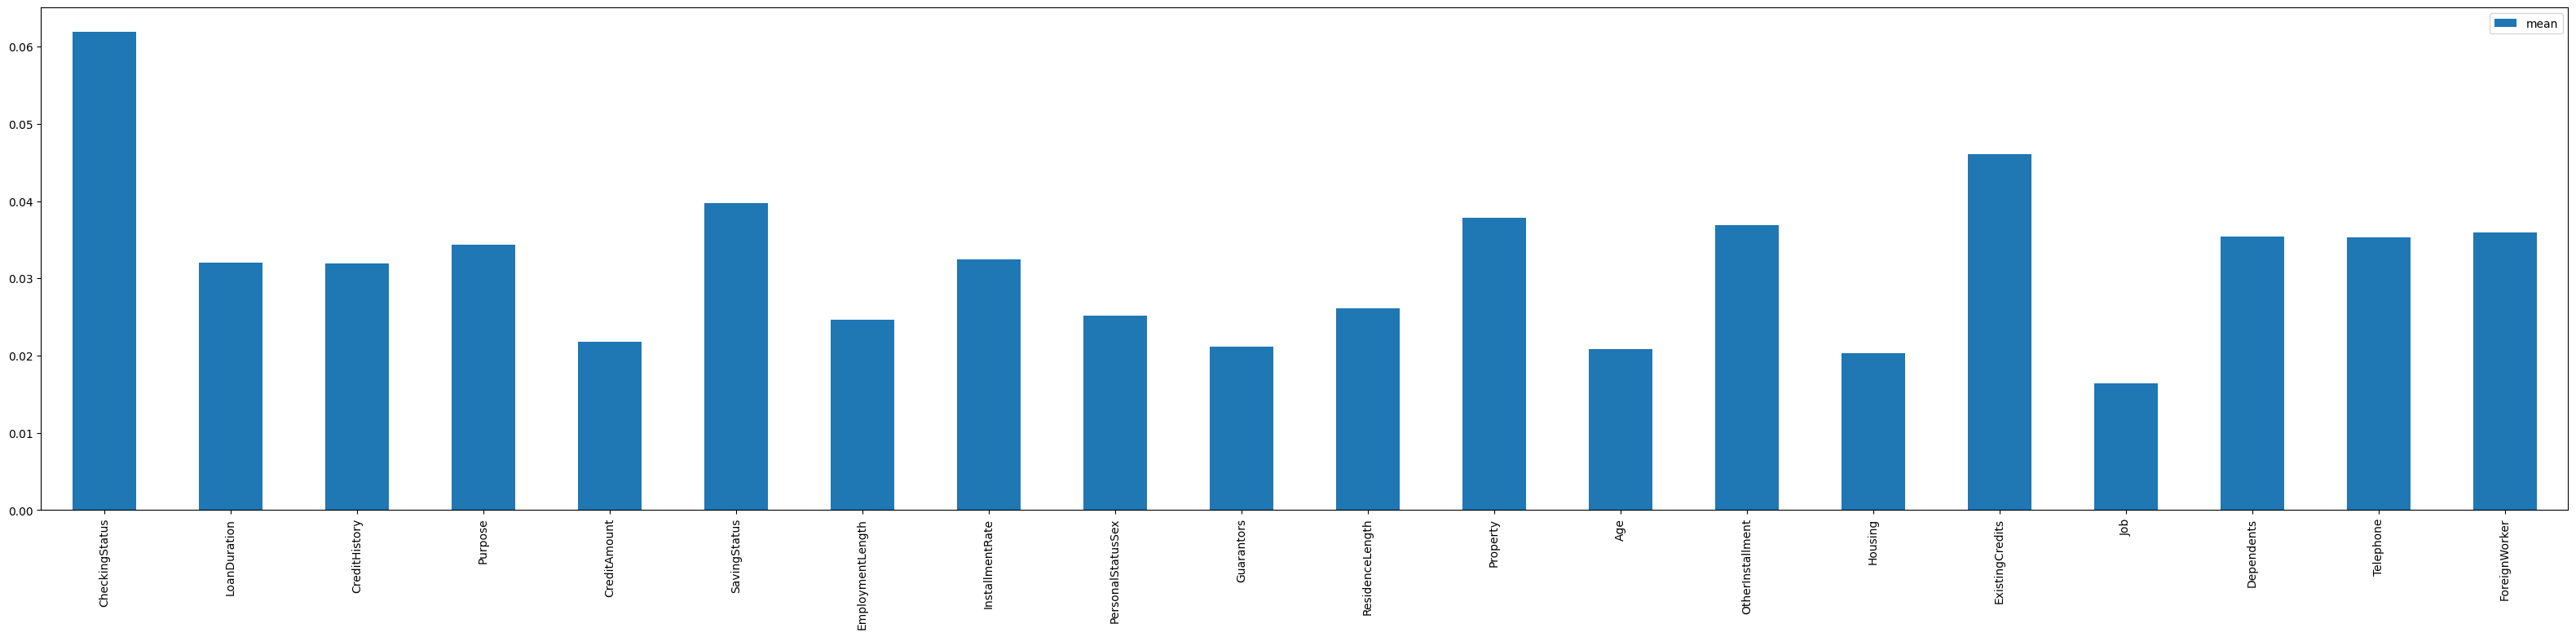

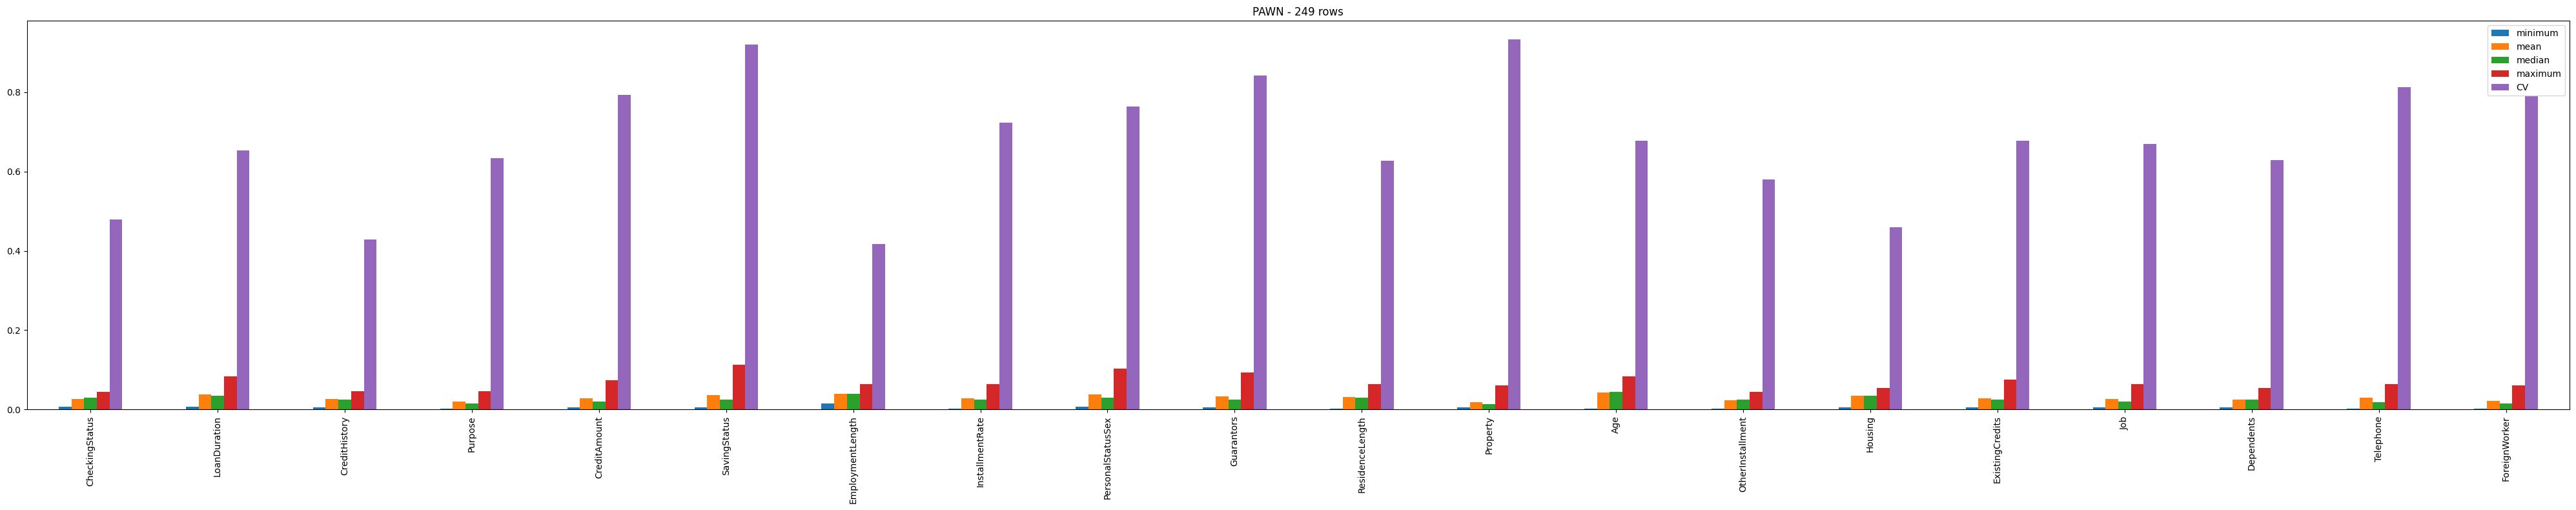

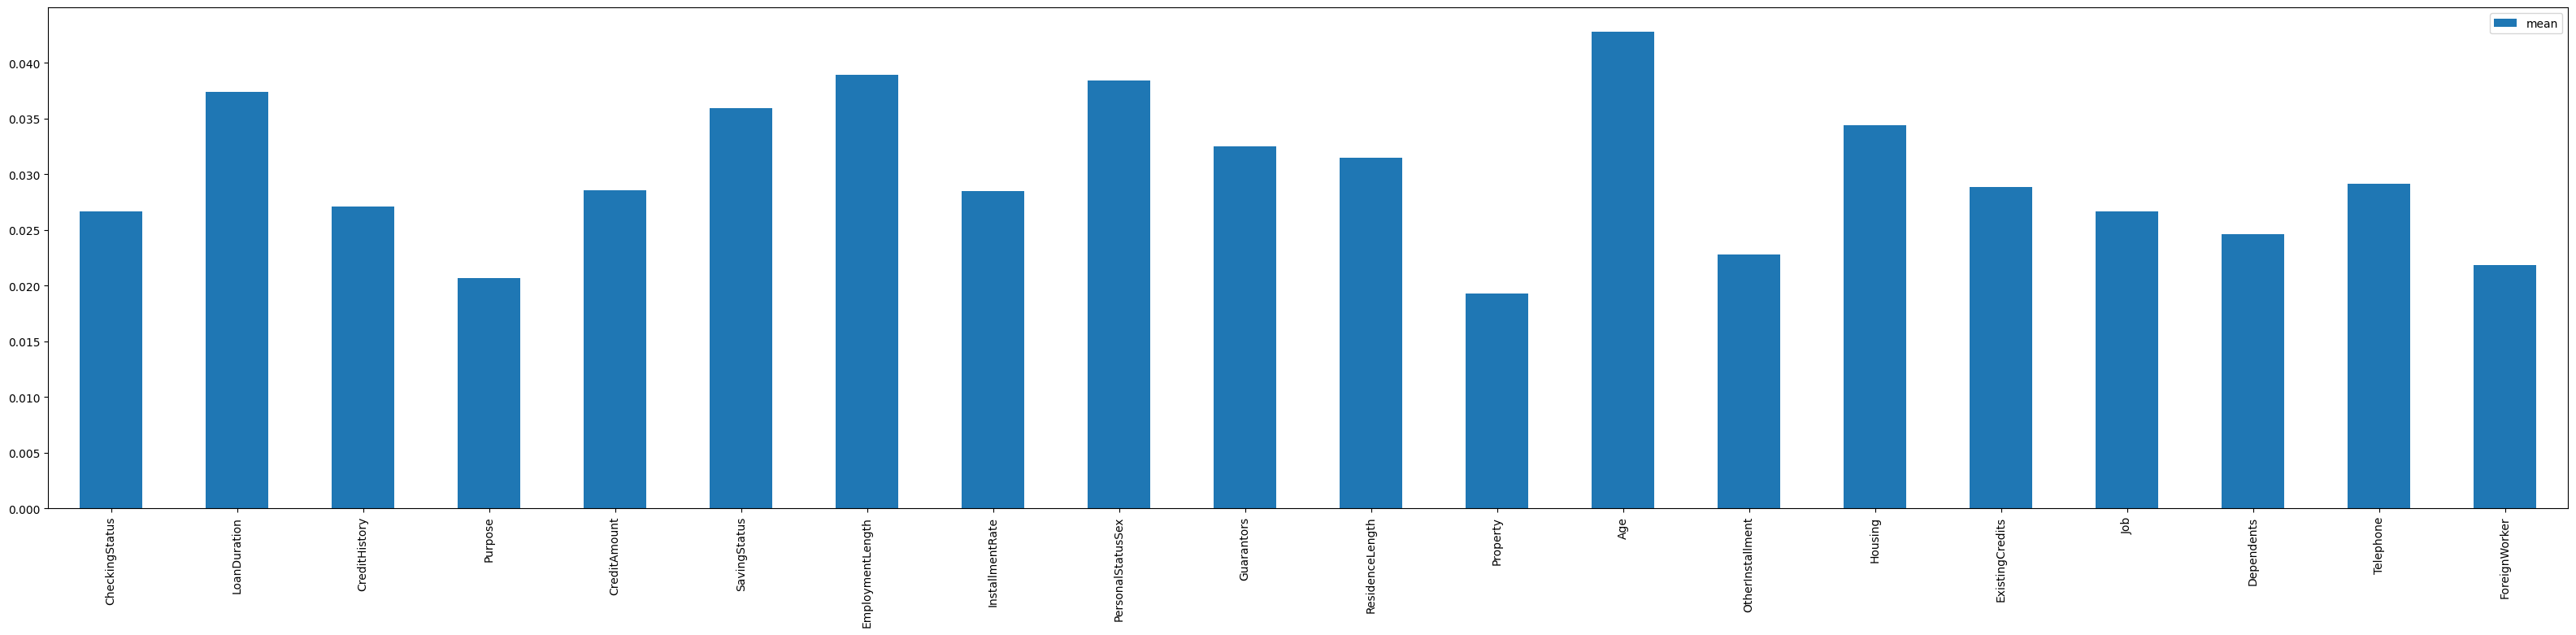

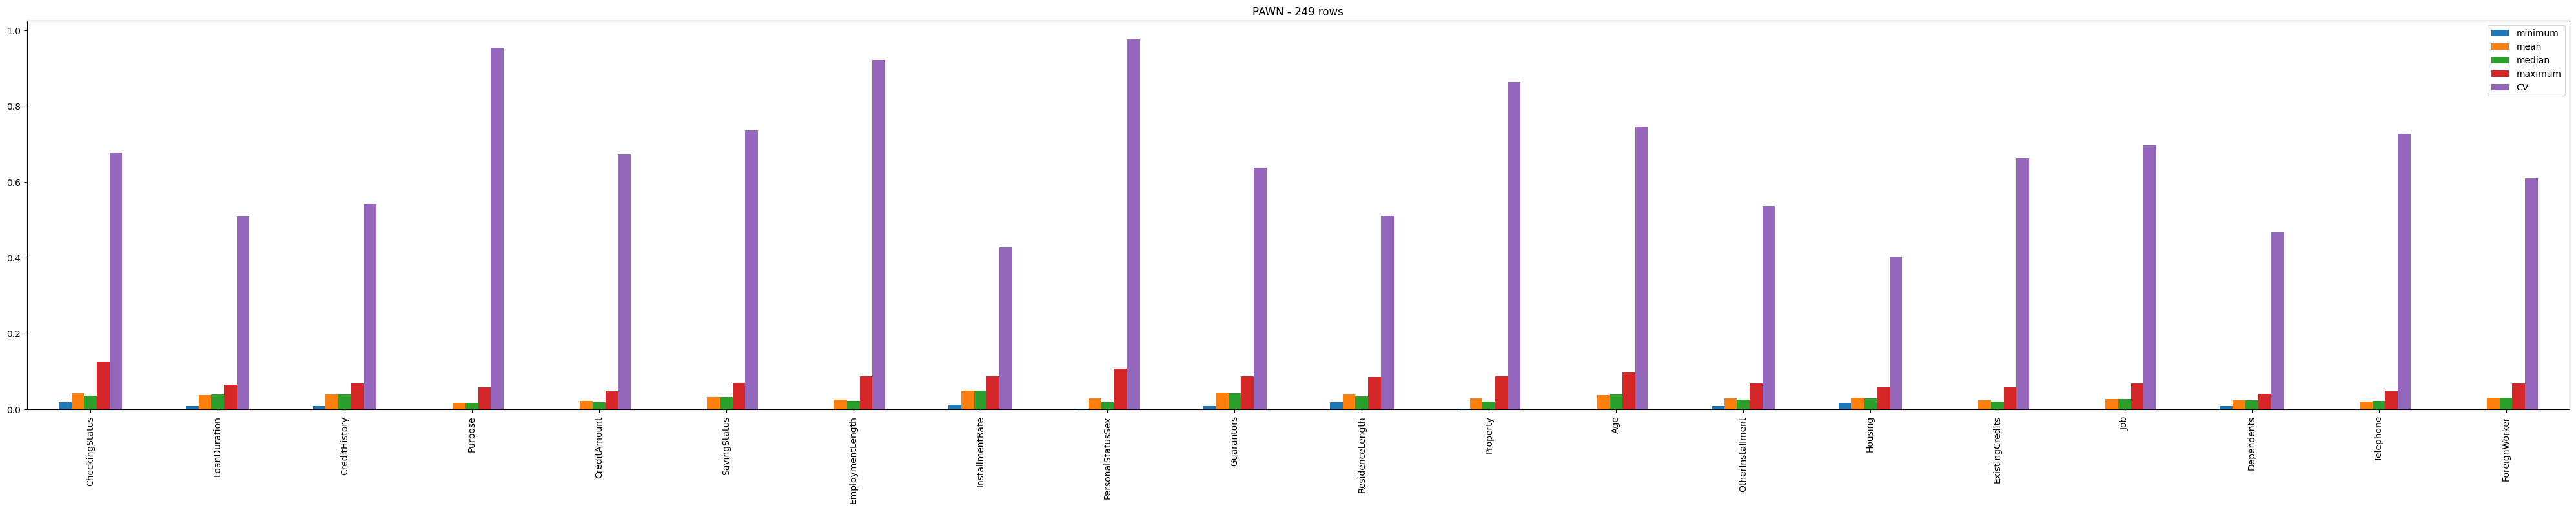

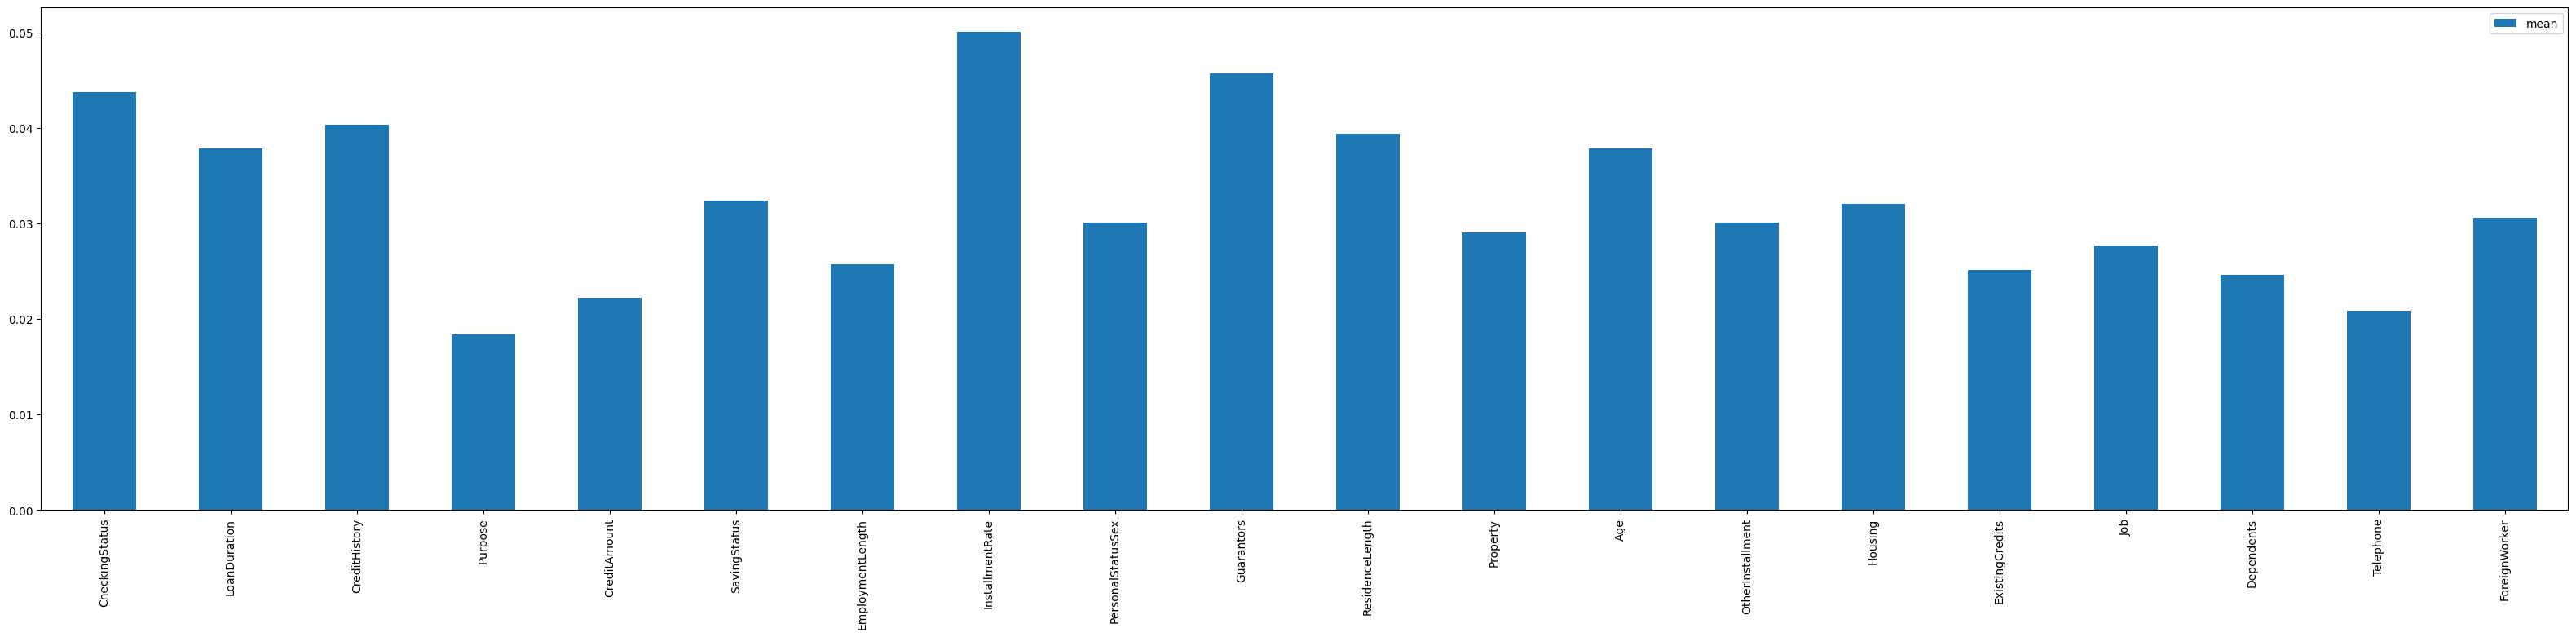

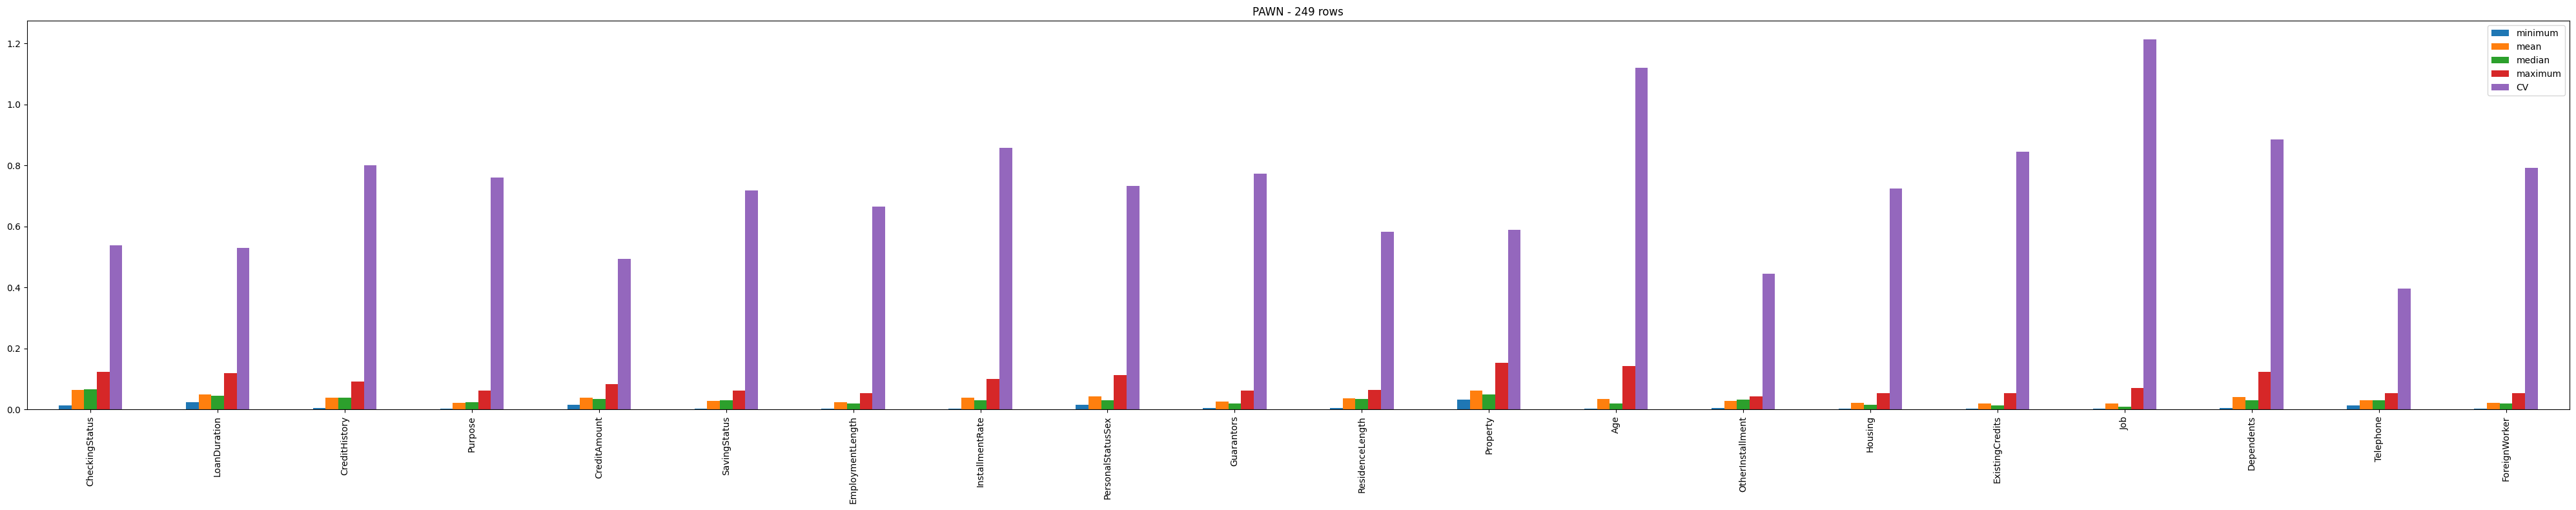

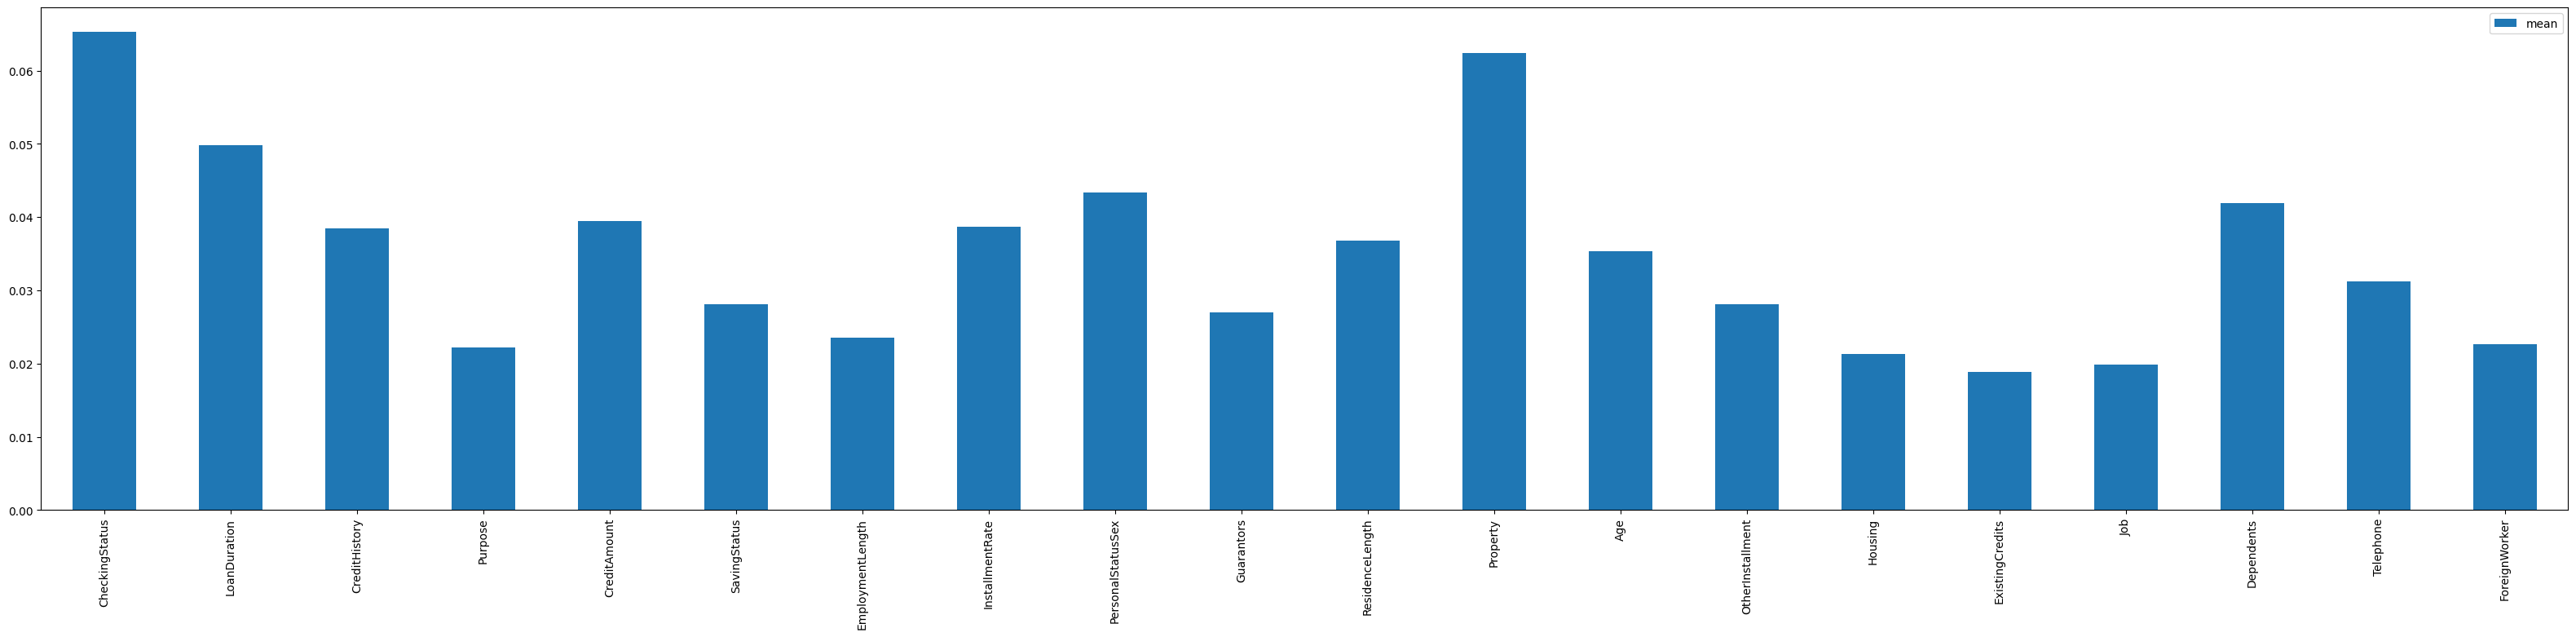

In [26]:
%%timeit
loan_pawn(x_test)

## hihihihi

(20480, 20)
[[ 55.55306328  55.55306328  55.55306328 ...  55.55306328  55.55306328
   55.55306328]
 [117.31673516  56.03939141  56.52571953 ...  56.52571953  57.01204766
   57.49837578]
 [179.08040703  56.52571953  57.49837578 ...  57.49837578  58.47103203
   59.44368828]
 ...
 [118.4495734  116.99058903 115.53160465 ... 115.53160465 114.07262028
   65.38245785]
 [118.93590153 117.96324528 116.99058903 ... 116.99058903 116.01793278
    3.61878597]
 [119.42222965 118.93590153 118.4495734  ... 118.4495734  117.96324528
   58.1448859 ]]
(20480, 20)
[[947.57111031 947.57111031 947.57111031 ... 947.57111031 947.57111031
  947.57111031]
 [699.77228218 945.61993843 943.66876656 ... 943.66876656 941.71759468
  939.76642281]
 [451.97345406 943.66876656 939.76642281 ... 939.76642281 935.86407906
  931.96173531]
 ...
 [451.60722059 457.46073621 463.31425184 ... 463.31425184 469.16776746
  808.84981066]
 [449.65604871 453.55839246 457.46073621 ... 457.46073621 461.36307996
  941.35136121]
 [447.70

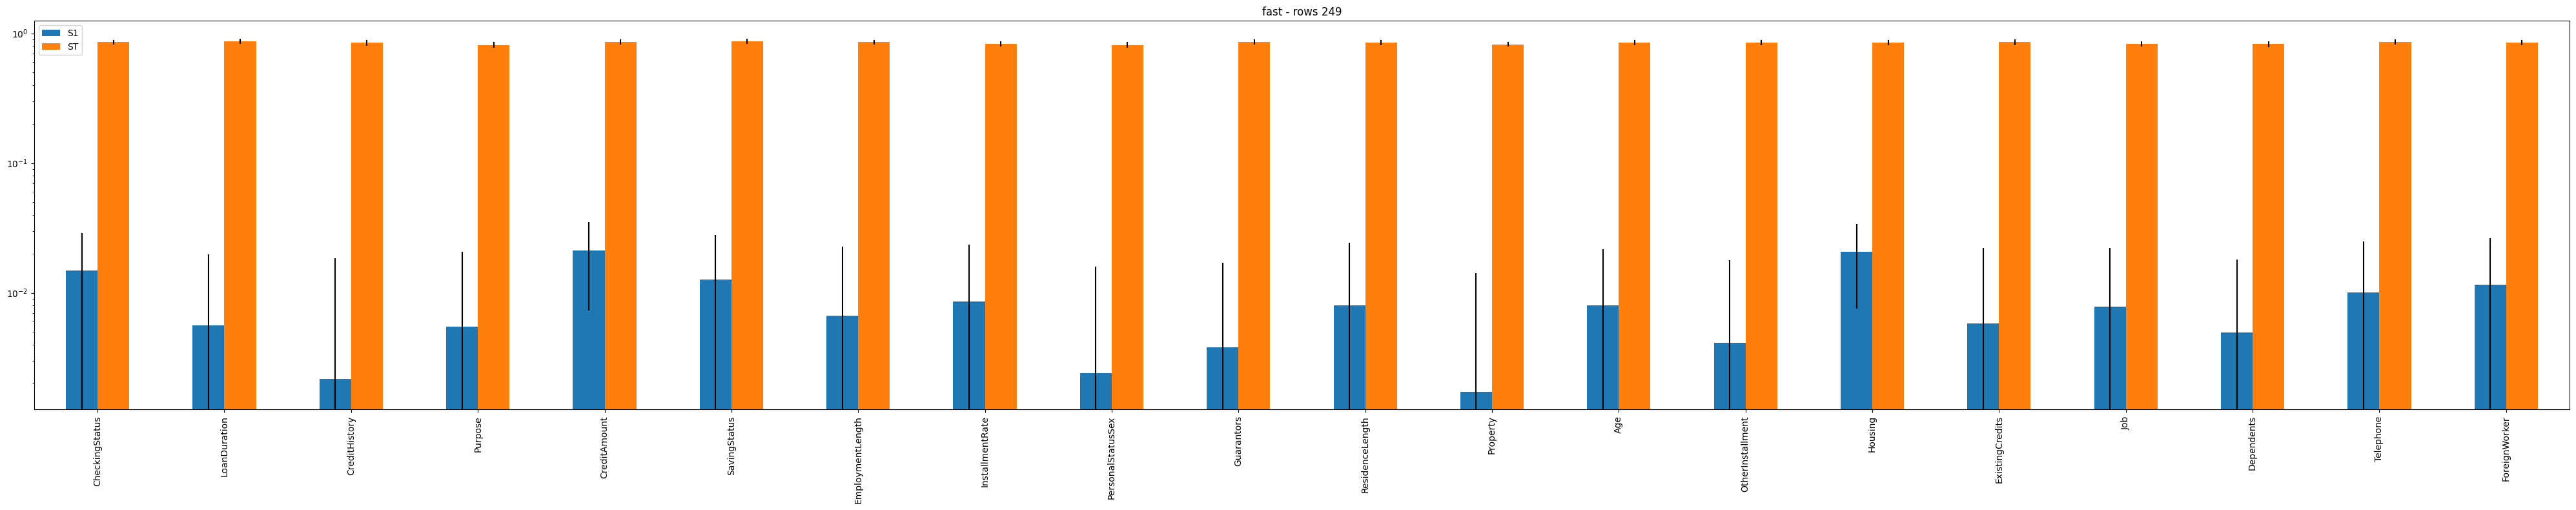

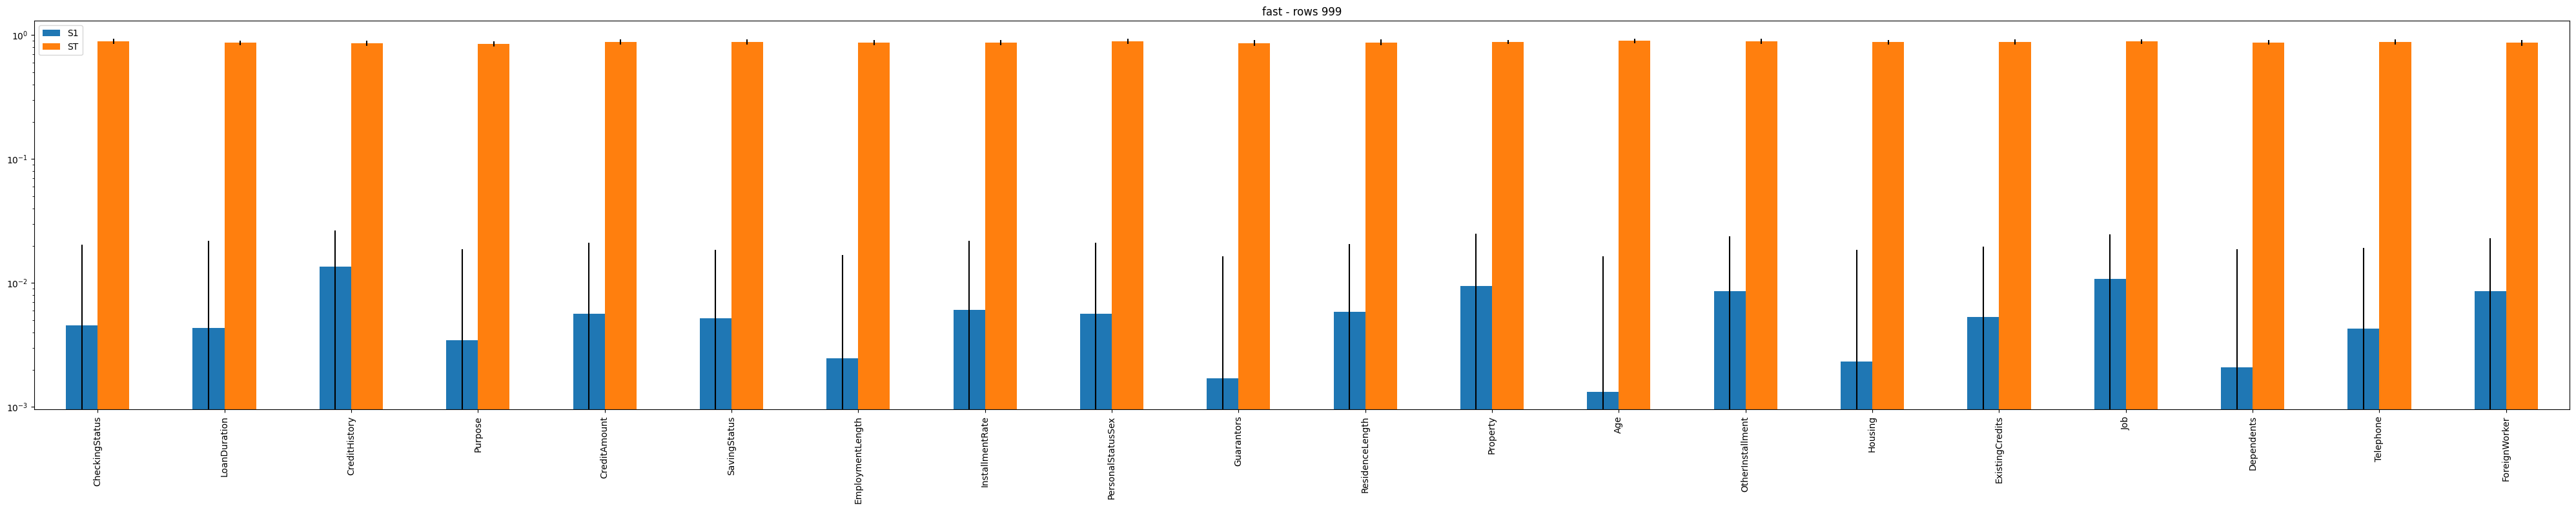

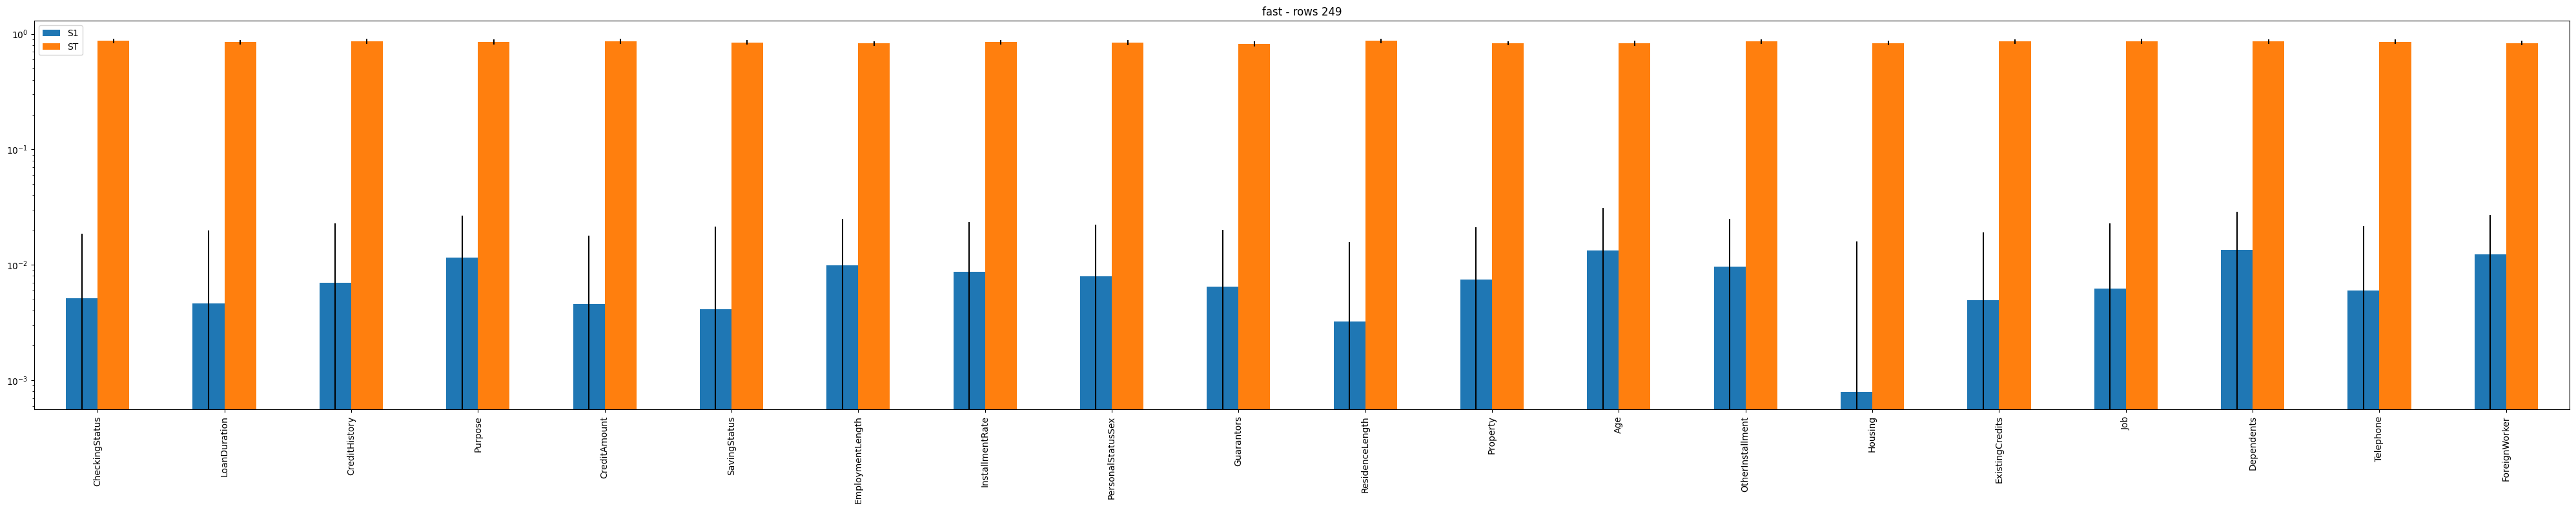

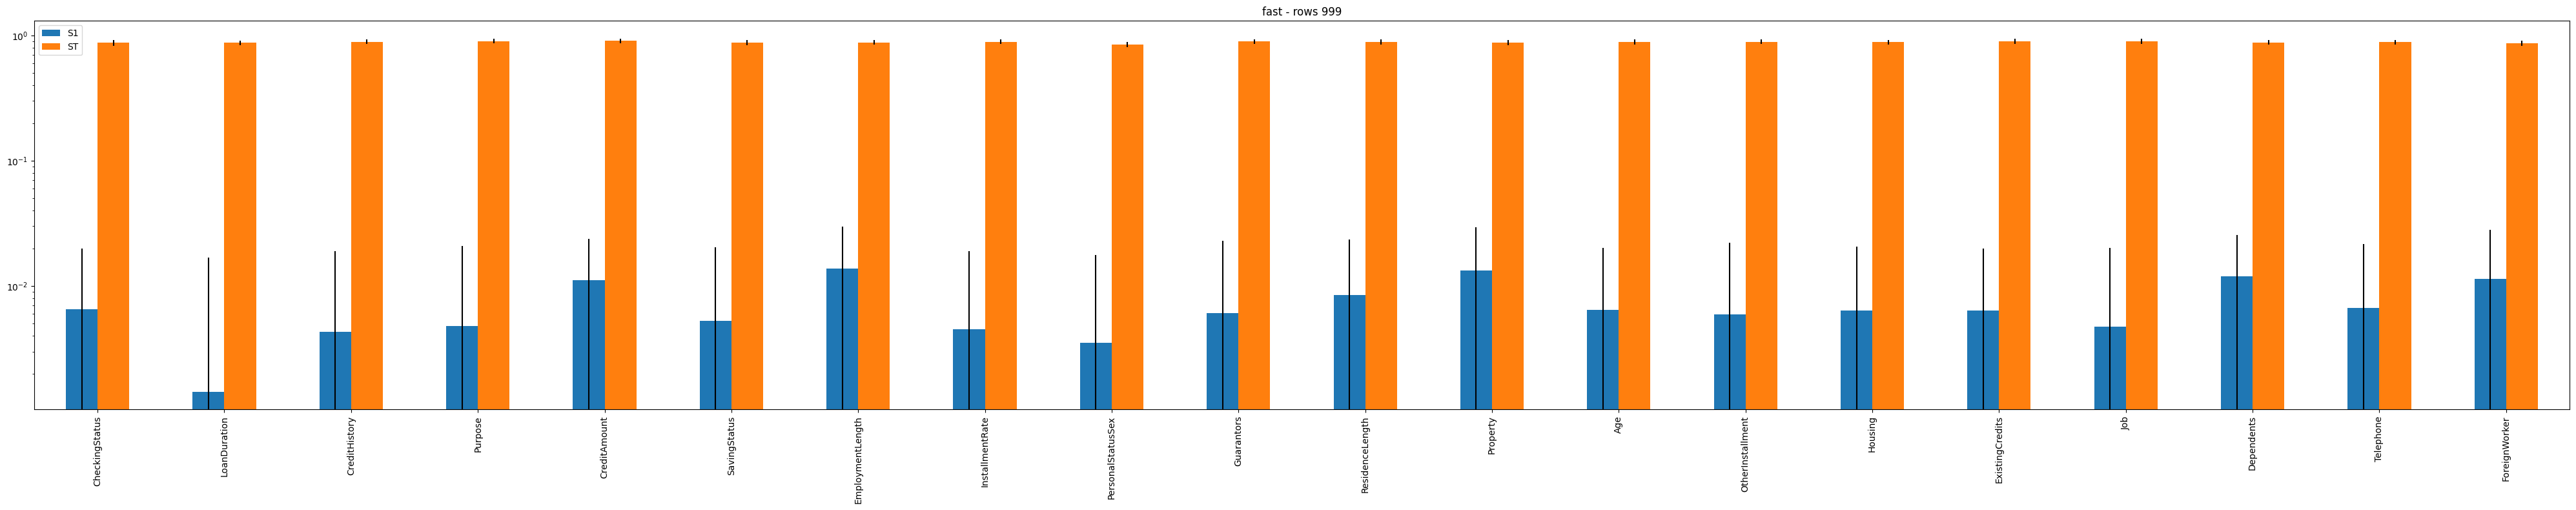

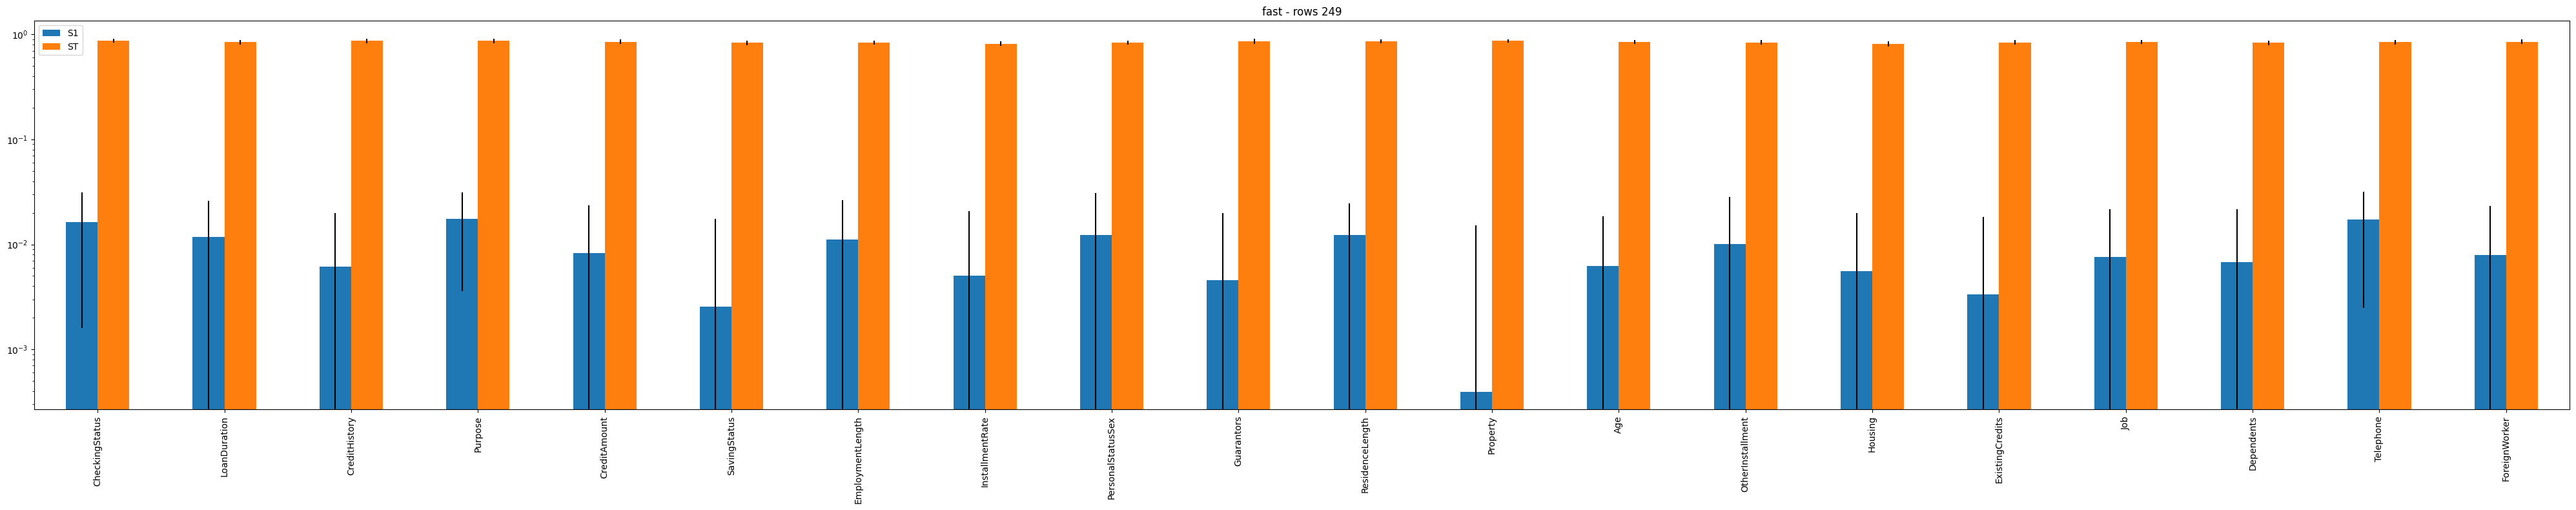

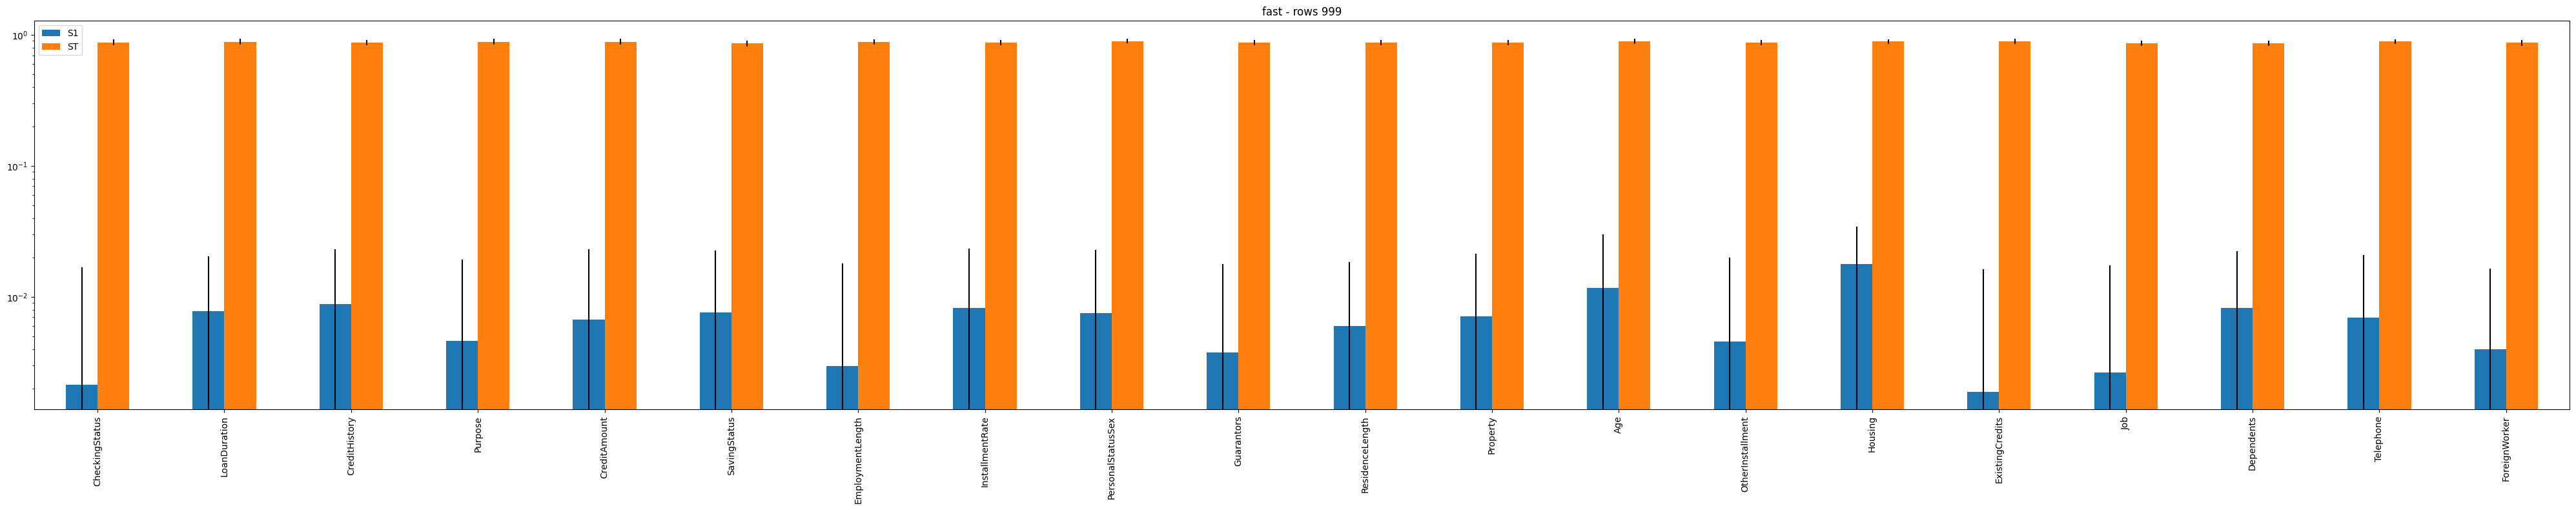

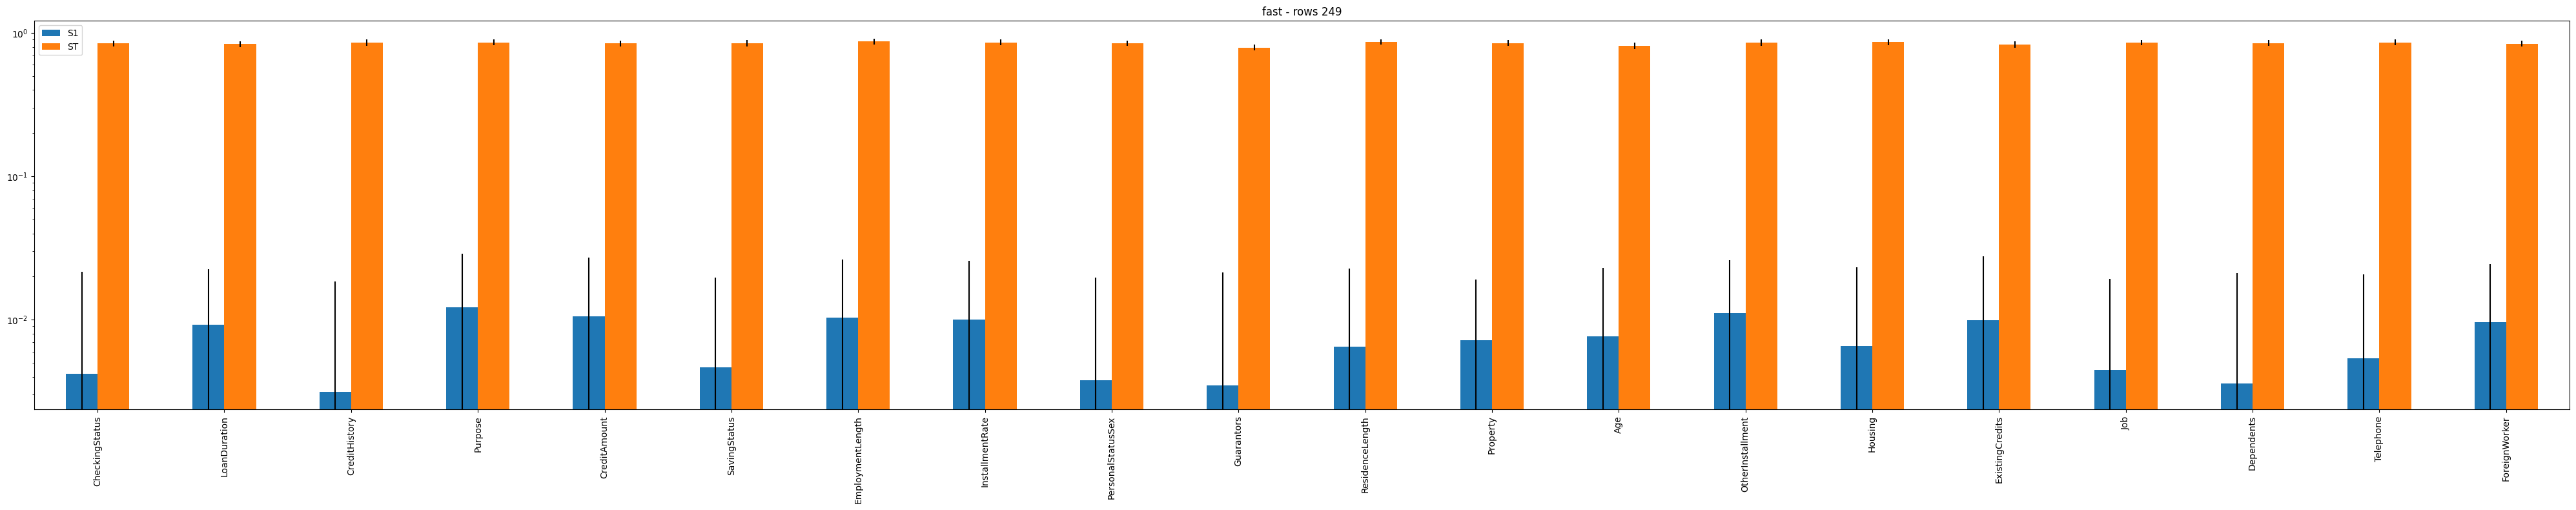

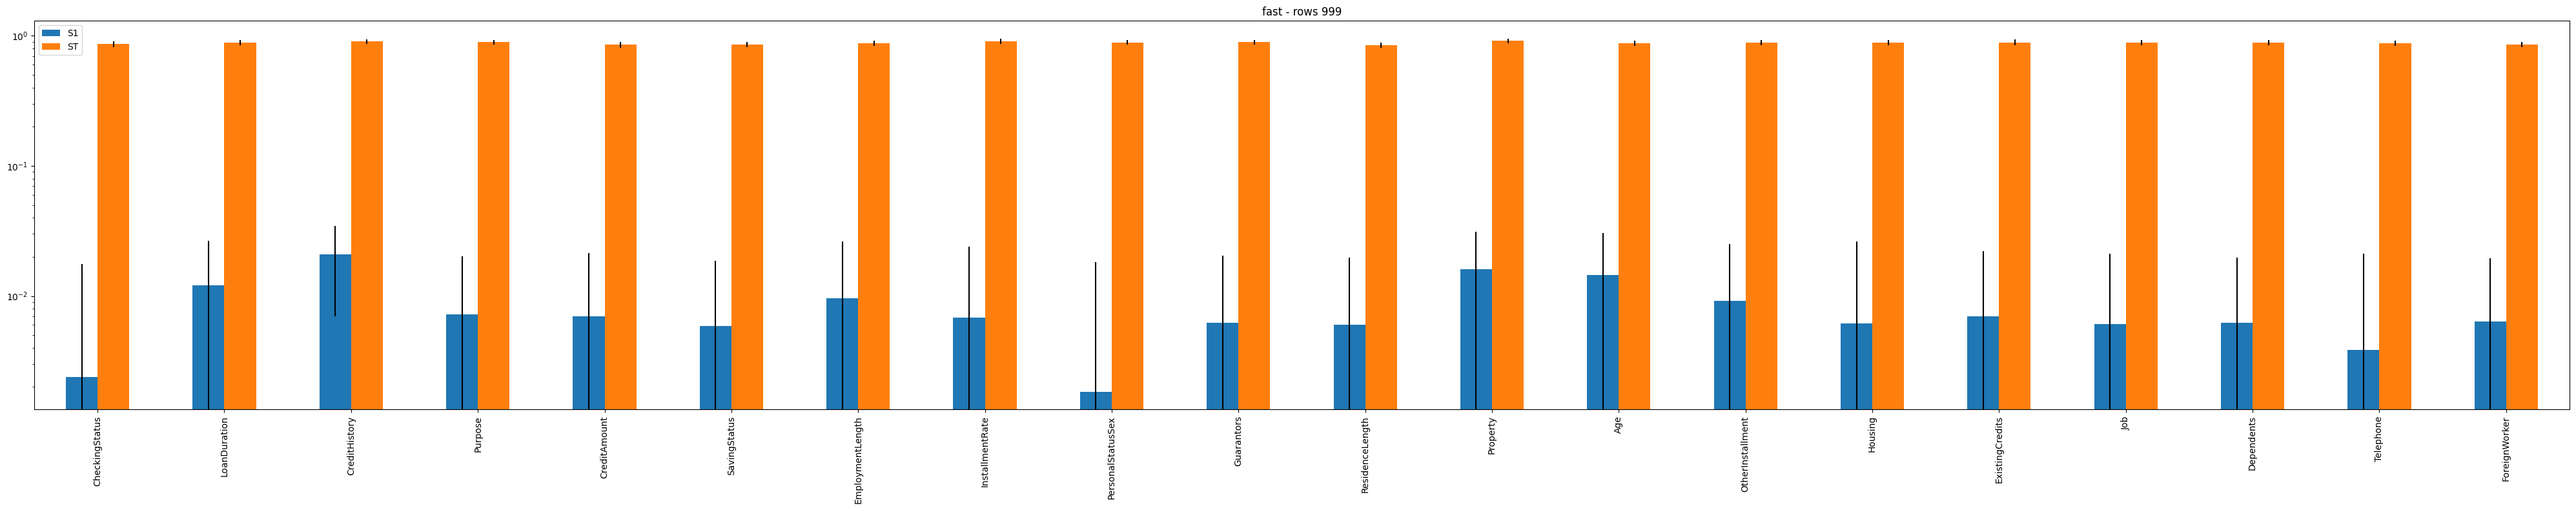

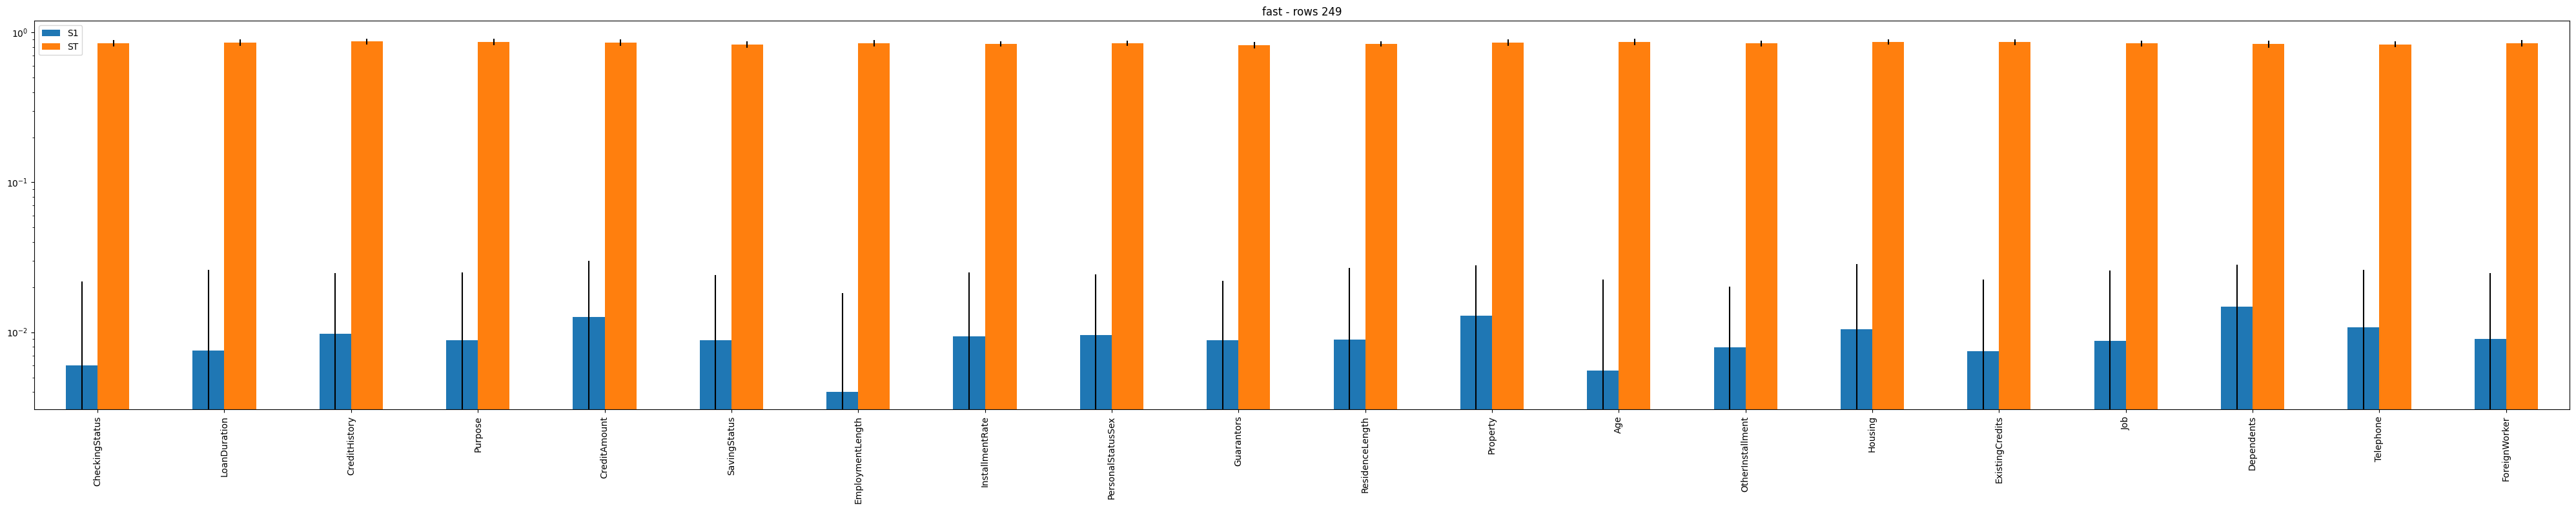

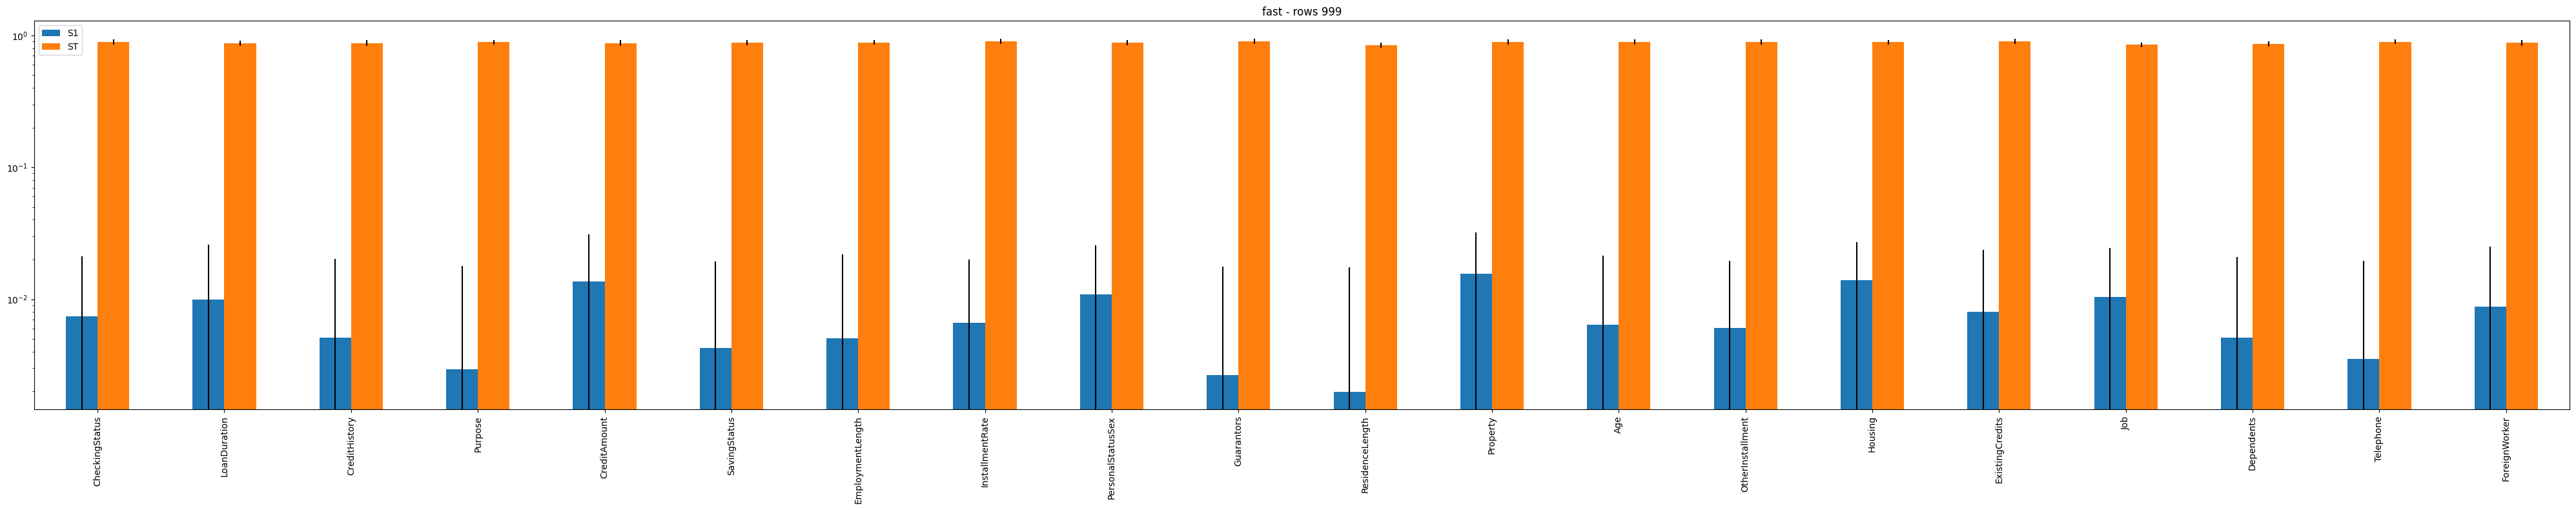

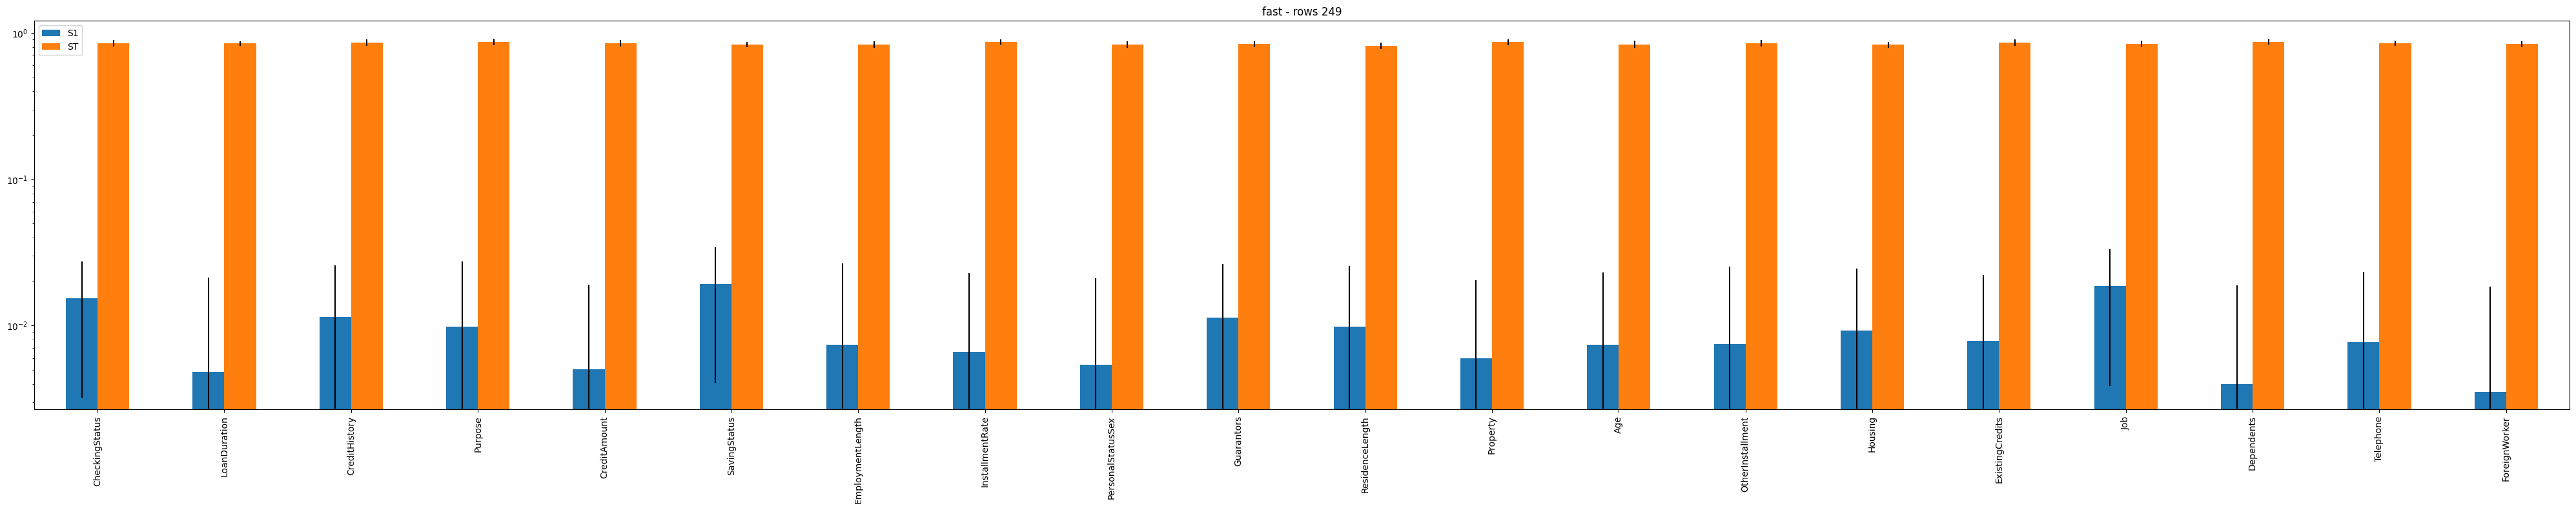

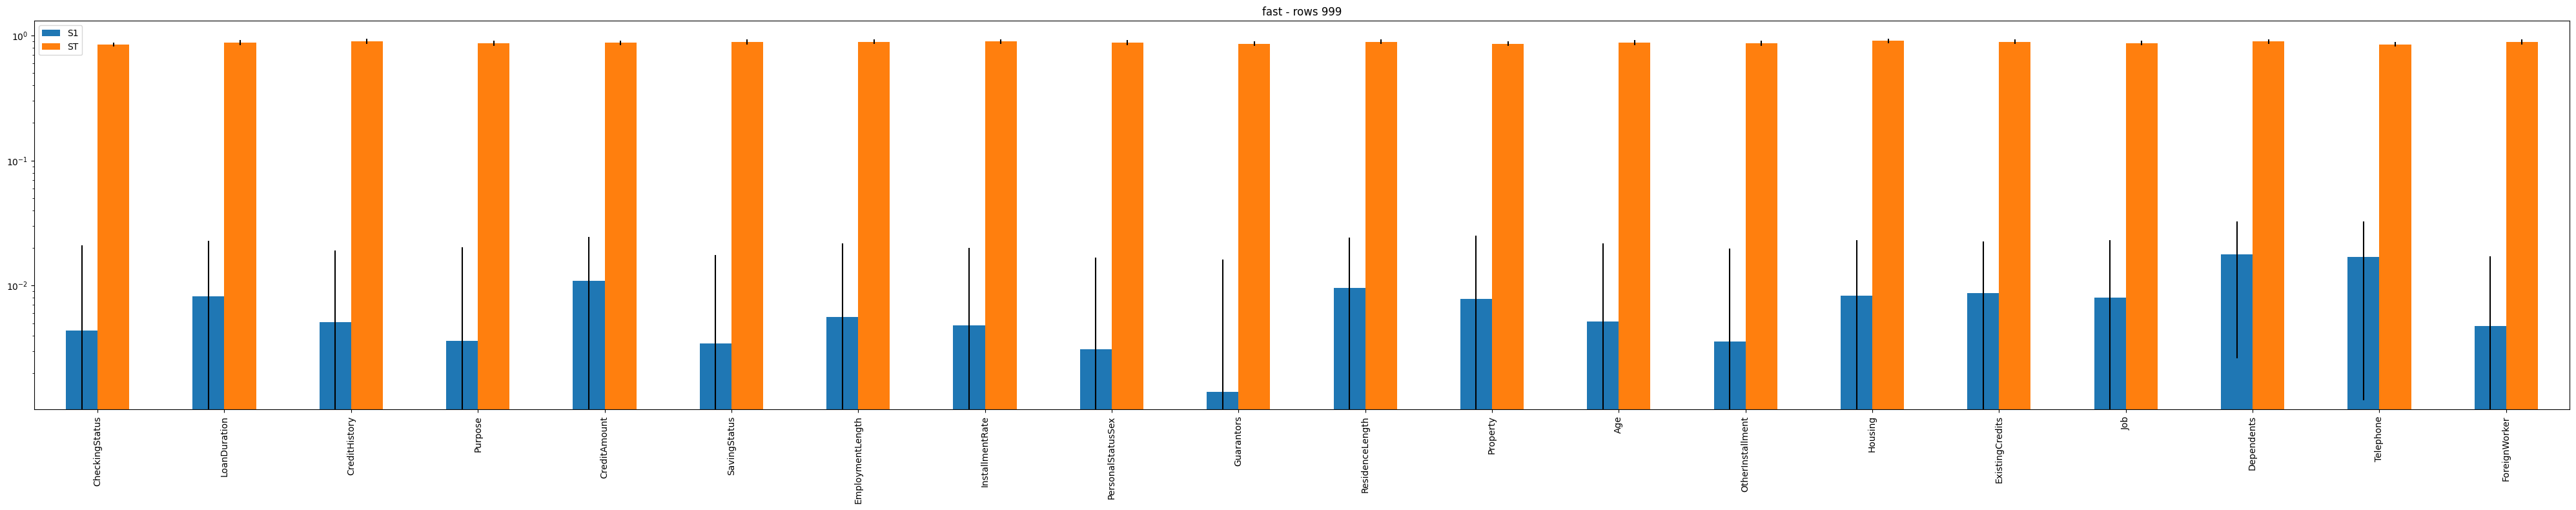

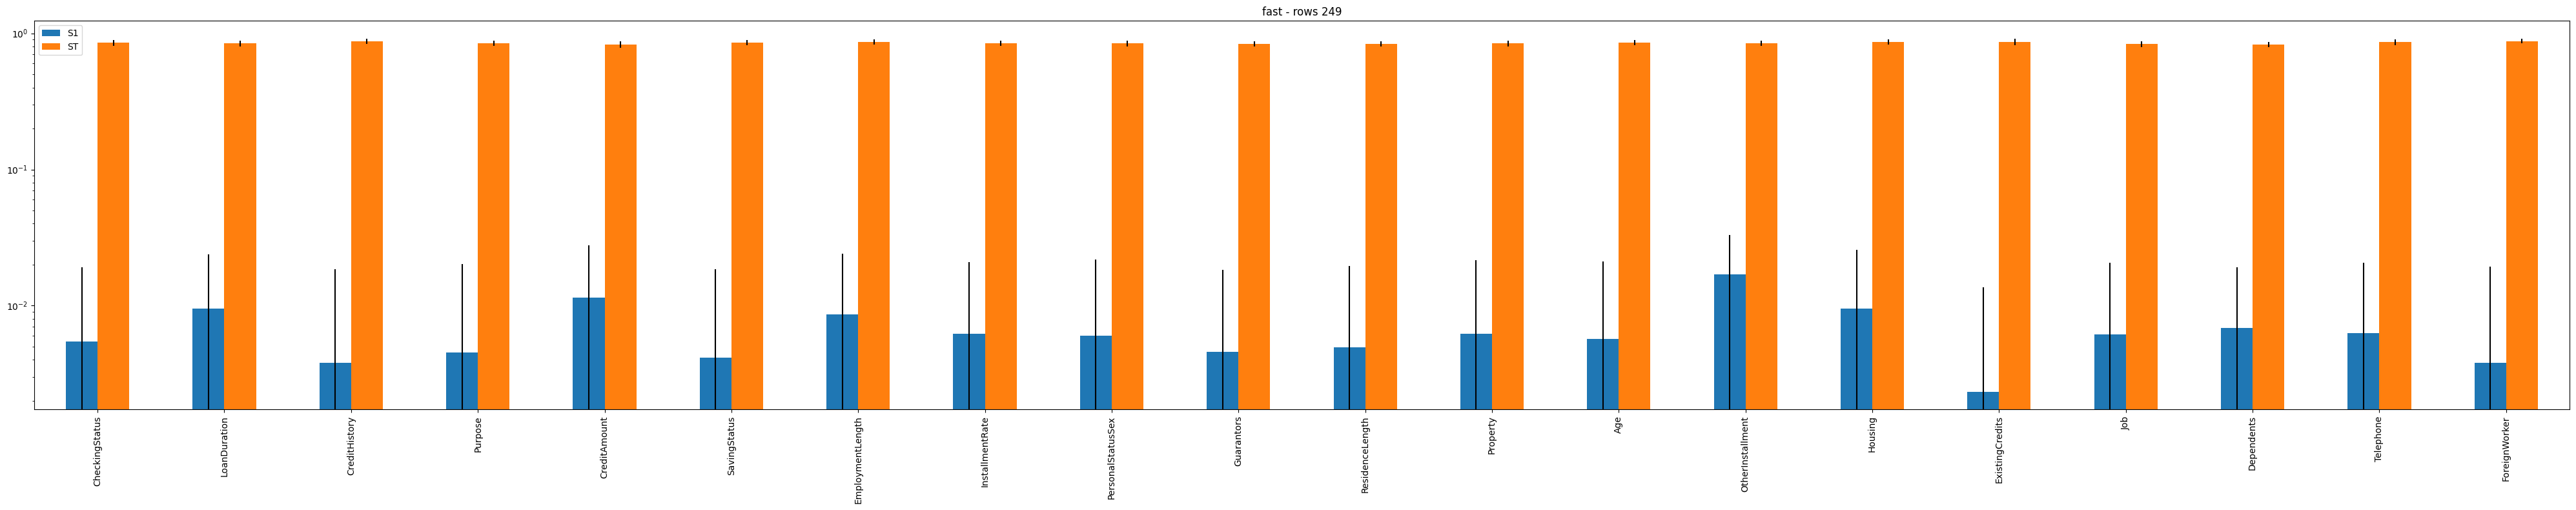

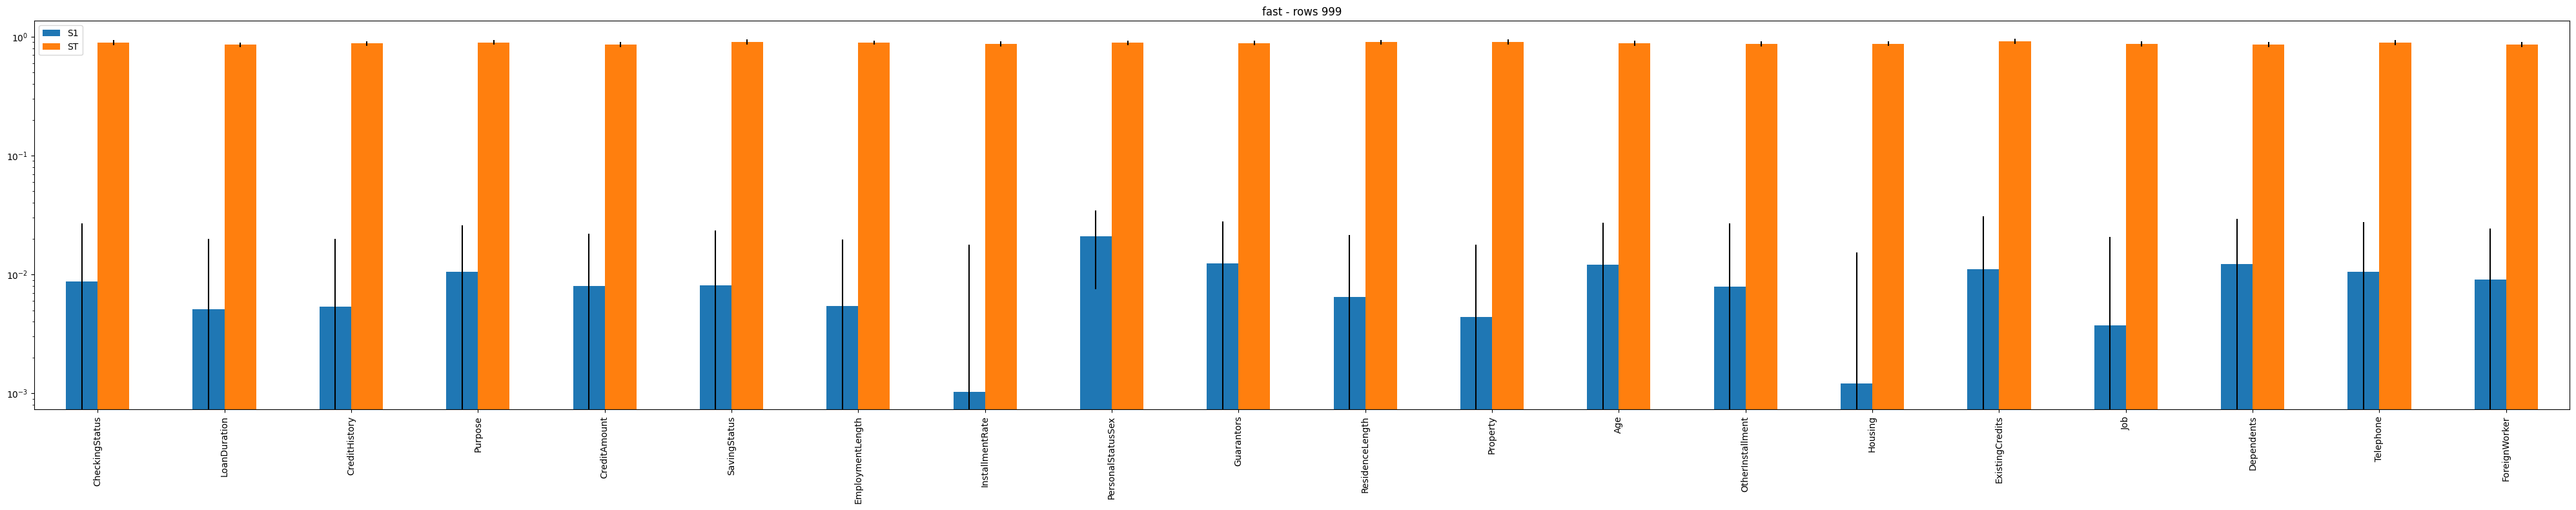

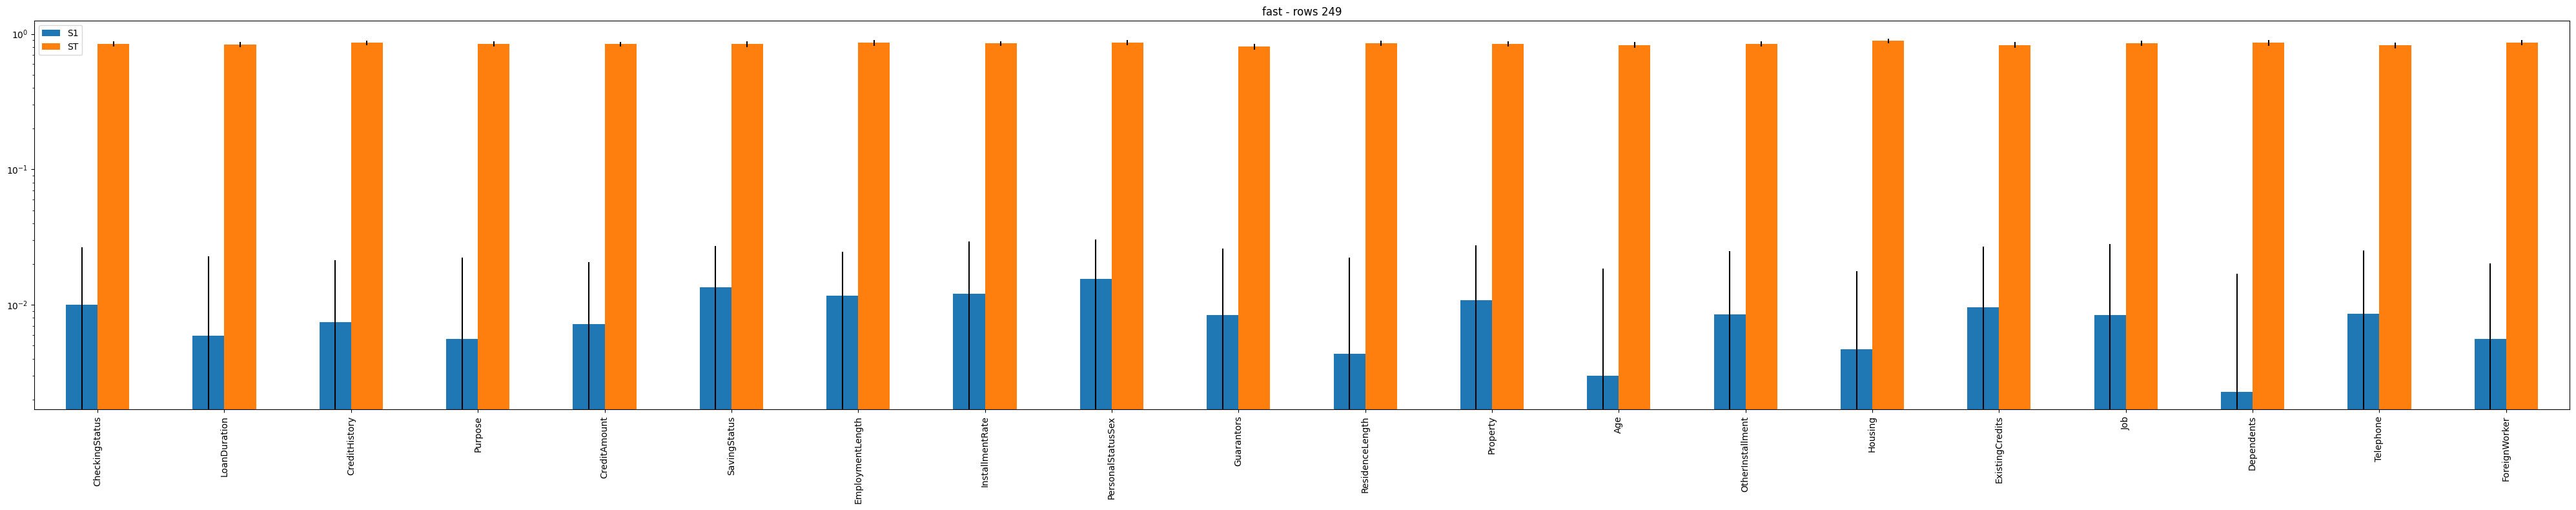

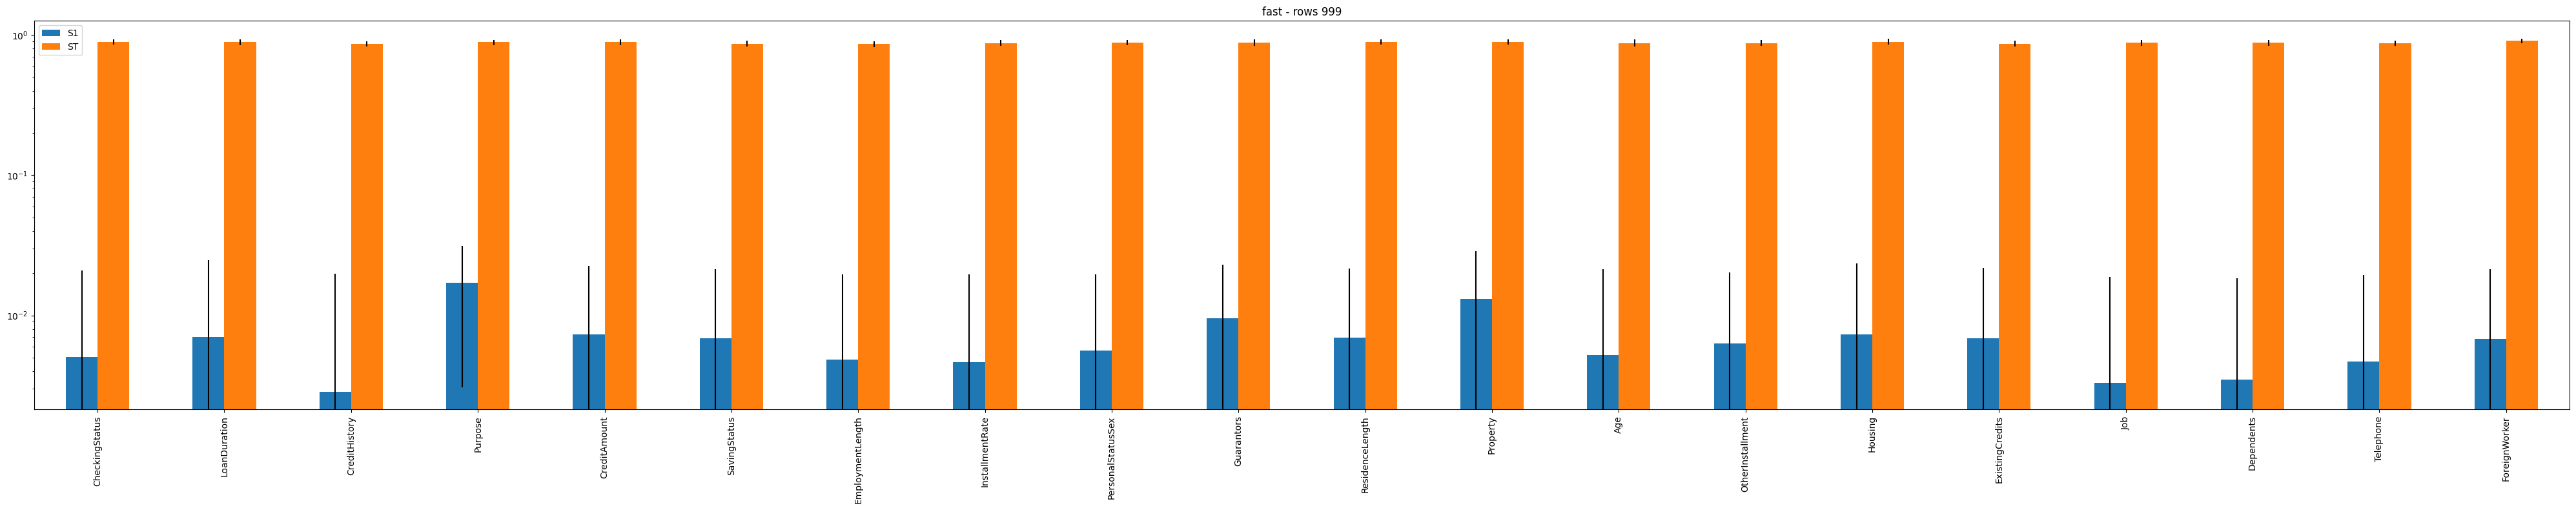

In [75]:
%%timeit
# === SALib functions ===
def loan_fast(loan_data: list):
    loan_rows = len(loan_data) - 1
    sp = ProblemSpec({
        'names': attributes[0:20],
        'bounds': [[0, loan_rows]]*len(attributes[0:20]),
    })

    (sp.sample_fast(1024).evaluate(loan_model, loan_data).analyze_fast())
    print(sp.samples)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 8)
    plt.title(label=f"fast - rows {loan_rows}")
    plt.tight_layout() 

loan_fast(x_test)
loan_fast(credit_training_features)

In [21]:
# === SALib functions ===
def loan_rbd_fast(loan_data: list):
    loan_rows = len(loan_data) - 1
    sp = ProblemSpec({
        'names': attributes[0:20],
        'bounds': [[0, loan_rows]]*len(attributes[0:20]),
    })

    (sp.sample_latin(1024).evaluate(loan_model, loan_data).analyze_rbd_fast())
    print(sp.samples)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 8)
    plt.title(label=f"rbd-fast - rows {loan_rows}")
    plt.tight_layout() 


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


input shape:  (1024, 20)
[[102.19800177 207.24638617  18.89517988 ... 140.2304825  246.8874041
  182.67313308]
 [191.56561356  78.50554238  37.09996071 ...  65.92255785 168.16499322
   29.20495248]
 [ 59.87547841 219.47774324 161.38263884 ...  48.5208503  148.95800703
  237.61970463]
 ...
 [243.80412542 230.85144652 174.72078623 ...  12.4859316  159.89124732
   82.2270141 ]
 [235.46671058  17.22405804  89.93910223 ...  62.87473291 149.09657946
  143.88988307]
 [222.75133133 224.40238521  42.38363575 ...  47.05924072  61.51303418
  176.04578285]]
input shape:  (1024, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


[[1.58187974e+02 1.18500582e+02 1.71332651e+02 ... 1.84384565e+00
  8.48581347e+00 1.58830450e+02]
 [4.39348256e+01 1.43118890e+02 2.39865447e+02 ... 5.92952244e+01
  2.34226474e+02 8.49247912e+01]
 [1.34539423e+02 5.71777349e+01 1.67478797e+02 ... 2.11510200e+02
  1.03007211e+02 1.38234343e+02]
 ...
 [1.89145788e-01 2.16156317e+01 5.77209767e+01 ... 1.91067677e+02
  1.38320640e+01 1.87324768e+02]
 [3.85310719e+01 6.52625354e+01 2.43662539e+01 ... 1.35369990e+02
  9.67170652e+01 2.27852721e+02]
 [1.80187697e+02 3.07273674e+01 1.20669147e+02 ... 1.34355552e+02
  8.17946283e+01 5.76637643e+00]]
input shape:  (1024, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


[[109.47704481 184.49312151  42.56623158 ... 191.10148095  68.96918046
   18.28179957]
 [ 71.22936787  29.53428772  65.62361581 ... 201.66491751 105.69247262
   43.74792207]
 [149.95206012   1.84838246  77.06030393 ... 194.83839734 135.27559862
  210.2116865 ]
 ...
 [140.52428408 138.67483666  67.43126154 ...  31.94640021  59.97297921
  173.77766776]
 [ 95.40873069  34.79010385  57.15452768 ... 209.77287996  80.26649226
  128.90916765]
 [ 35.5742313   55.65027152 240.27122577 ... 139.41901693 111.29142321
  134.16385259]]
input shape:  (1024, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


[[213.36723915  84.74424245 240.50988365 ... 214.13344792 176.5189844
   71.1546493 ]
 [ 44.98969987 197.40512821 141.94220123 ... 118.14974788  35.40758315
  207.96256049]
 [ 28.21186868 177.94917416  68.47603438 ... 214.87397924  73.68304969
  176.00489405]
 ...
 [ 44.44640645 107.15274787  39.60260167 ... 194.52526742 210.7705702
  232.71195394]
 [187.69228062  58.41641555  98.01934277 ...  19.72569778  83.26501089
  147.91332389]
 [127.29828626 246.22180614 154.760407   ...  26.331103   238.83342209
  182.63702099]]
input shape:  (1024, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


[[ 27.88282858  22.02731336  74.19035306 ... 135.60534173  19.03273363
  236.99520204]
 [ 89.13187723  18.23240713 159.11734245 ... 174.65037756  99.3035932
  130.42060872]
 [160.97899848 156.71829491 196.13678767 ... 160.3659705  173.0308425
  200.0700968 ]
 ...
 [220.66156339  46.09571043  55.64966745 ... 116.40189526 226.29672909
   16.49695664]
 [140.70150666 247.90133719 235.19898388 ...  16.07825985 183.56585009
   37.22353115]
 [ 46.37705067 194.06034078 208.80970628 ... 141.63768761 159.65062343
  206.40304668]]
input shape:  (1024, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


[[ 37.94039298 104.58249949   2.34630191 ... 226.72814308 224.05897021
   21.17799847]
 [  1.35516612 147.27314635  43.06799577 ...  75.57704159 185.43981739
  149.3870667 ]
 [112.28543575  67.86305302 149.36293314 ... 224.77018726 202.61932053
   79.34055559]
 ...
 [228.22909828 174.5306338   30.22304099 ... 103.71750261 100.81886461
   61.92332105]
 [ 51.79876068 243.83835461 105.92692056 ...  78.08970357 106.52688288
  190.31168998]
 [180.14124966 245.85419922  88.13513028 ... 218.38465623  80.46351663
  222.93654057]]
input shape:  (1024, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


[[  4.99257341  44.68007741  40.34002296 ...  18.38986568  94.78467096
   41.95318043]
 [224.72865622 126.88982918  61.62976087 ...  44.03796614 218.2833728
  138.8011155 ]
 [  2.17713088 159.11653824 236.45533961 ...   2.83804003  17.79545007
  153.91999528]
 ...
 [ 90.38190014 246.49095478   6.46959254 ... 197.61449963  43.34083715
   20.84213476]
 [ 91.09194672 238.3279532  103.58228532 ... 237.51346947 246.42523971
  122.02791134]
 [230.65647908 214.02919739  43.91184972 ...  35.74255464  35.59490771
  191.91649717]]
input shape:  (1024, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


[[ 85.16539743 232.64711468 143.98975339 ... 187.0574304   35.80729355
   29.9513744 ]
 [ 91.39620243 104.77421696  79.76030451 ...  25.92507187  65.20752845
  141.88612629]
 [123.87777391   8.73024847  77.22831639 ...  77.37154546   1.12643768
   30.59119416]
 ...
 [126.73914303 151.23628983  47.53622634 ... 192.4277171   57.08717086
  221.48070884]
 [194.55946087 105.22693935 188.31322489 ... 232.34208721 195.35601826
  212.27516414]
 [242.99950918 104.84905198 105.34701015 ... 120.70938651  48.02813557
  161.54589931]]
520 ms ± 28.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


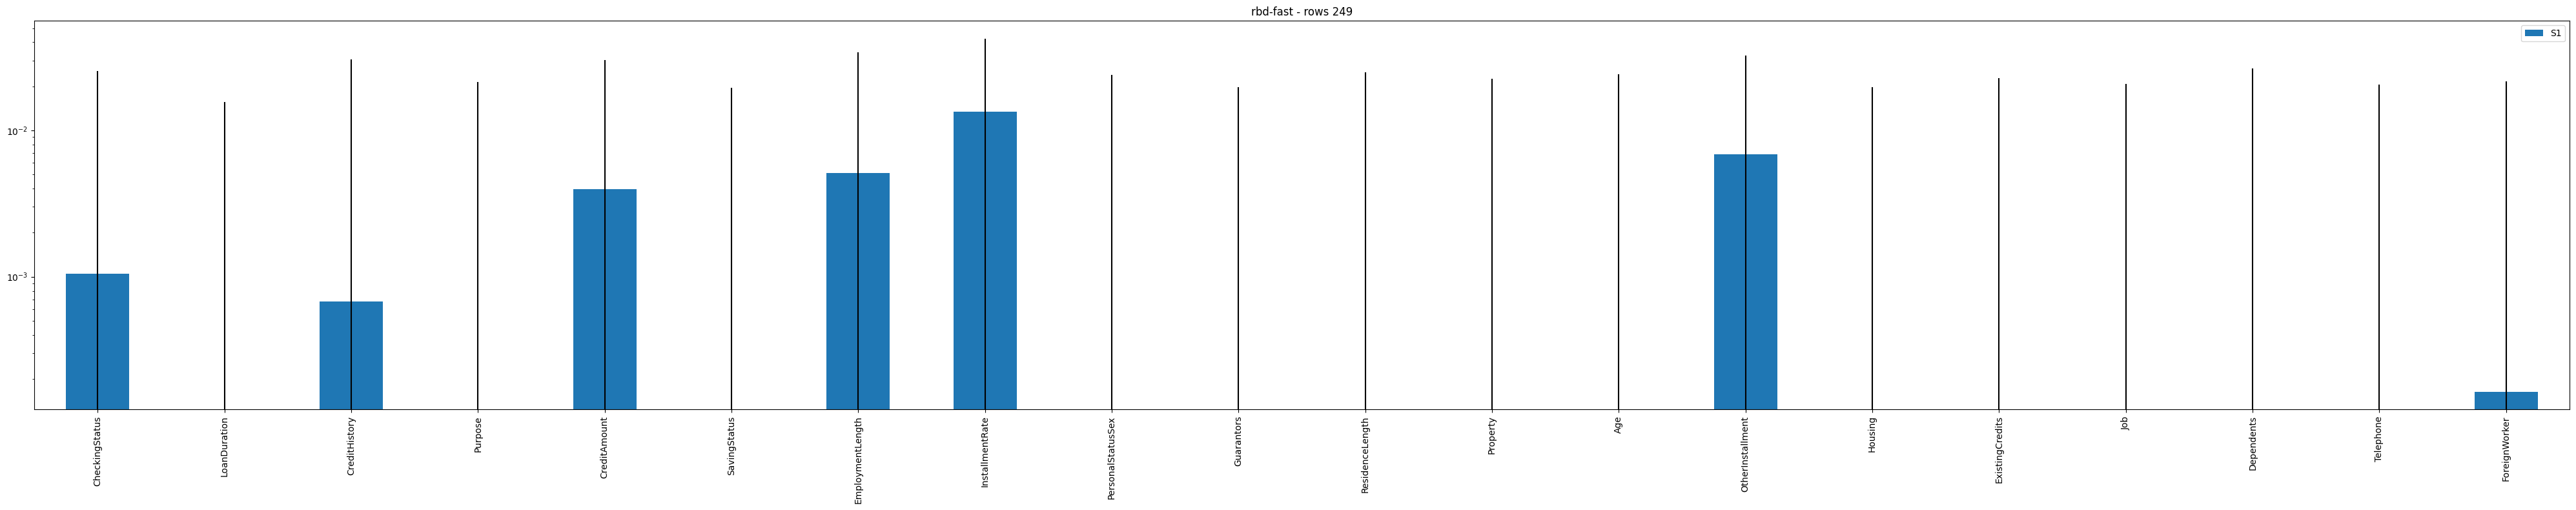

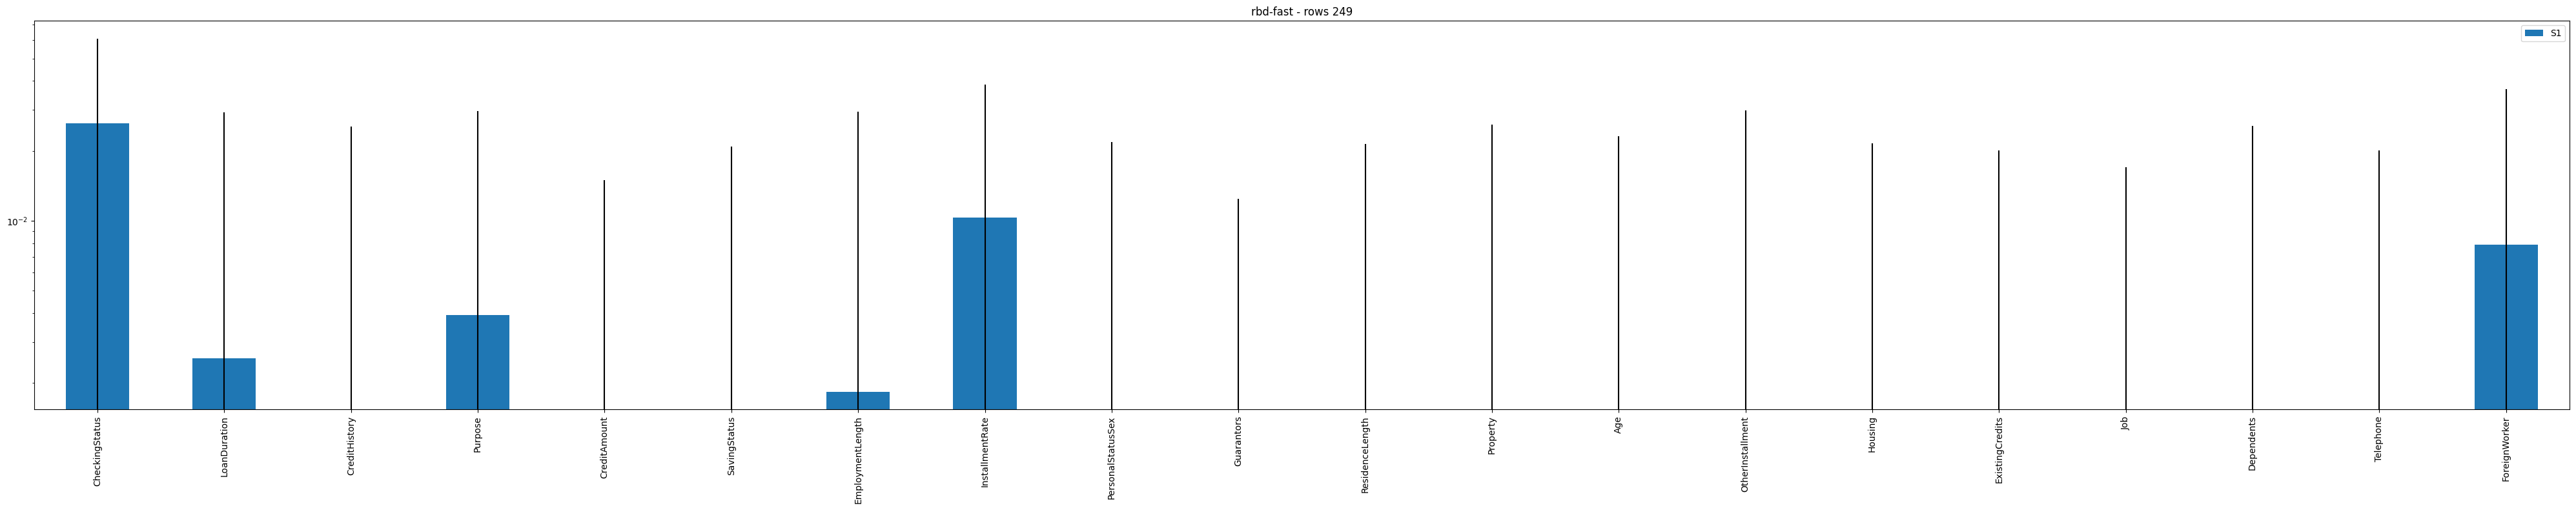

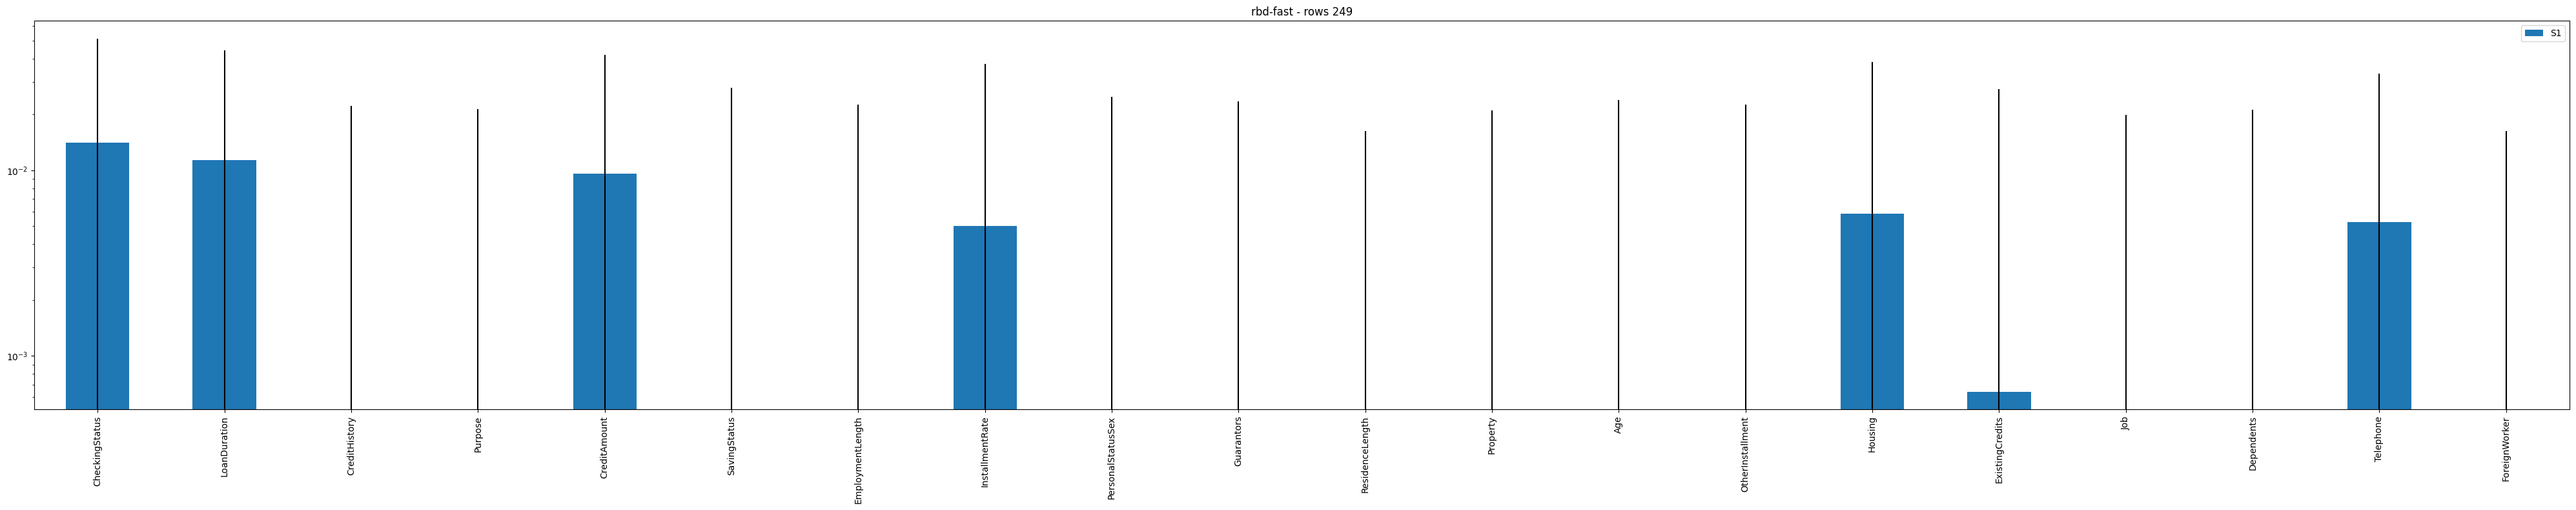

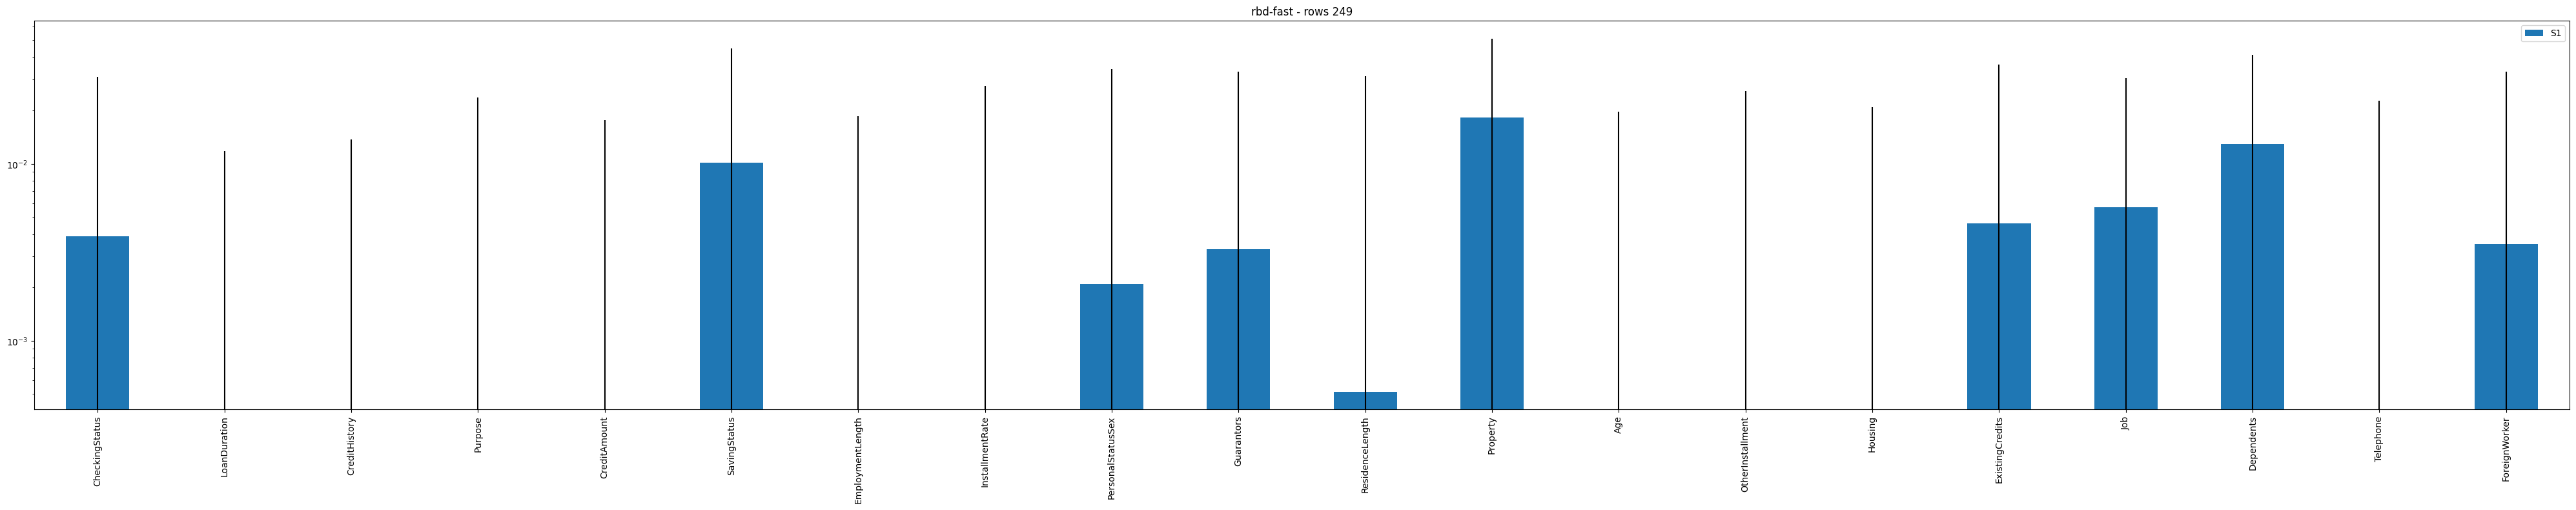

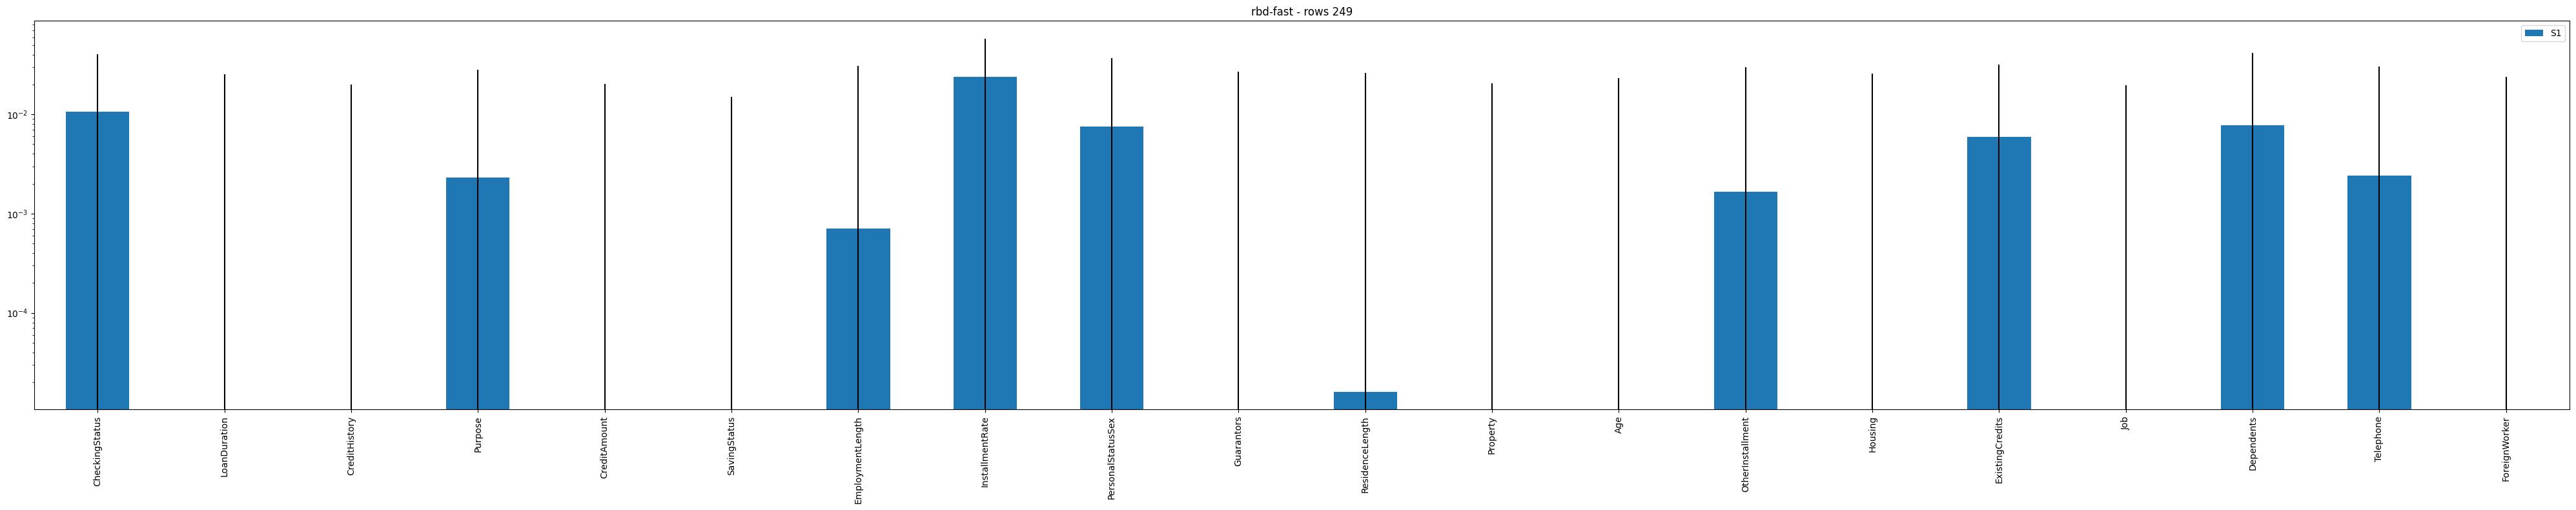

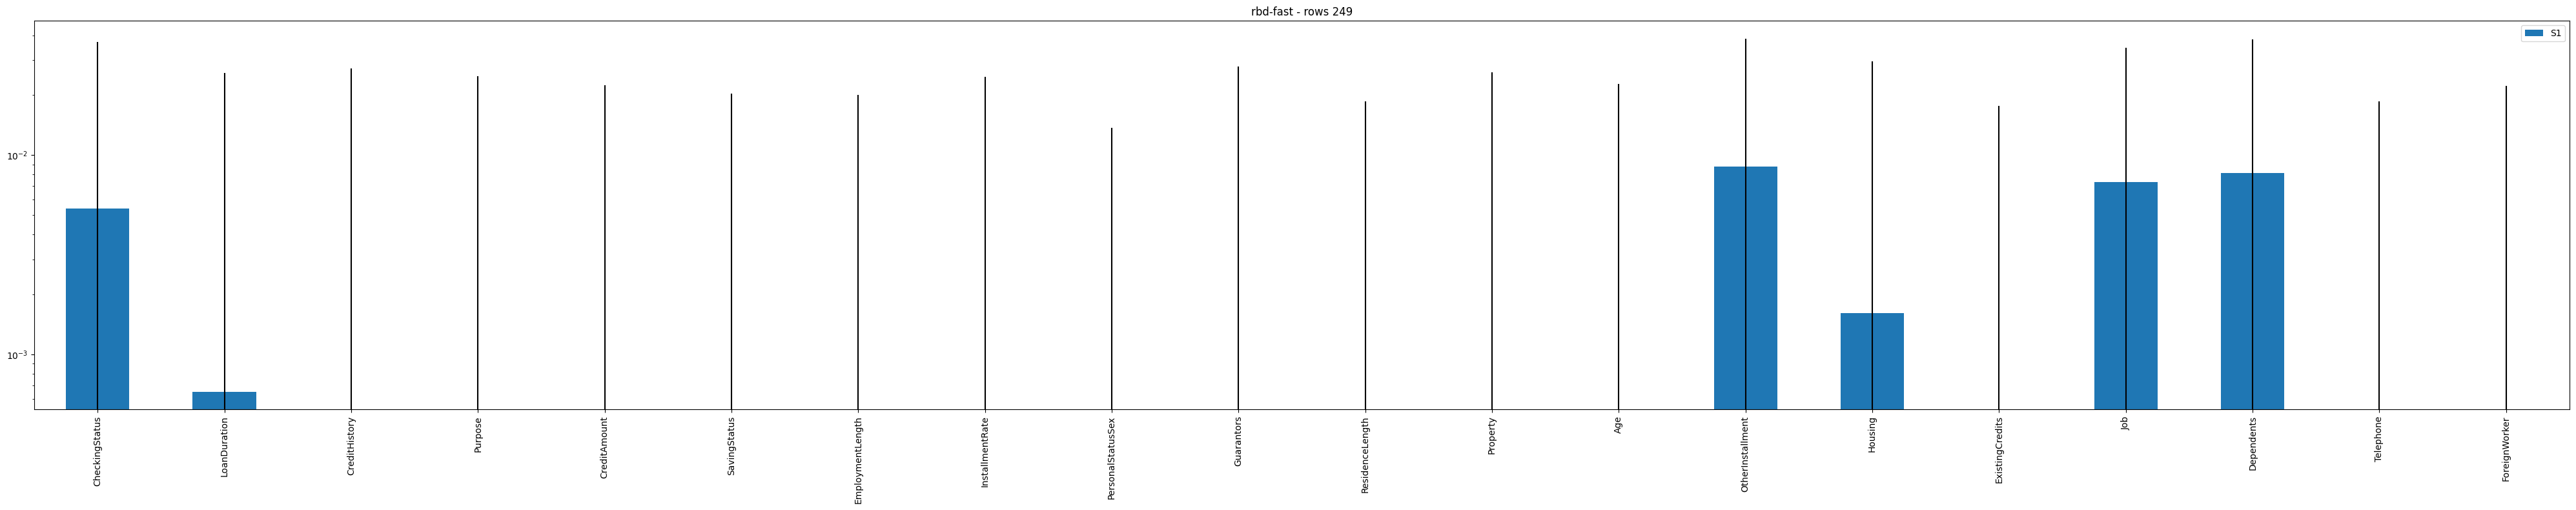

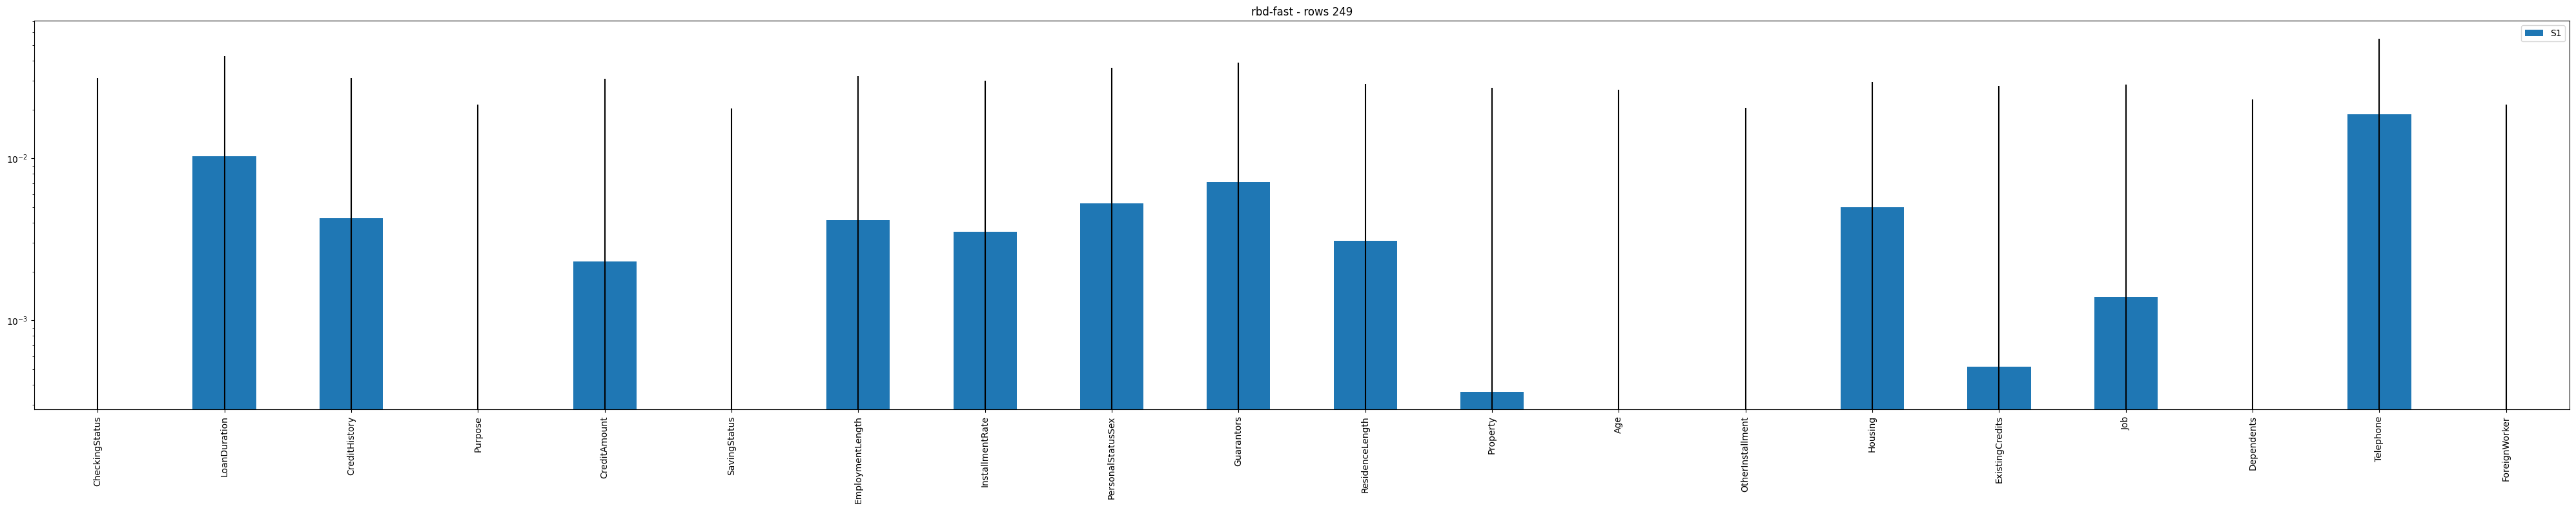

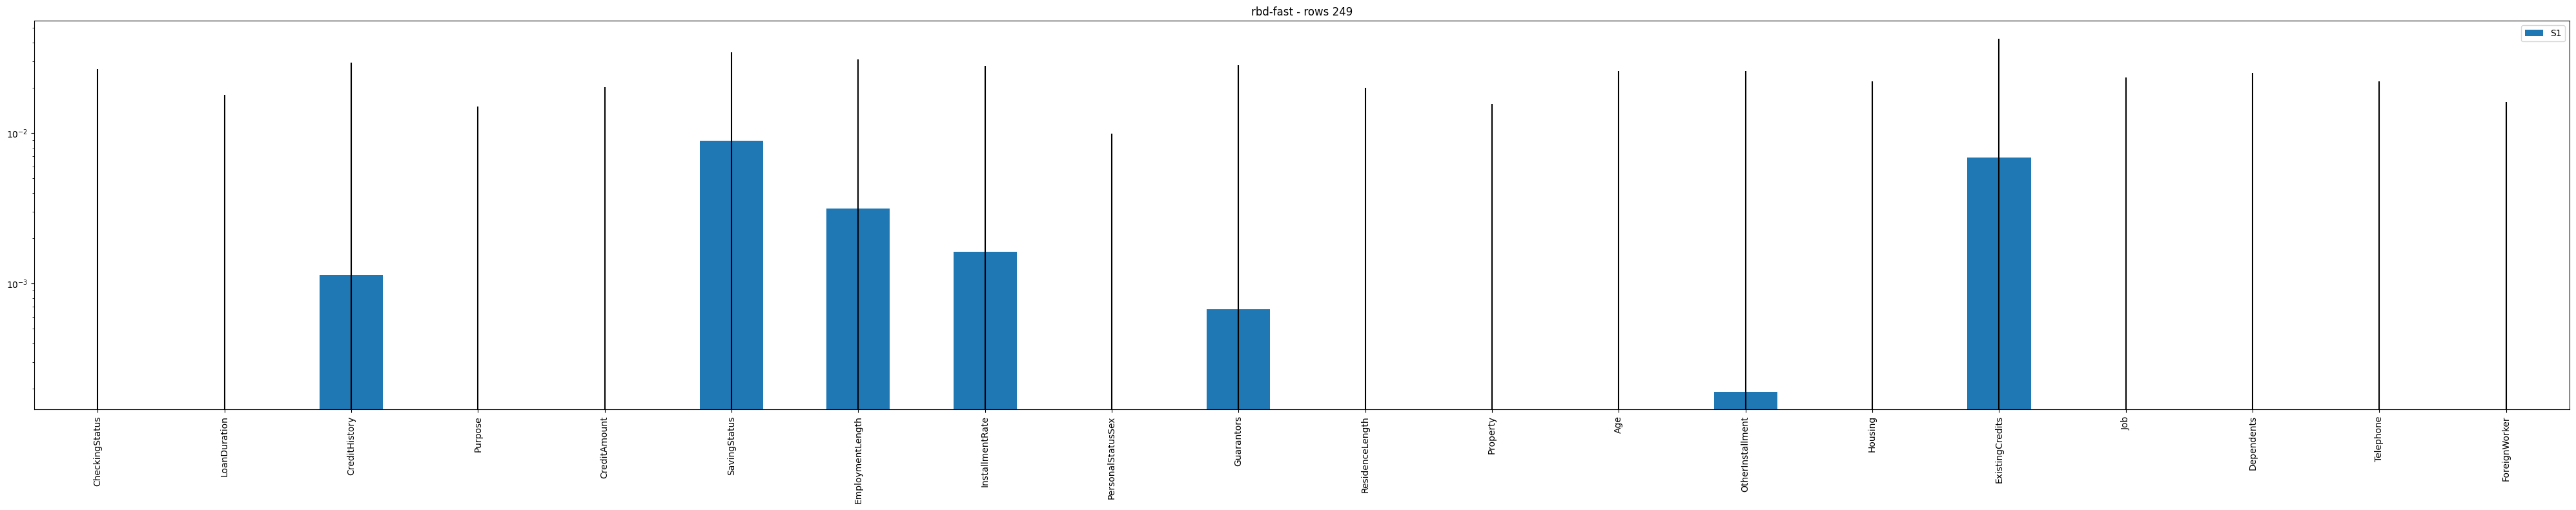

In [22]:
%%timeit 
loan_rbd_fast(x_test)


In [ ]:
%%time
loan_rbd_fast(credit_training_features)

(22528, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	22528 samples
Outputs:
	1 outputs: ['Y']
	22528 evaluations
Analysis:
                         ST   ST_conf
CheckingStatus     0.631483  0.073388
LoanDuration       0.149562  0.035697
CreditHistory      0.282506  0.052904
Purpose            0.119096  0.036756
CreditAmount       0.288045  0.056631
SavingStatus       0.202185  0.042616
EmploymentLength   0.171719  0.039283
InstallmentRate    0.221573  0.053542
PersonalStatusSex  0.116326  0.033621
Guarantors         0.052624  0.022379
ResidenceLength    0.013848  0.010931
Property           0.171719  0.042146
Age                0.083090  0.032461
OtherInstallment   0.102478  0.033745
Housing            0.10524

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'Sobol Indices'}>

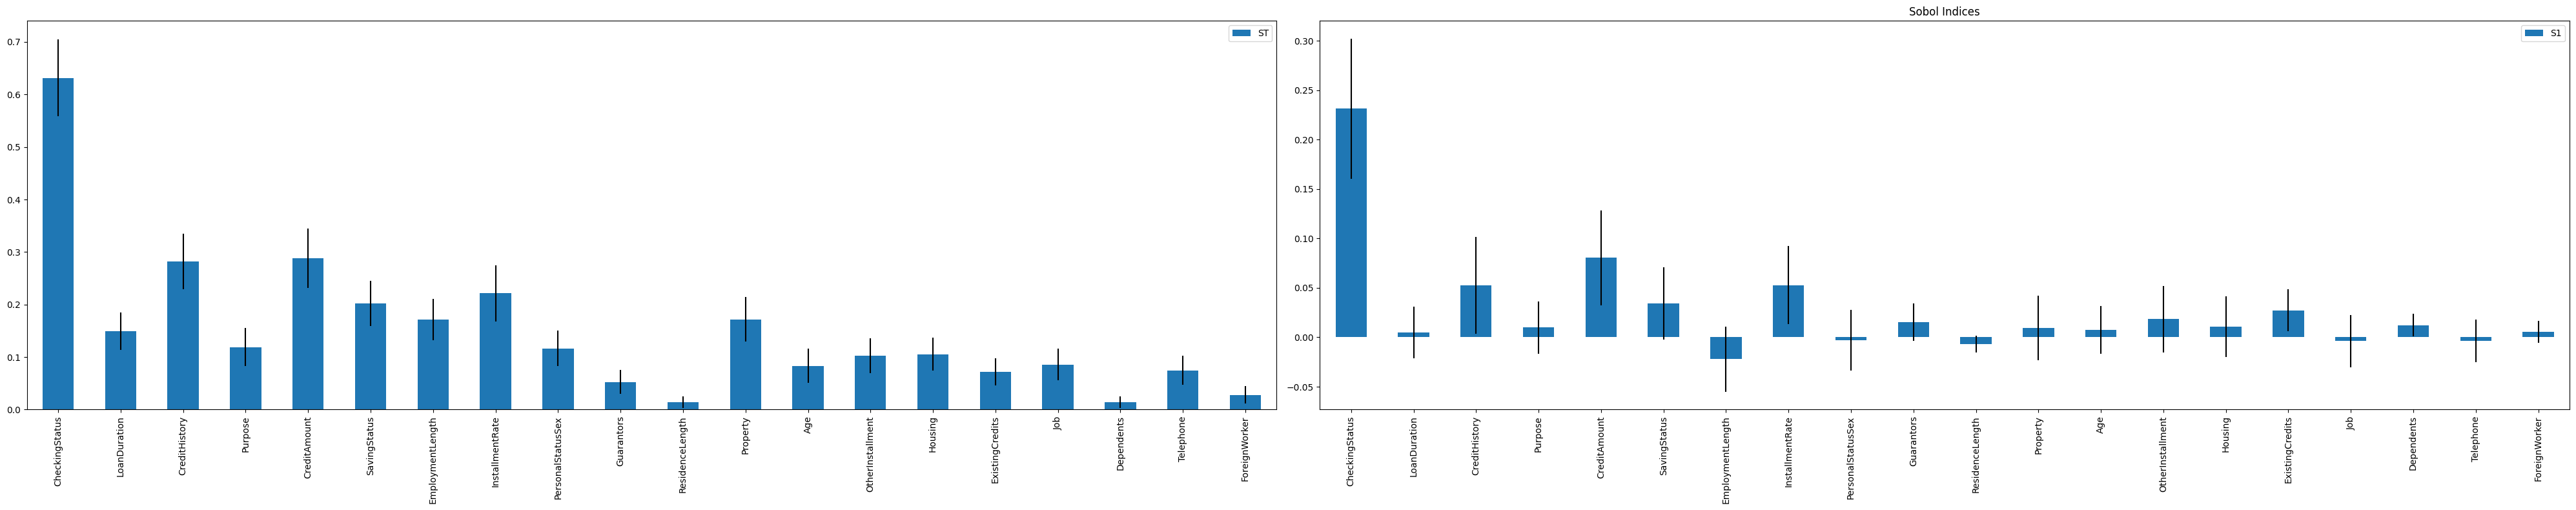

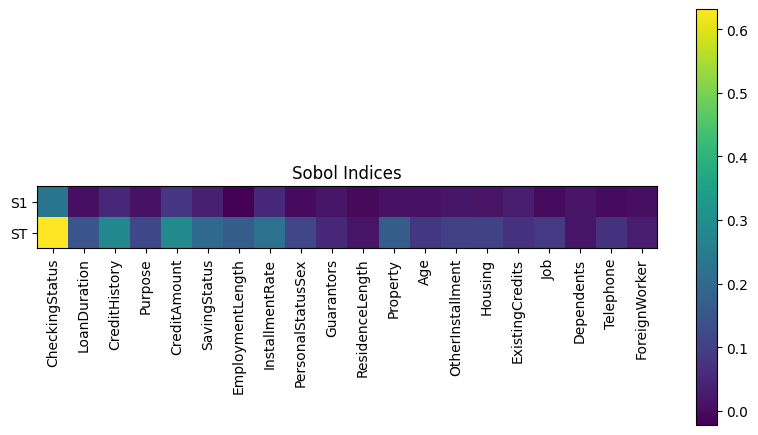

In [22]:
# === SALib functions? ===

def model_wrapper(X: np.ndarray, model=logistic_regression_model):
    # https://waterprogramming.wordpress.com/2014/02/11/extensions-of-salib-for-more-complex-sensitivity-analyses/
    # X: (rows, cols) each val is [0, size of x_test (250)] so each val represents row in x_test, col represents col in x_test
    # x_test: (rows, cols)
    print(X.shape)

    model_input = np.empty(shape=(X.shape[0], X.shape[1]))
    Y = np.ones(X.shape[0])
    
    # converting sample to south german credit values (x_test)
    for r_i in range(X.shape[0]):
        for c_i in range(X.shape[1]):
            new_row = math.floor(X[r_i][c_i])
            model_input[r_i][c_i] = int(x_test[new_row][c_i])

    # evaluate model
    # model = logistic_regression_model
    # y_a = model.predict(matrix_a)
    # input: 2D array - [[21 attributes], [21 attributes], ...]
    Y = model.predict(model_input)
    return Y

# === SALib Attempt ===
sp = ProblemSpec({
    'names': attributes[0:20],
    'bounds': [[0, 250]]*len(attributes[0:20]),
})

(sp.sample_sobol(1024, calc_second_order=False).evaluate(model_wrapper).analyze_sobol(calc_second_order=False))
print(sp)

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
fig = plt.gcf() # get current figure
fig.set_size_inches(40, 8)
plt.title(label="Sobol Indices")
plt.tight_layout() 

sp.heatmap(title="Sobol Indices")


(22528, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	22528 samples
Outputs:
	1 outputs: ['Y']
	22528 evaluations
Analysis:
                         ST   ST_conf
CheckingStatus     0.608518  0.075676
LoanDuration       0.169537  0.041609
CreditHistory      0.278526  0.053756
Purpose            0.142290  0.043544
CreditAmount       0.278526  0.051523
SavingStatus       0.196785  0.046483
EmploymentLength   0.196785  0.042144
InstallmentRate    0.251279  0.048485
PersonalStatusSex  0.112016  0.044444
Guarantors         0.048439  0.024402
ResidenceLength    0.003027  0.005427
Property           0.193757  0.045684
Age                0.084769  0.028291
OtherInstallment   0.105961  0.033334
Housing            0.09385

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'Sobol Indices'}>

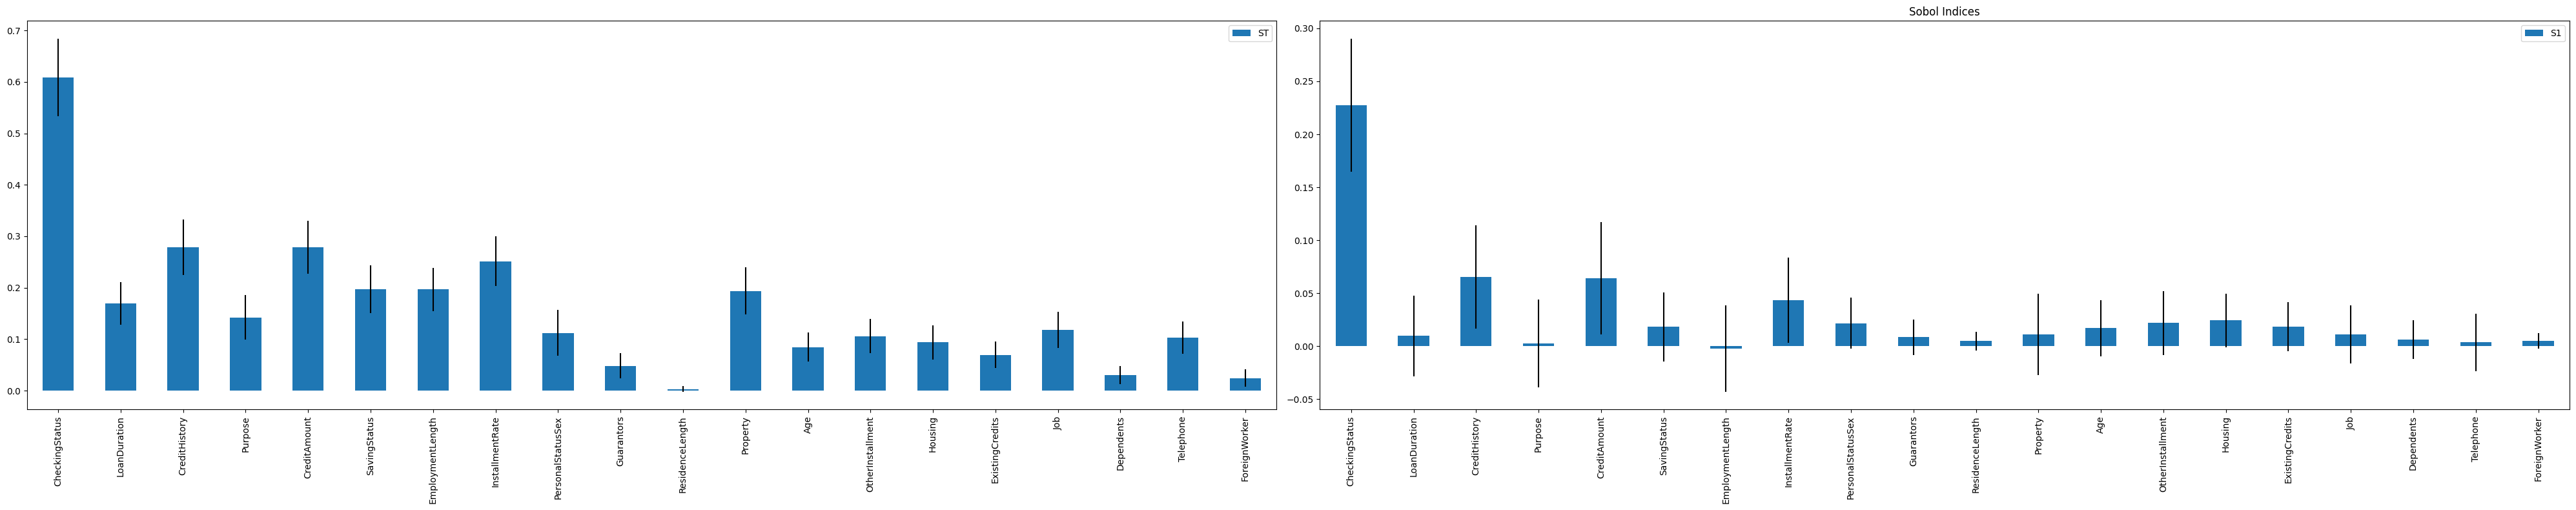

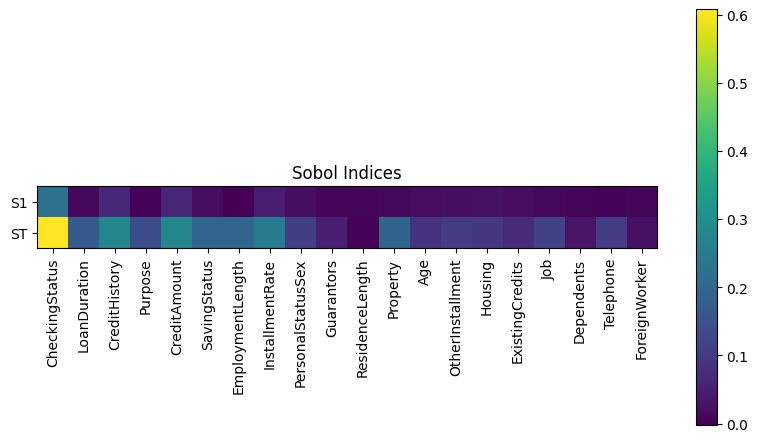

In [24]:
# === SALib functions? ===

def model_wrapper(X: np.ndarray, model=logistic_regression_model):
    # https://waterprogramming.wordpress.com/2014/02/11/extensions-of-salib-for-more-complex-sensitivity-analyses/
    # X: (rows, cols) each val is [0, size of x_test (250)] so each val represents row in x_test, col represents col in x_test
    # x_test: (rows, cols)
    print(X.shape)

    model_input = np.empty(shape=(X.shape[0], X.shape[1]))
    Y = np.ones(X.shape[0])
    
    # converting sample to south german credit values (x_test)
    for r_i in range(X.shape[0]):
        for c_i in range(X.shape[1]):
            new_row = math.floor(X[r_i][c_i])
            model_input[r_i][c_i] = int(credit_training_features[new_row][c_i])

    # evaluate model
    # model = logistic_regression_model
    # y_a = model.predict(matrix_a)
    # input: 2D array - [[21 attributes], [21 attributes], ...]
    Y = model.predict(model_input)
    return Y

# === SALib Attempt ===
sp = ProblemSpec({
    'names': attributes[0:20],
    'bounds': [[0, 1000]]*len(attributes[0:20]),
})

(sp.sample_sobol(1024, calc_second_order=False).evaluate(model_wrapper).analyze_sobol(calc_second_order=False))
print(sp)

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
fig = plt.gcf() # get current figure
fig.set_size_inches(40, 8)
plt.title(label="Sobol Indices")
plt.tight_layout() 

sp.heatmap(title="Sobol Indices")
